In [6]:
%matplotlib notebook

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import json
import pandas as pd
import numpy as np


from scipy.stats import linregress

In [2]:
df = pd.read_csv('Lipid_fatty_acids_geno_chr4_9_PS.csv')

In [3]:
df.keys()

Index(['Genotype', 'chr4', 'chr9', 'MGDG', 'DGDG', 'SQDG', 'PG', 'PIPE', 'PC',
       'PG_16_0', 'PG_16_1', 'PG_18_0', 'PG_18_2', 'PG_18_3', 'MGDG_16_0',
       'MGDG_18_2', 'MGDG_18_3', 'DGDG_16_0', 'DGDG_18_2', 'DGDG_18_3',
       'PC_16_0', 'PC_18_1', 'PC_18_2', 'PC_18_3', 'SQDG_16_0', 'SQDG_18_0',
       'SQDG_18_1', 'SQDG_18_2', 'SQDG_18_3', 'PEPI_16_0', 'PEPI_18_1',
       'PEPI_18_2', 'PEPI_18_3', 'DGDG/MGDG', 'LT_DEPI_phi2_81',
       'LT_DEPI_qIt_81', 'LT_DEPI_qL_81'],
      dtype='object')

In [4]:
df

Genotype chr4 chr9       MGDG       DGDG      SQDG         PG       PIPE  \
0           1   AA   AA  32.674800  21.107872  4.714892  12.785509   8.947110   
1           2   AA   AA  33.658687  22.162136  4.578617  11.908270   8.697145   
2           4   AA   BB  31.357040  22.035483  5.607614  10.991483   9.907516   
3           5   AA   BB  34.717512  25.202439  4.747148  11.406167  10.280807   
4           6   AA   BB  31.949453  21.379684  4.728548  12.402947  10.507827   
..        ...  ...  ...        ...        ...       ...        ...        ...   
75        109   BB   AA  31.066302  24.843160  4.978756   9.811169  11.650300   
76        111   BB   AA  33.564941  23.049252  4.879458  11.889841   9.908019   
77        112   BB   BB  32.699753  21.555775  5.421652   9.279643  11.001769   
78  24-125B-1   BB   BB  31.081661  22.675466  5.776590  11.907155  10.389606   
79       CB27   AA   AA  34.386661  24.667347  4.845132  10.579359  10.629228   

           PC    PG_16_0  ...  SQDG_18_2  SQDG_18_3  PEPI_16_0  PEPI_18_1  \
0   14.533786  29.858138  ...   7.952133  52.136641  31.516215   2.727575   
1   15.137336  27.720849  ...   6.410688  51.957244  32.126814   2.264457   
2   15.306449  26.072732  ...   8.465794  55.675683  32.368757   1.935332   
3   15.803077  29.495141  ...   5.725940  53.370966  32.941406   1.420544   
4   16.634852  29.933771  ...   5.678220  55.615488  32.622747   2.171528   
..        ...        ...  ...        ...        ...        ...        ...   
75  18.347995  35.738846  ...   7.350517  46.984041  32.368069   2.101505   
76  16.694808  29.918113  ...   8.158256        NaN  29.457111   2.559436   
77  16.723174  29.762713  ...   6.132886  49.590586  30.115070   2.205466   
78  17.122344  32.050000  ...   7.430000  50.410000  35.700000   2.130000   
79  16.663811  30.700000  ...   8.520000  52.650000  32.860000   2.800000   

    PEPI_18_2  PEPI_18_3  DGDG/MGDG  LT_DEPI_phi2_81  LT_DEPI_qIt_81  \
0   34.216777  30.203453   0.645999         0.518811        1.539135   
1   30.928389  32.413643   0.658437         0.375548        1.941258   
2   33.683595  31.339341   0.702728         0.132851        4.595215   
3   32.543936  32.785023   0.725929         0.264331        2.600429   
4   32.588809  31.390688   0.669172         0.323928        1.998067   
..        ...        ...        ...              ...             ...   
75  30.575840  32.604981   0.799682         0.566808        1.574514   
76  34.671586  30.455896   0.686706         0.572712        1.263461   
77  34.213824  30.019706   0.659203         0.472187        1.323545   
78  30.550000  29.590000   0.729545         0.346075        1.937947   
79  33.370000  29.120000   0.717352         0.550354        1.443589   

    LT_DEPI_qL_81  
0        0.521250  
1        0.364375  
2        0.198375  
3        0.264400  
4        0.316020  
..            ...  
75       0.615050  
76       0.594675  
77       0.433175  
78       0.353109  
79       0.560014  

[80 rows x 37 columns]

<IPython.core.display.Javascript object>


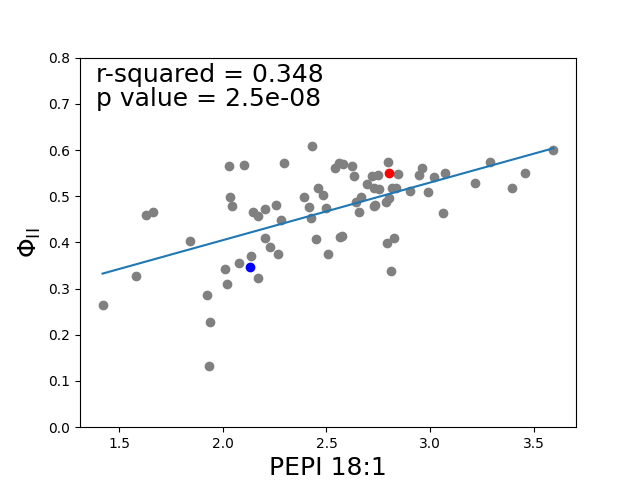

In [7]:
x_column = 'PEPI_18_1'
y_column = 'LT_DEPI_phi2_81'



genotype_colors = {
    "CB27": "red",
    "24-125B-1": "blue"
}

default_color = "grey"

# find which points have data
good_points = np.isfinite(df[x_column]) & np.isfinite(df[y_column])
x = df.loc[good_points,x_column]
y = df.loc[good_points,y_column]

# fit those points
slope, intercept, r_value, p_value, _ = linregress(x,y)



# show the plot
fig = plt.figure()

for row in df.index:
    geno,x,y = df.loc[row,["Genotype",x_column,y_column]]
    
    if geno in genotype_colors.keys():
        color = genotype_colors[geno]
    else:
        color = default_color
        
    plt.scatter( x, y, c=color )

line_x = np.array([df[x_column].min(), df[x_column].max()])
plt.plot( line_x, slope * line_x + intercept )
plt.xlabel("PEPI 18:1",size=18)
plt.ylabel("$\mathregular{Φ_{II}}$",size=18)
plt.text( .15,.83,"r-squared = {0:.3f}".format( r_value ** 2 ), transform=fig.transFigure, size=18 )
plt.text( .15,.78, "p value = {0:.1e}".format( p_value ), transform=fig.transFigure, size=18 )
plt.ylim(0,0.8)

#plt.savefig('phi2_81_PEPI_18_1',dpi =600)
plt.show()

<IPython.core.display.Javascript object>


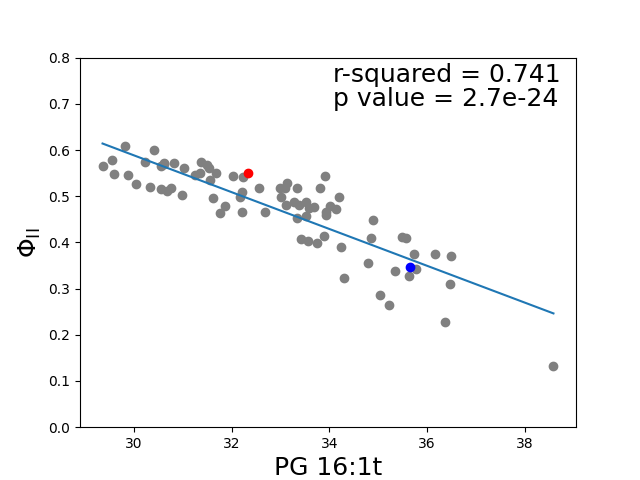

In [14]:
x_column = 'PG_16_1'
y_column = 'LT_DEPI_phi2_81'



genotype_colors = {
    "CB27": "red",
    "24-125B-1": "blue"
}

default_color = "grey"

# find which points have data
good_points = np.isfinite(df[x_column]) & np.isfinite(df[y_column])
x = df.loc[good_points,x_column]
y = df.loc[good_points,y_column]

# fit those points
slope, intercept, r_value, p_value, _ = linregress(x,y)



# show the plot
fig = plt.figure()

for row in df.index:
    geno,x,y = df.loc[row,["Genotype",x_column,y_column]]
    
    if geno in genotype_colors.keys():
        color = genotype_colors[geno]
    else:
        color = default_color
        
    plt.scatter( x, y, c=color )

line_x = np.array([df[x_column].min(), df[x_column].max()])
plt.plot( line_x, slope * line_x + intercept )
plt.xlabel("PG 16:1t",size=18)
plt.ylabel("$\mathregular{Φ_{II}}$",size=18)
plt.text( .52,.83,"r-squared = {0:.3f}".format( r_value ** 2 ), transform=fig.transFigure,size=18 )
plt.text( .52,.78, "p value = {0:.1e}".format( p_value ), transform=fig.transFigure,size=18 )
plt.ylim(0,0.8)

plt.savefig('phi2_81_PG16_1t',dpi =600)
plt.show()

<IPython.core.display.Javascript object>


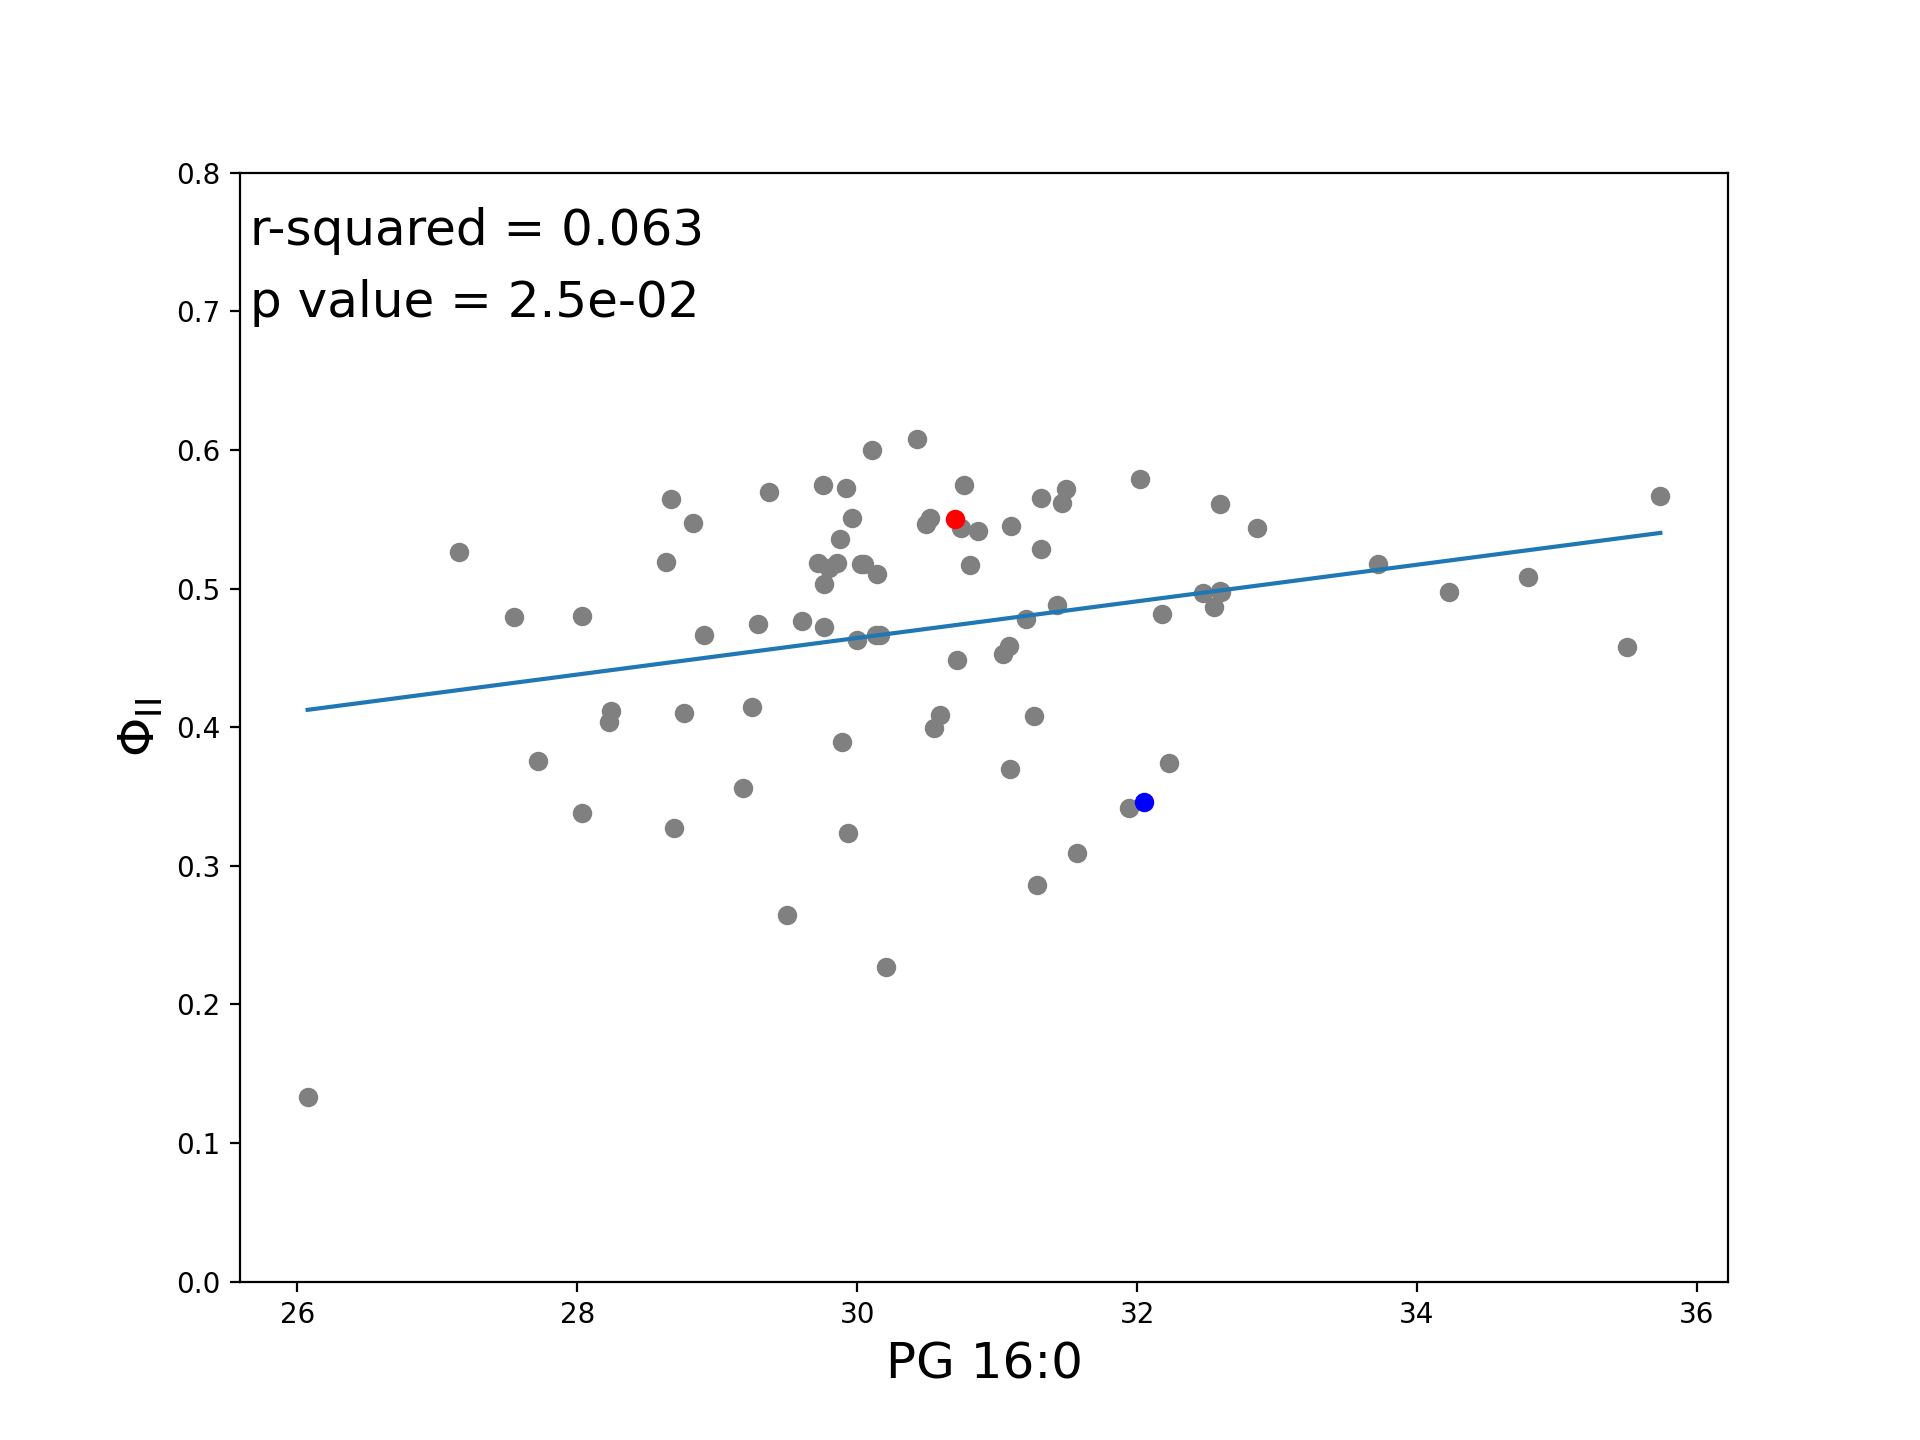

In [17]:
x_column = 'PG_16_0'
y_column = 'LT_DEPI_phi2_81'



genotype_colors = {
    "CB27": "red",
    "24-125B-1": "blue"
}

default_color = "grey"

# find which points have data
good_points = np.isfinite(df[x_column]) & np.isfinite(df[y_column])
x = df.loc[good_points,x_column]
y = df.loc[good_points,y_column]

# fit those points
slope, intercept, r_value, p_value, _ = linregress(x,y)



# show the plot
fig = plt.figure()

for row in df.index:
    geno,x,y = df.loc[row,["Genotype",x_column,y_column]]
    
    if geno in genotype_colors.keys():
        color = genotype_colors[geno]
    else:
        color = default_color
        
    plt.scatter( x, y, c=color )

line_x = np.array([df[x_column].min(), df[x_column].max()])
plt.plot( line_x, slope * line_x + intercept )
plt.xlabel("PG 16:0",size=18)
plt.ylabel("$\mathregular{Φ_{II}}$",size=18)
plt.text( .13,.83,"r-squared = {0:.3f}".format( r_value ** 2 ), transform=fig.transFigure,size=18 )
plt.text( .13,.78, "p value = {0:.1e}".format( p_value ), transform=fig.transFigure,size=18 )
plt.ylim(0,0.8)
#.13,.83
#.13,.78
plt.savefig('phi2_81_PG16_0',dpi =600)
plt.show()

<IPython.core.display.Javascript object>


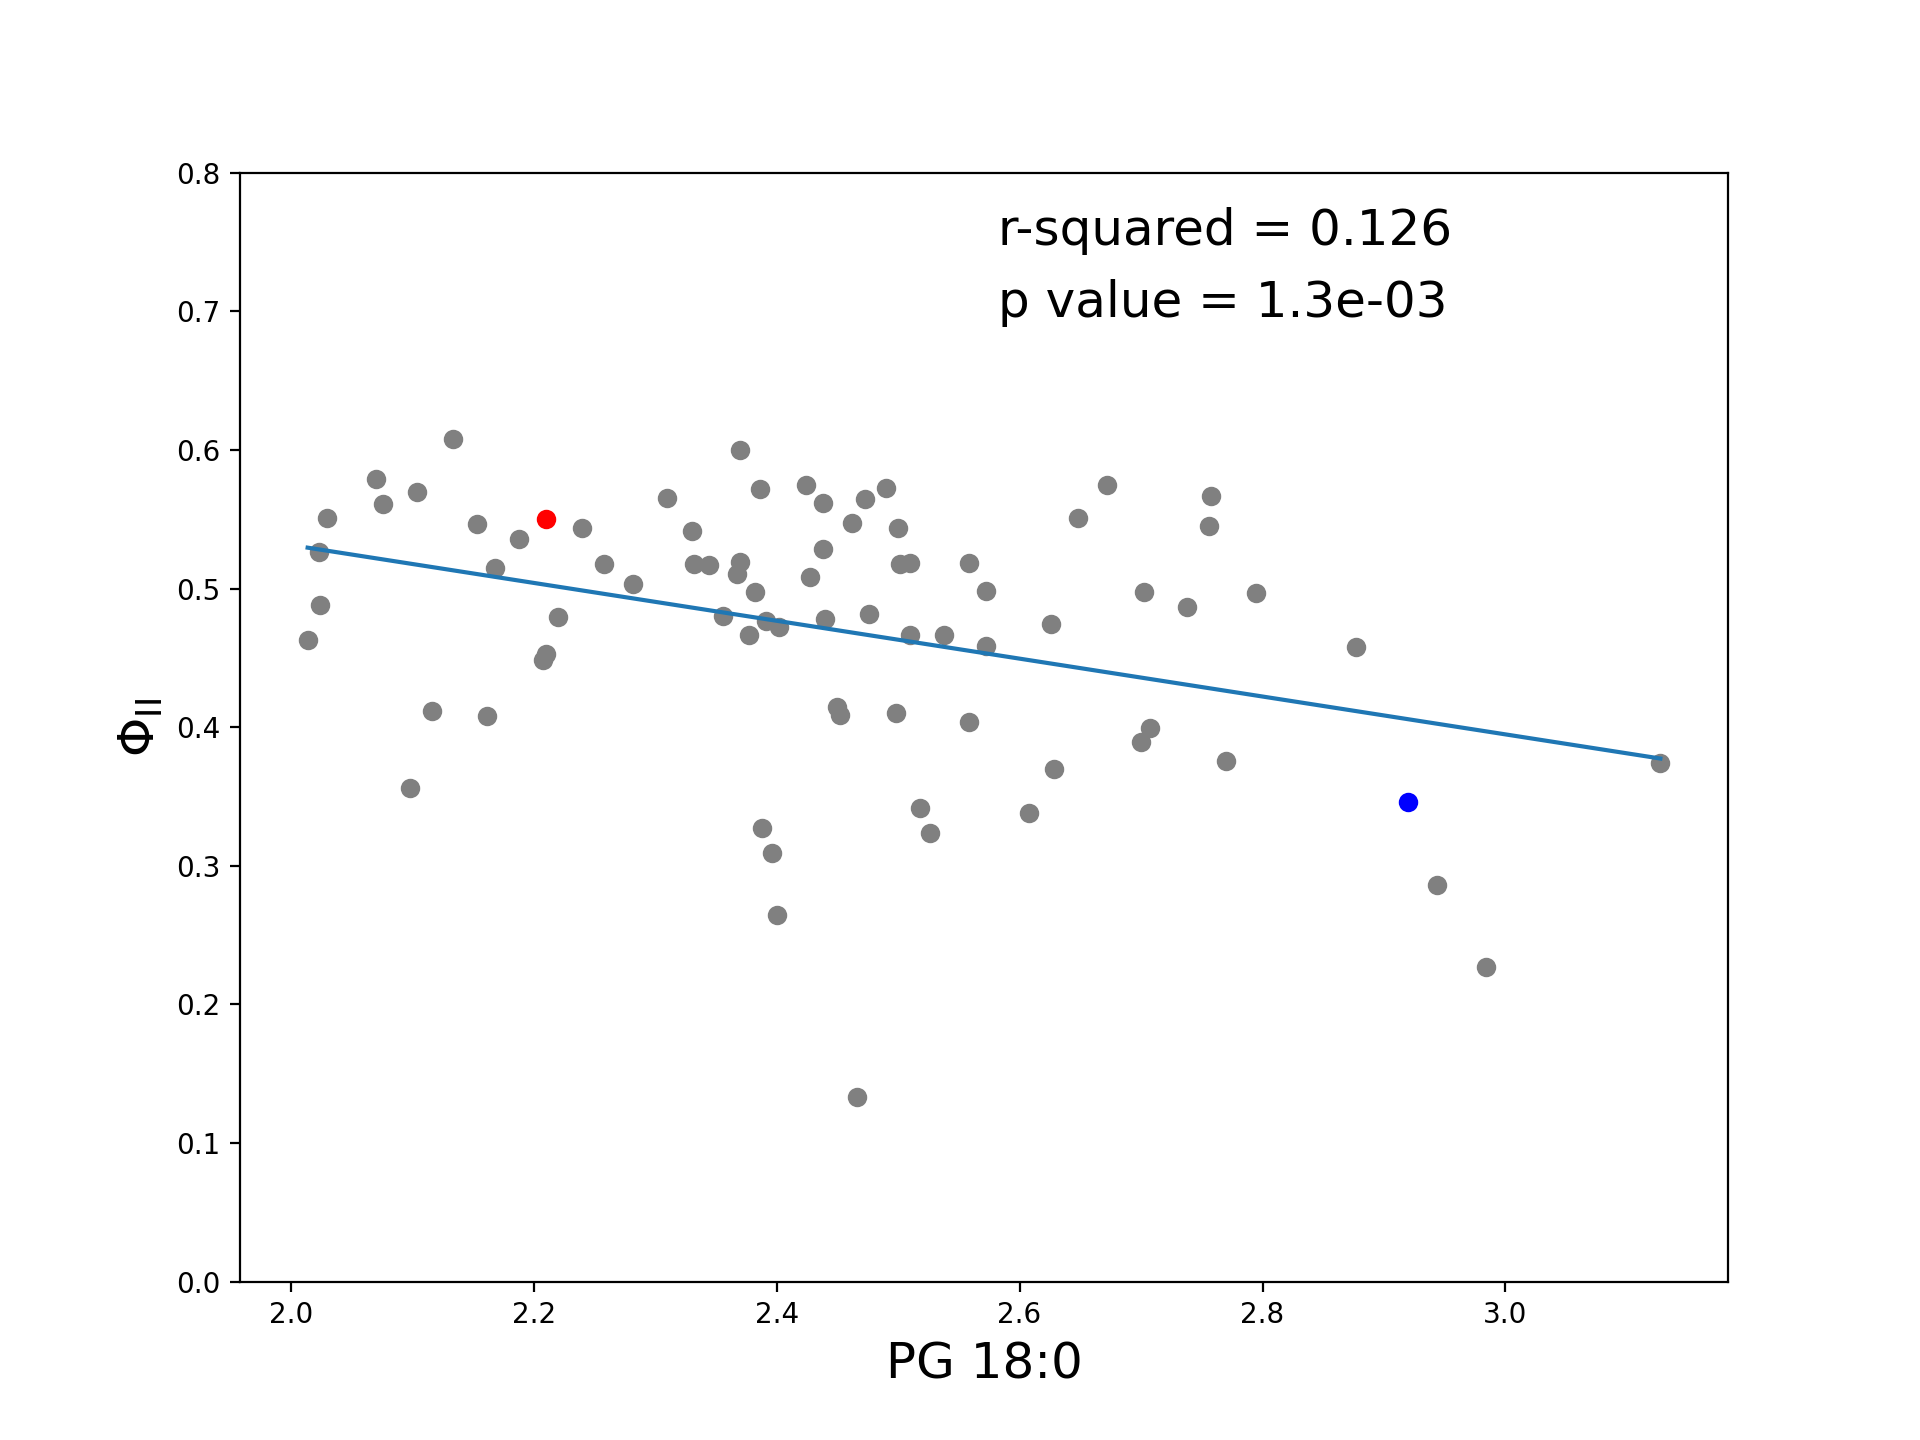

In [16]:
x_column = 'PG_18_0'
y_column = 'LT_DEPI_phi2_81'



genotype_colors = {
    "CB27": "red",
    "24-125B-1": "blue"
}

default_color = "grey"

# find which points have data
good_points = np.isfinite(df[x_column]) & np.isfinite(df[y_column])
x = df.loc[good_points,x_column]
y = df.loc[good_points,y_column]

# fit those points
slope, intercept, r_value, p_value, _ = linregress(x,y)



# show the plot
fig = plt.figure()

for row in df.index:
    geno,x,y = df.loc[row,["Genotype",x_column,y_column]]
    
    if geno in genotype_colors.keys():
        color = genotype_colors[geno]
    else:
        color = default_color
        
    plt.scatter( x, y, c=color )

line_x = np.array([df[x_column].min(), df[x_column].max()])
plt.plot( line_x, slope * line_x + intercept )
plt.xlabel("PG 18:0",size=18)
plt.ylabel("$\mathregular{Φ_{II}}$",size=18)
plt.text( .52,.83,"r-squared = {0:.3f}".format( r_value ** 2 ), transform=fig.transFigure,size=18 )
plt.text( .52,.78, "p value = {0:.1e}".format( p_value ), transform=fig.transFigure,size=18 )
plt.ylim(0,0.8)
#.13,.83
#.13,.78
plt.savefig('phi2_81_PG18_0',dpi =600)
plt.show()

<IPython.core.display.Javascript object>


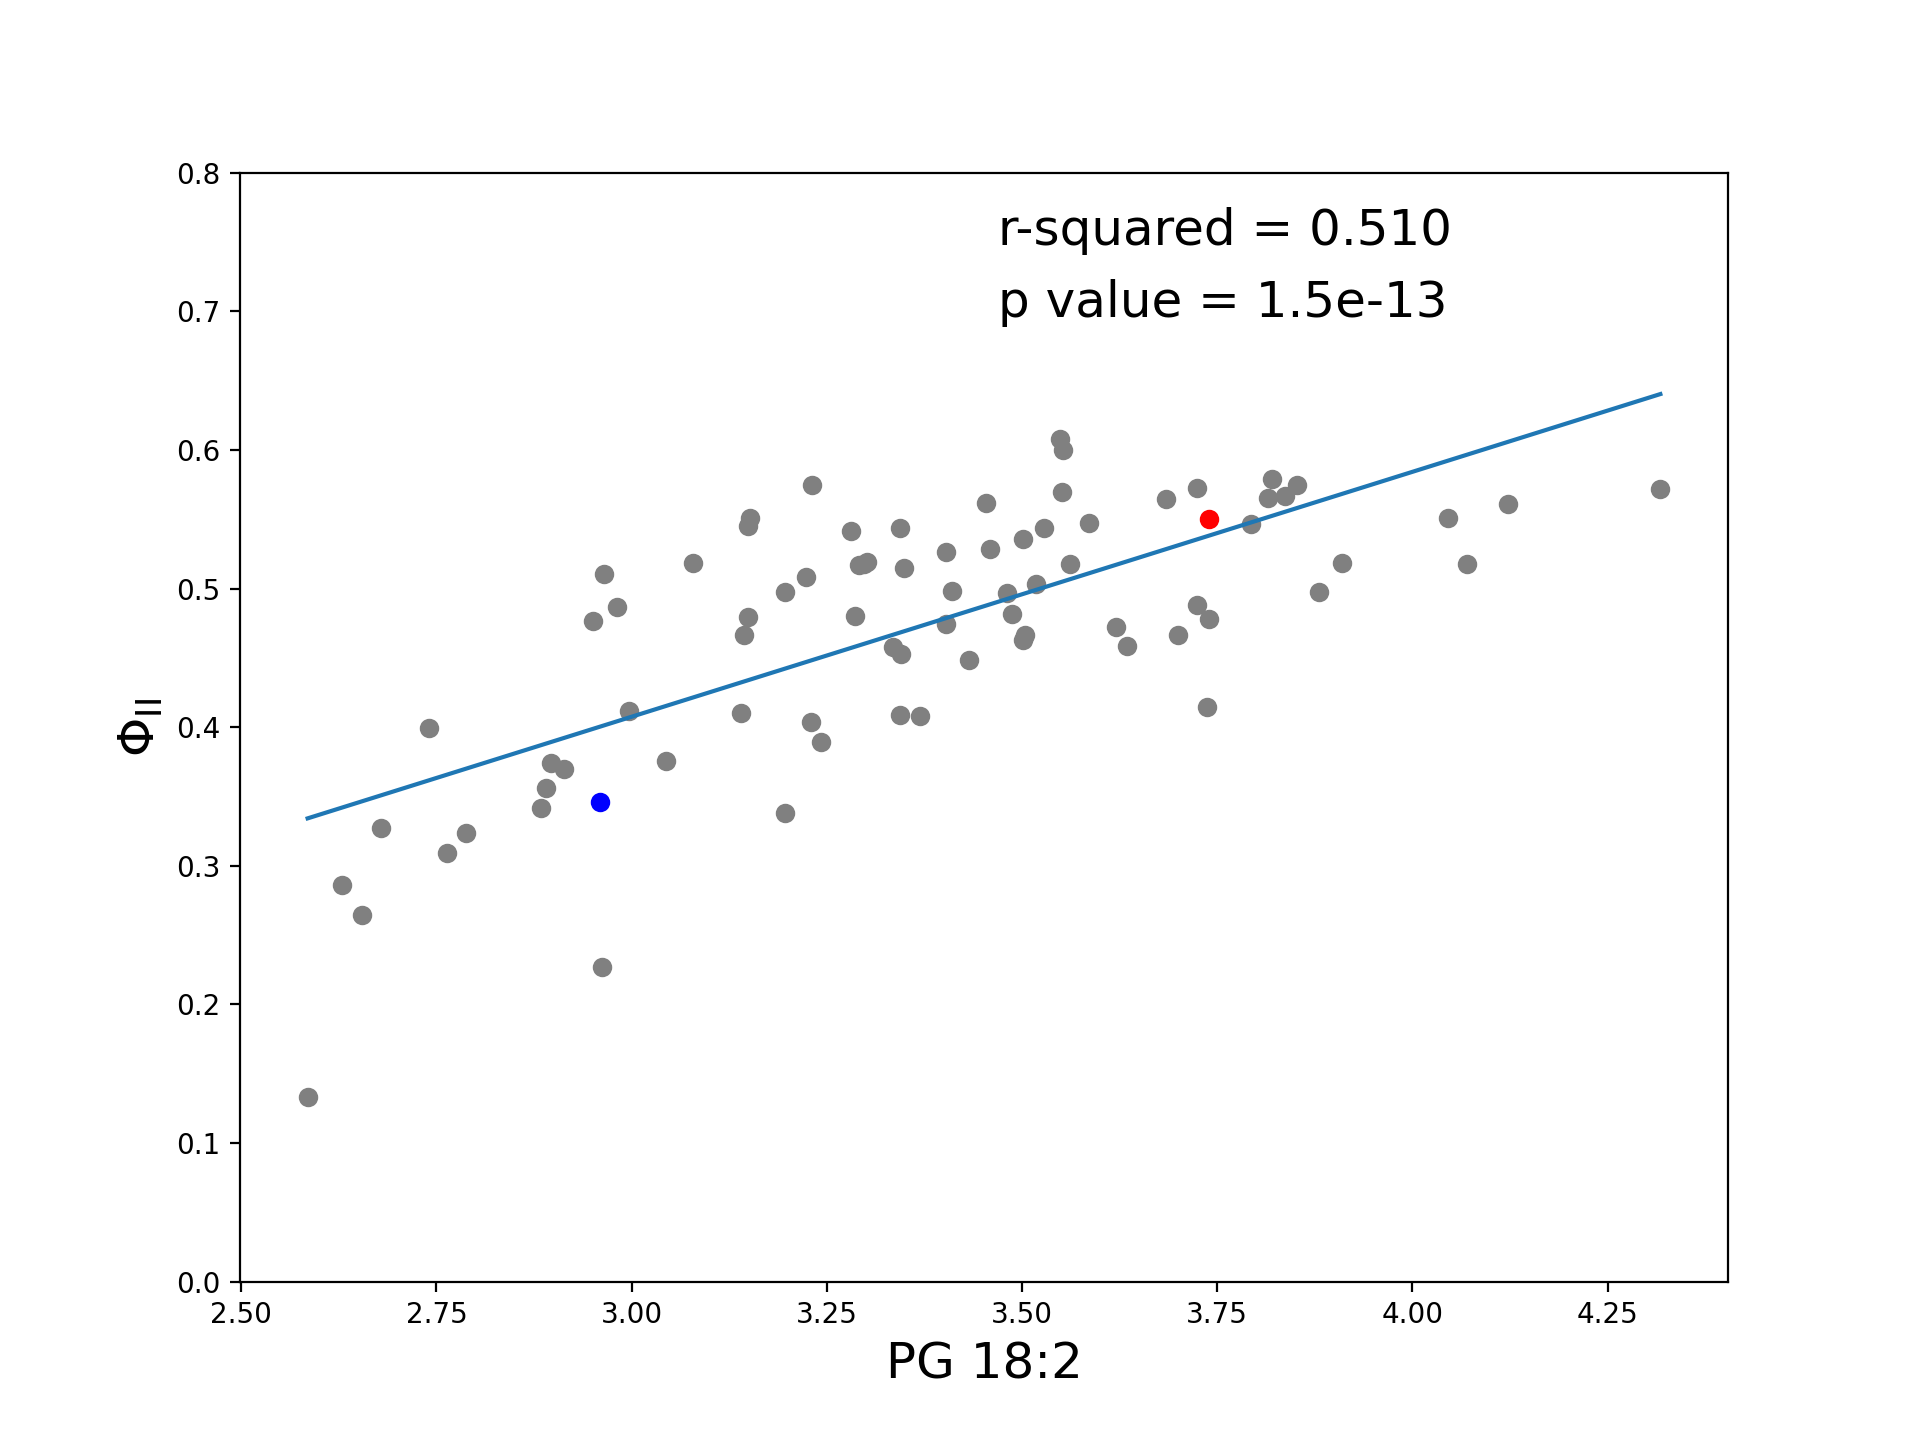

In [9]:
x_column = 'PG_18_2'
y_column = 'LT_DEPI_phi2_81'



genotype_colors = {
    "CB27": "red",
    "24-125B-1": "blue"
}

default_color = "grey"

# find which points have data
good_points = np.isfinite(df[x_column]) & np.isfinite(df[y_column])
x = df.loc[good_points,x_column]
y = df.loc[good_points,y_column]

# fit those points
slope, intercept, r_value, p_value, _ = linregress(x,y)



# show the plot
fig = plt.figure()

for row in df.index:
    geno,x,y = df.loc[row,["Genotype",x_column,y_column]]
    
    if geno in genotype_colors.keys():
        color = genotype_colors[geno]
    else:
        color = default_color
        
    plt.scatter( x, y, c=color )

line_x = np.array([df[x_column].min(), df[x_column].max()])
plt.plot( line_x, slope * line_x + intercept )
plt.xlabel("PG 18:2",size=18)
plt.ylabel("$\mathregular{Φ_{II}}$",size=18)
plt.text( .52,.83,"r-squared = {0:.3f}".format( r_value ** 2 ), transform=fig.transFigure,size=18 )
plt.text( .52,.78, "p value = {0:.1e}".format( p_value ), transform=fig.transFigure,size=18 )
plt.ylim(0,0.8)
#.13,.83
#.13,.78
plt.savefig('phi2_81_PG18_2',dpi =600)
plt.show()

<IPython.core.display.Javascript object>


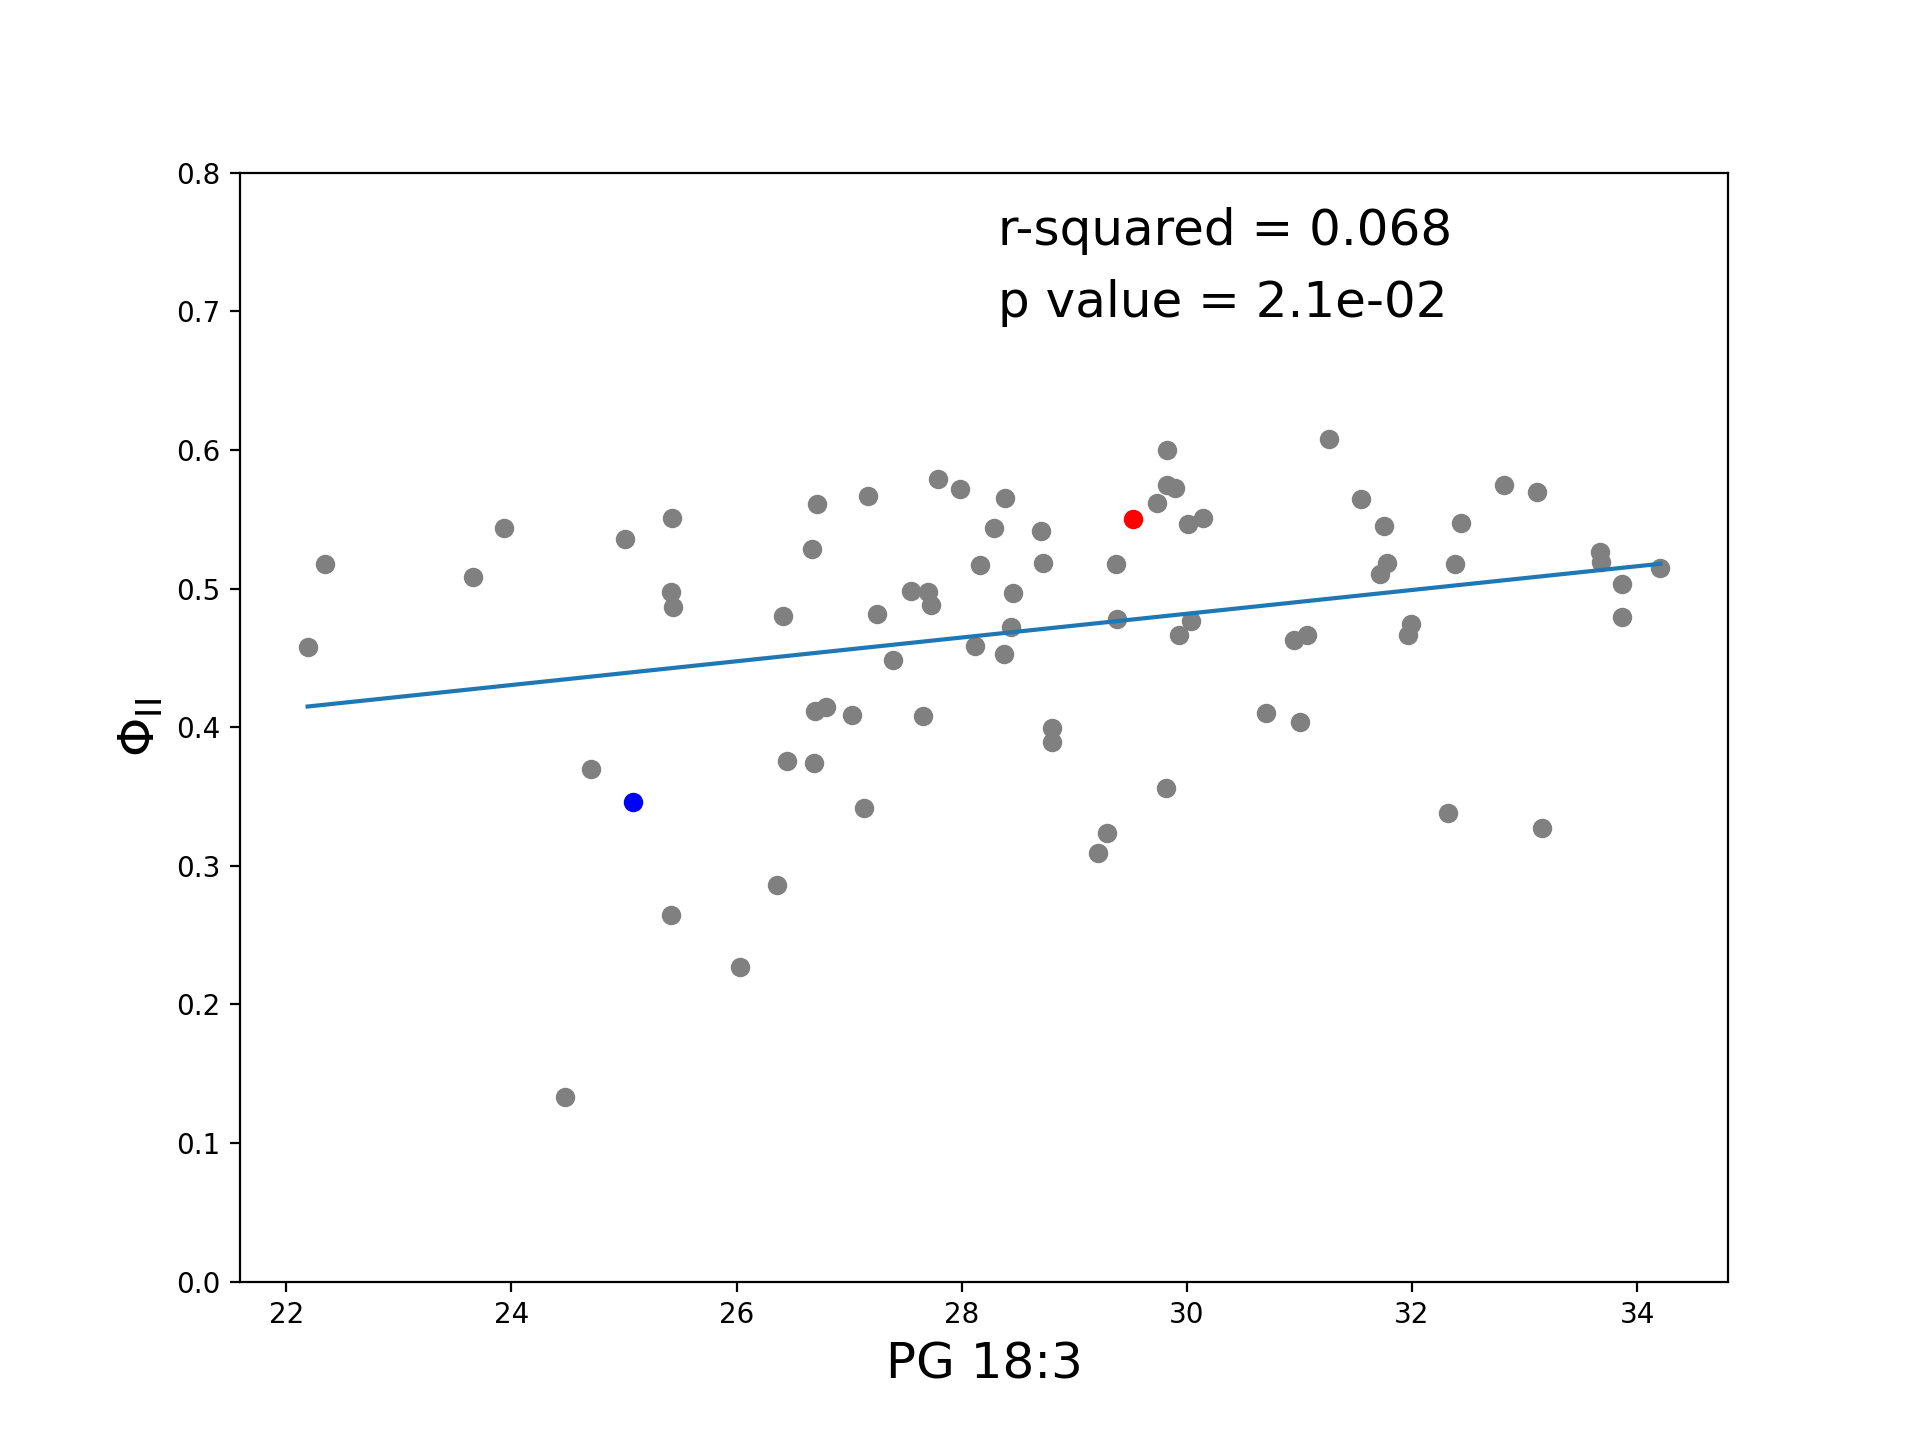

In [11]:
x_column = 'PG_18_3'
y_column = 'LT_DEPI_phi2_81'



genotype_colors = {
    "CB27": "red",
    "24-125B-1": "blue"
}

default_color = "grey"

# find which points have data
good_points = np.isfinite(df[x_column]) & np.isfinite(df[y_column])
x = df.loc[good_points,x_column]
y = df.loc[good_points,y_column]

# fit those points
slope, intercept, r_value, p_value, _ = linregress(x,y)



# show the plot
fig = plt.figure()

for row in df.index:
    geno,x,y = df.loc[row,["Genotype",x_column,y_column]]
    
    if geno in genotype_colors.keys():
        color = genotype_colors[geno]
    else:
        color = default_color
        
    plt.scatter( x, y, c=color )

line_x = np.array([df[x_column].min(), df[x_column].max()])
plt.plot( line_x, slope * line_x + intercept )
plt.xlabel("PG 18:3",size=18)
plt.ylabel("$\mathregular{Φ_{II}}$",size=18)
plt.text( .52,.83,"r-squared = {0:.3f}".format( r_value ** 2 ), transform=fig.transFigure,size=18 )
plt.text( .52,.78, "p value = {0:.1e}".format( p_value ), transform=fig.transFigure,size=18 )
plt.ylim(0,0.8)
#.13,.83
#.13,.78
plt.savefig('phi2_81_PG18_3',dpi =600)
plt.show()

<IPython.core.display.Javascript object>


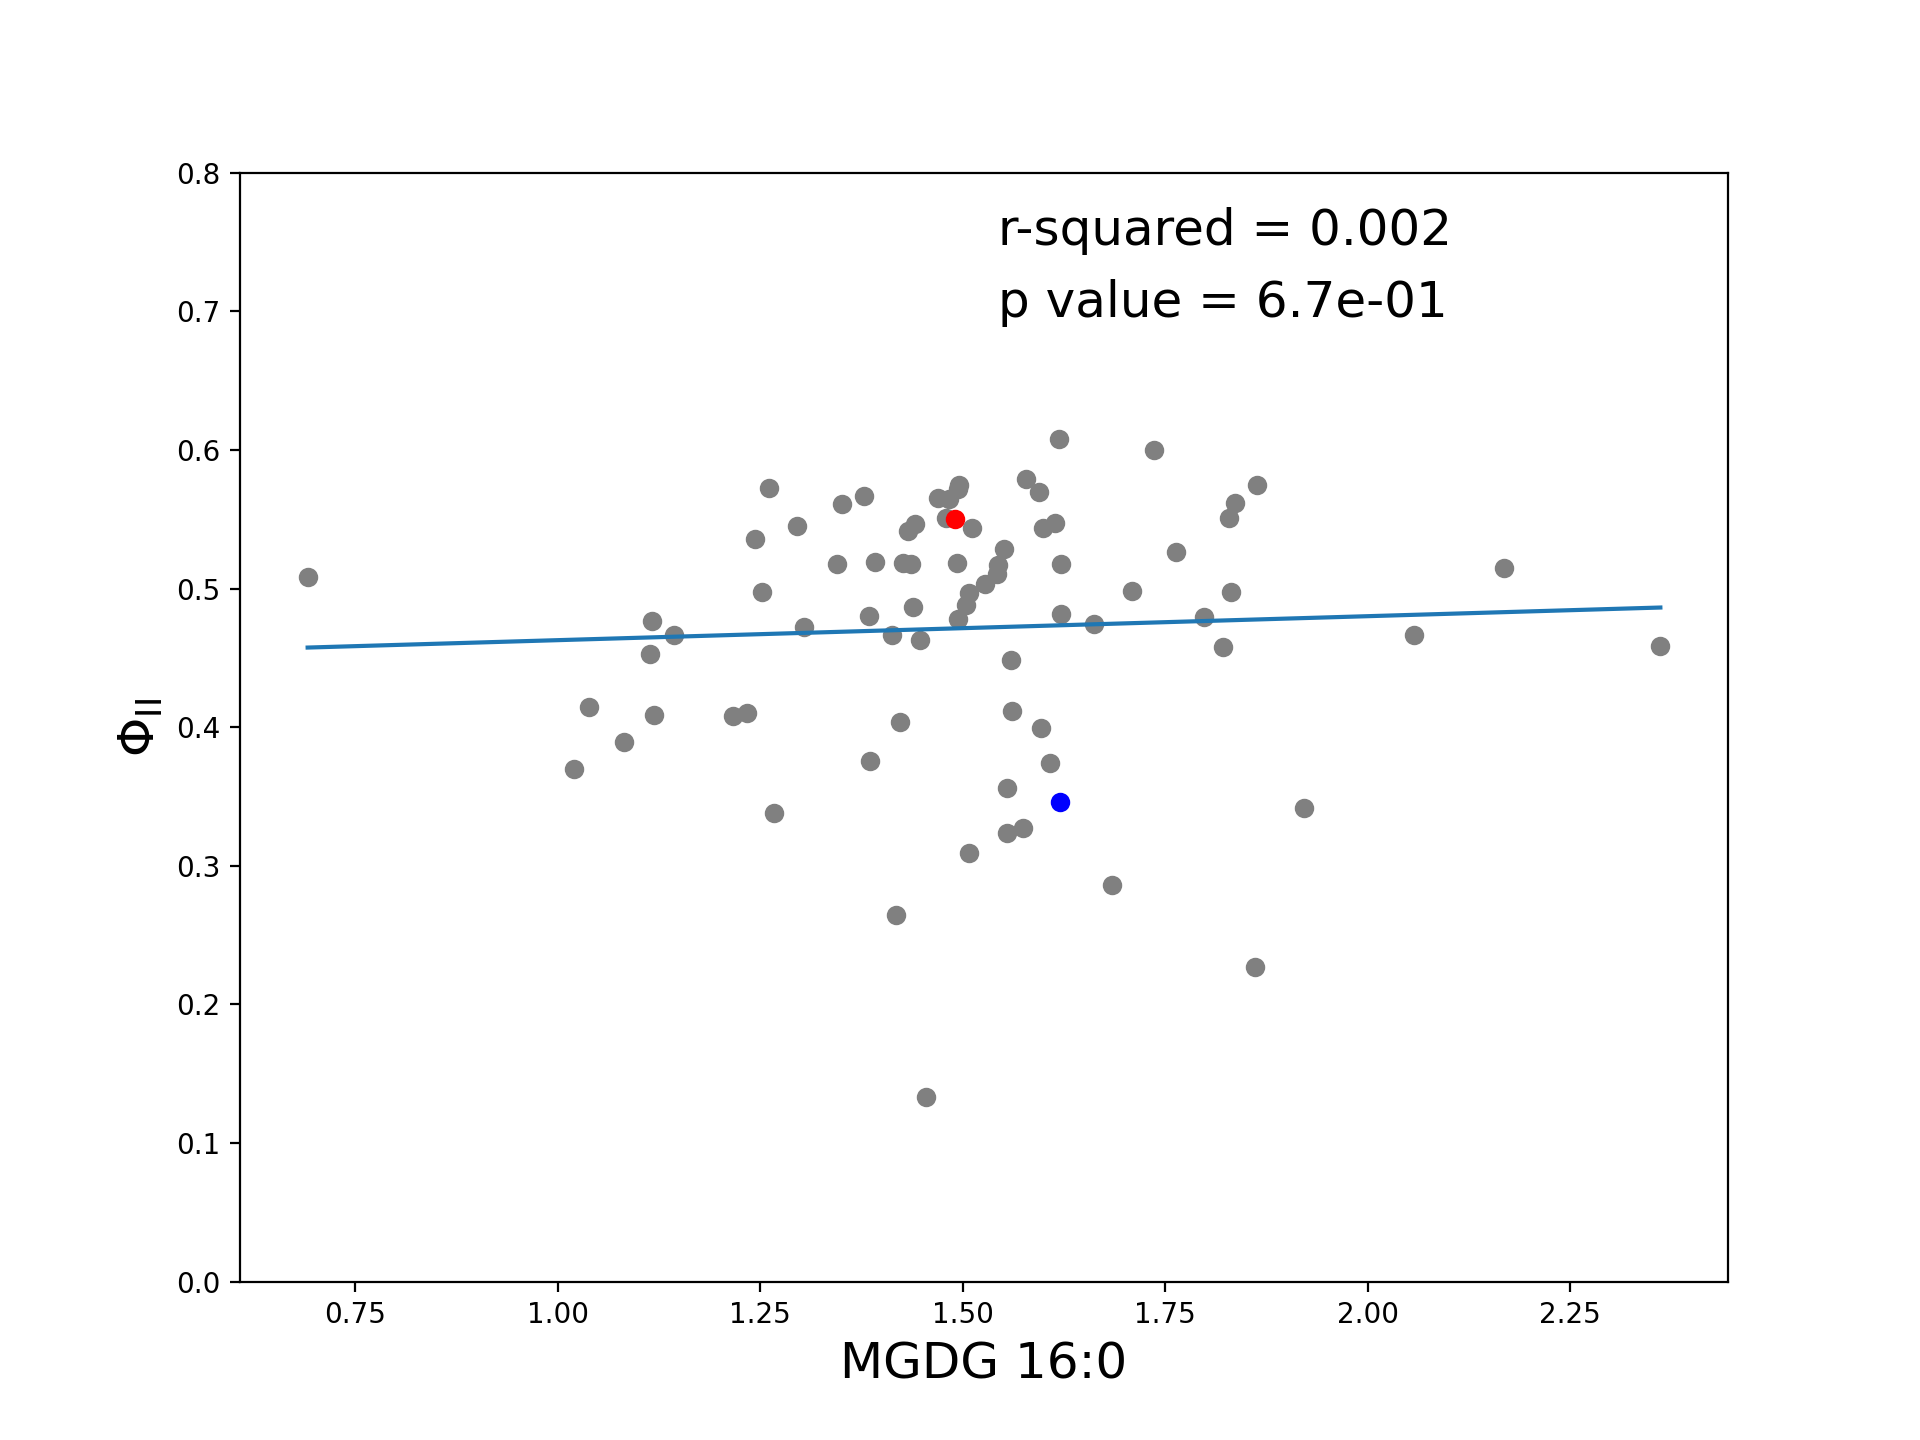

In [12]:
x_column = 'MGDG_16_0'
y_column = 'LT_DEPI_phi2_81'



genotype_colors = {
    "CB27": "red",
    "24-125B-1": "blue"
}

default_color = "grey"

# find which points have data
good_points = np.isfinite(df[x_column]) & np.isfinite(df[y_column])
x = df.loc[good_points,x_column]
y = df.loc[good_points,y_column]

# fit those points
slope, intercept, r_value, p_value, _ = linregress(x,y)



# show the plot
fig = plt.figure()

for row in df.index:
    geno,x,y = df.loc[row,["Genotype",x_column,y_column]]
    
    if geno in genotype_colors.keys():
        color = genotype_colors[geno]
    else:
        color = default_color
        
    plt.scatter( x, y, c=color )

line_x = np.array([df[x_column].min(), df[x_column].max()])
plt.plot( line_x, slope * line_x + intercept )
plt.xlabel("MGDG 16:0",size=18)
plt.ylabel("$\mathregular{Φ_{II}}$",size=18)
plt.text( .52,.83,"r-squared = {0:.3f}".format( r_value ** 2 ), transform=fig.transFigure,size=18 )
plt.text( .52,.78, "p value = {0:.1e}".format( p_value ), transform=fig.transFigure,size=18 )
plt.ylim(0,0.8)
#.13,.83
#.13,.78
plt.savefig('phi2_81_MGDG_16_0',dpi =600)
plt.show()

<IPython.core.display.Javascript object>


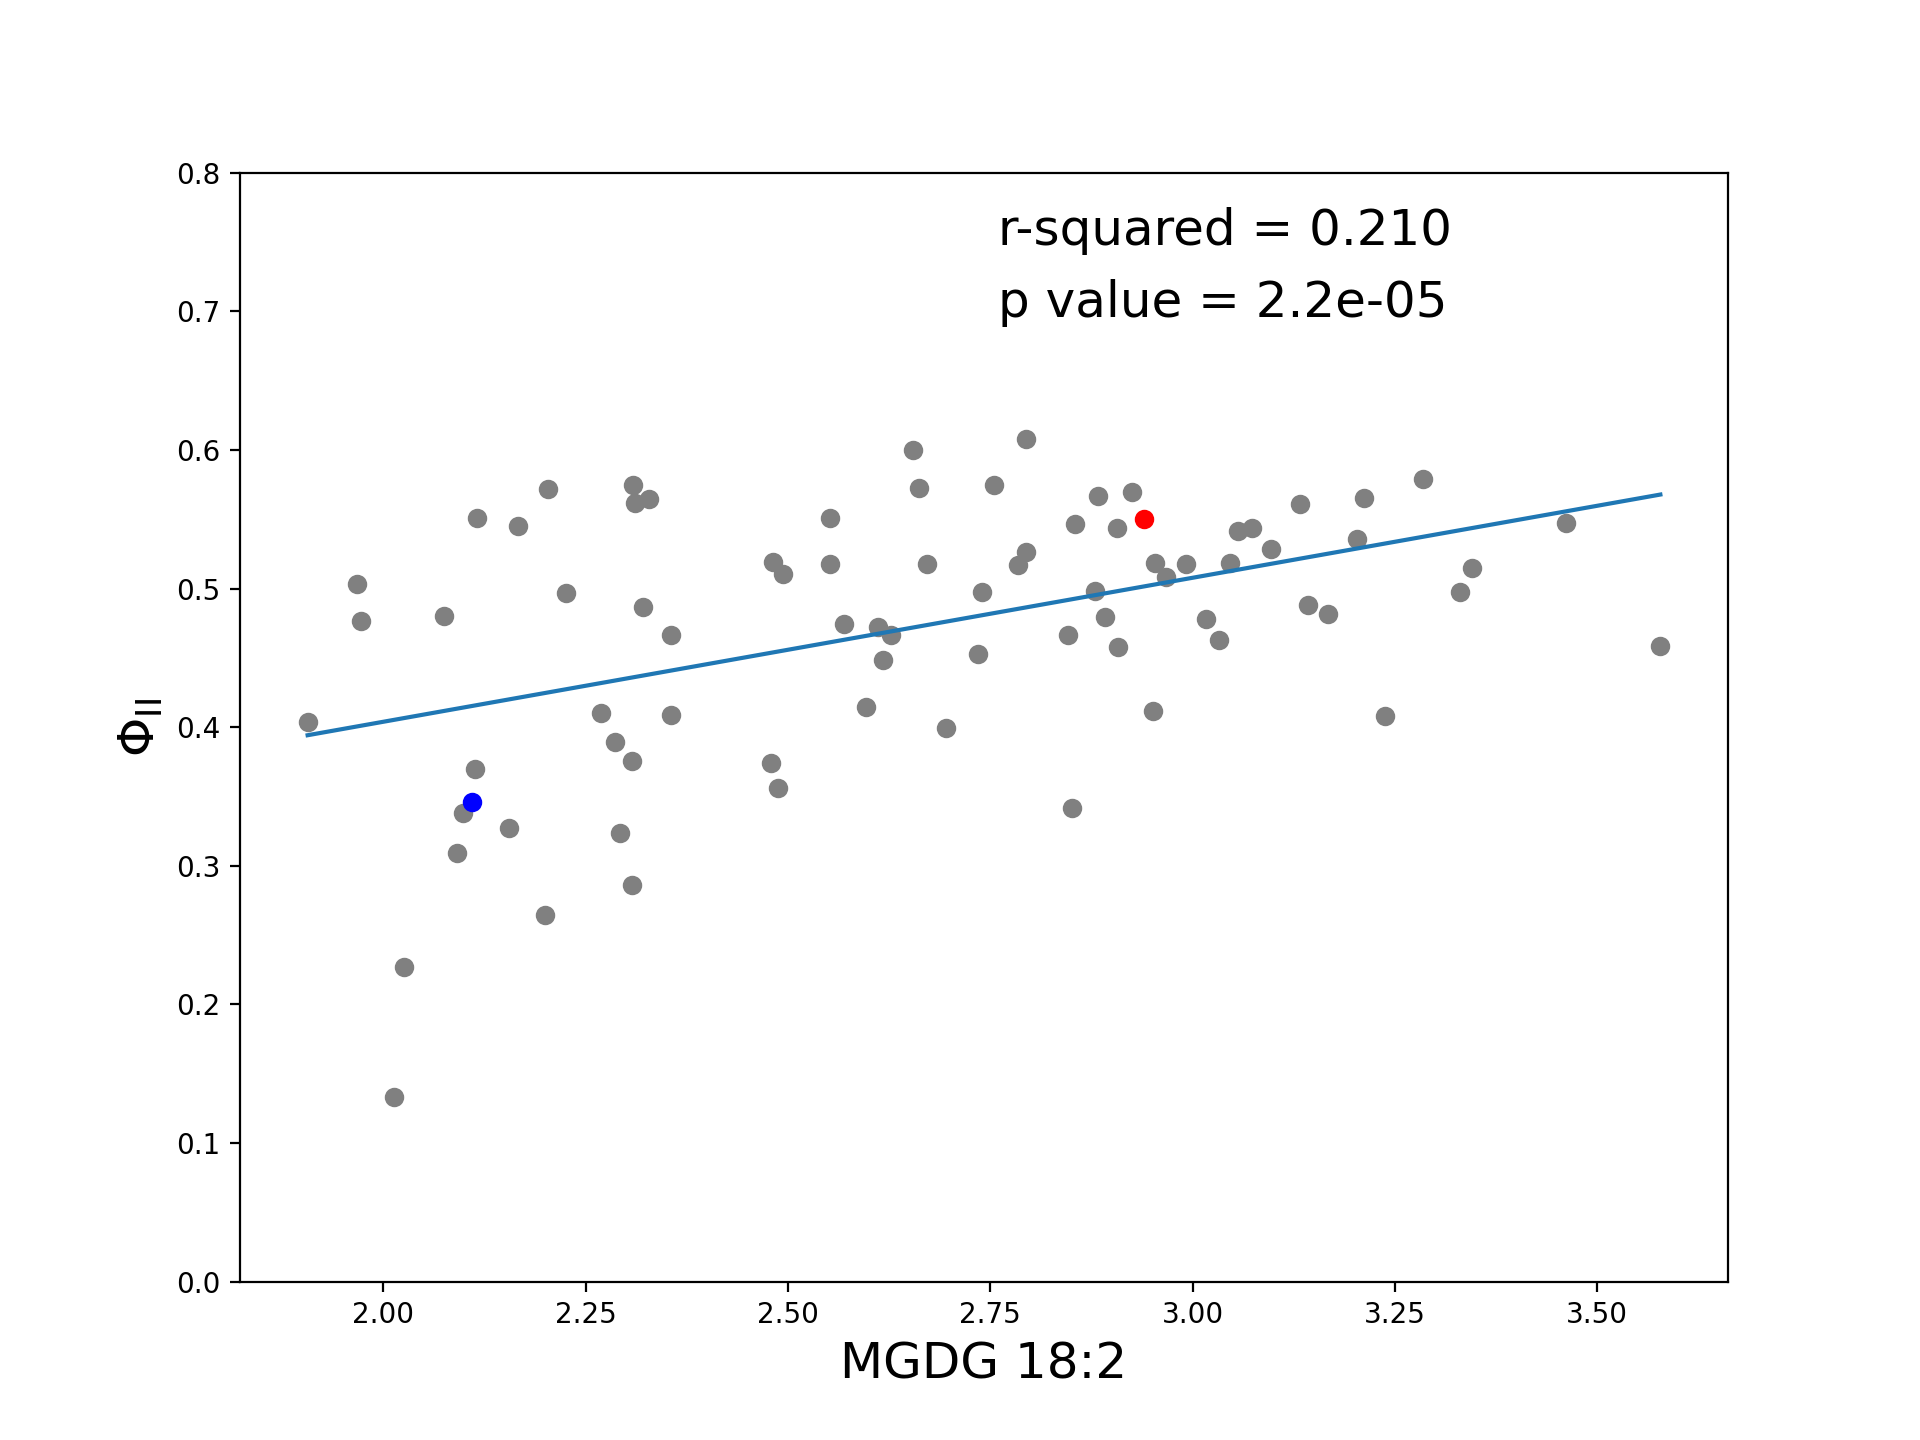

In [14]:
x_column = 'MGDG_18_2'
y_column = 'LT_DEPI_phi2_81'



genotype_colors = {
    "CB27": "red",
    "24-125B-1": "blue"
}

default_color = "grey"

# find which points have data
good_points = np.isfinite(df[x_column]) & np.isfinite(df[y_column])
x = df.loc[good_points,x_column]
y = df.loc[good_points,y_column]

# fit those points
slope, intercept, r_value, p_value, _ = linregress(x,y)



# show the plot
fig = plt.figure()

for row in df.index:
    geno,x,y = df.loc[row,["Genotype",x_column,y_column]]
    
    if geno in genotype_colors.keys():
        color = genotype_colors[geno]
    else:
        color = default_color
        
    plt.scatter( x, y, c=color )

line_x = np.array([df[x_column].min(), df[x_column].max()])
plt.plot( line_x, slope * line_x + intercept )
plt.xlabel("MGDG 18:2",size=18)
plt.ylabel("$\mathregular{Φ_{II}}$",size=18)
plt.text( .52,.83,"r-squared = {0:.3f}".format( r_value ** 2 ), transform=fig.transFigure,size=18 )
plt.text( .52,.78, "p value = {0:.1e}".format( p_value ), transform=fig.transFigure,size=18 )
plt.ylim(0,0.8)
#.13,.83
#.13,.78
plt.savefig('phi2_81_MGDG_18_2',dpi =600)
plt.show()

<IPython.core.display.Javascript object>


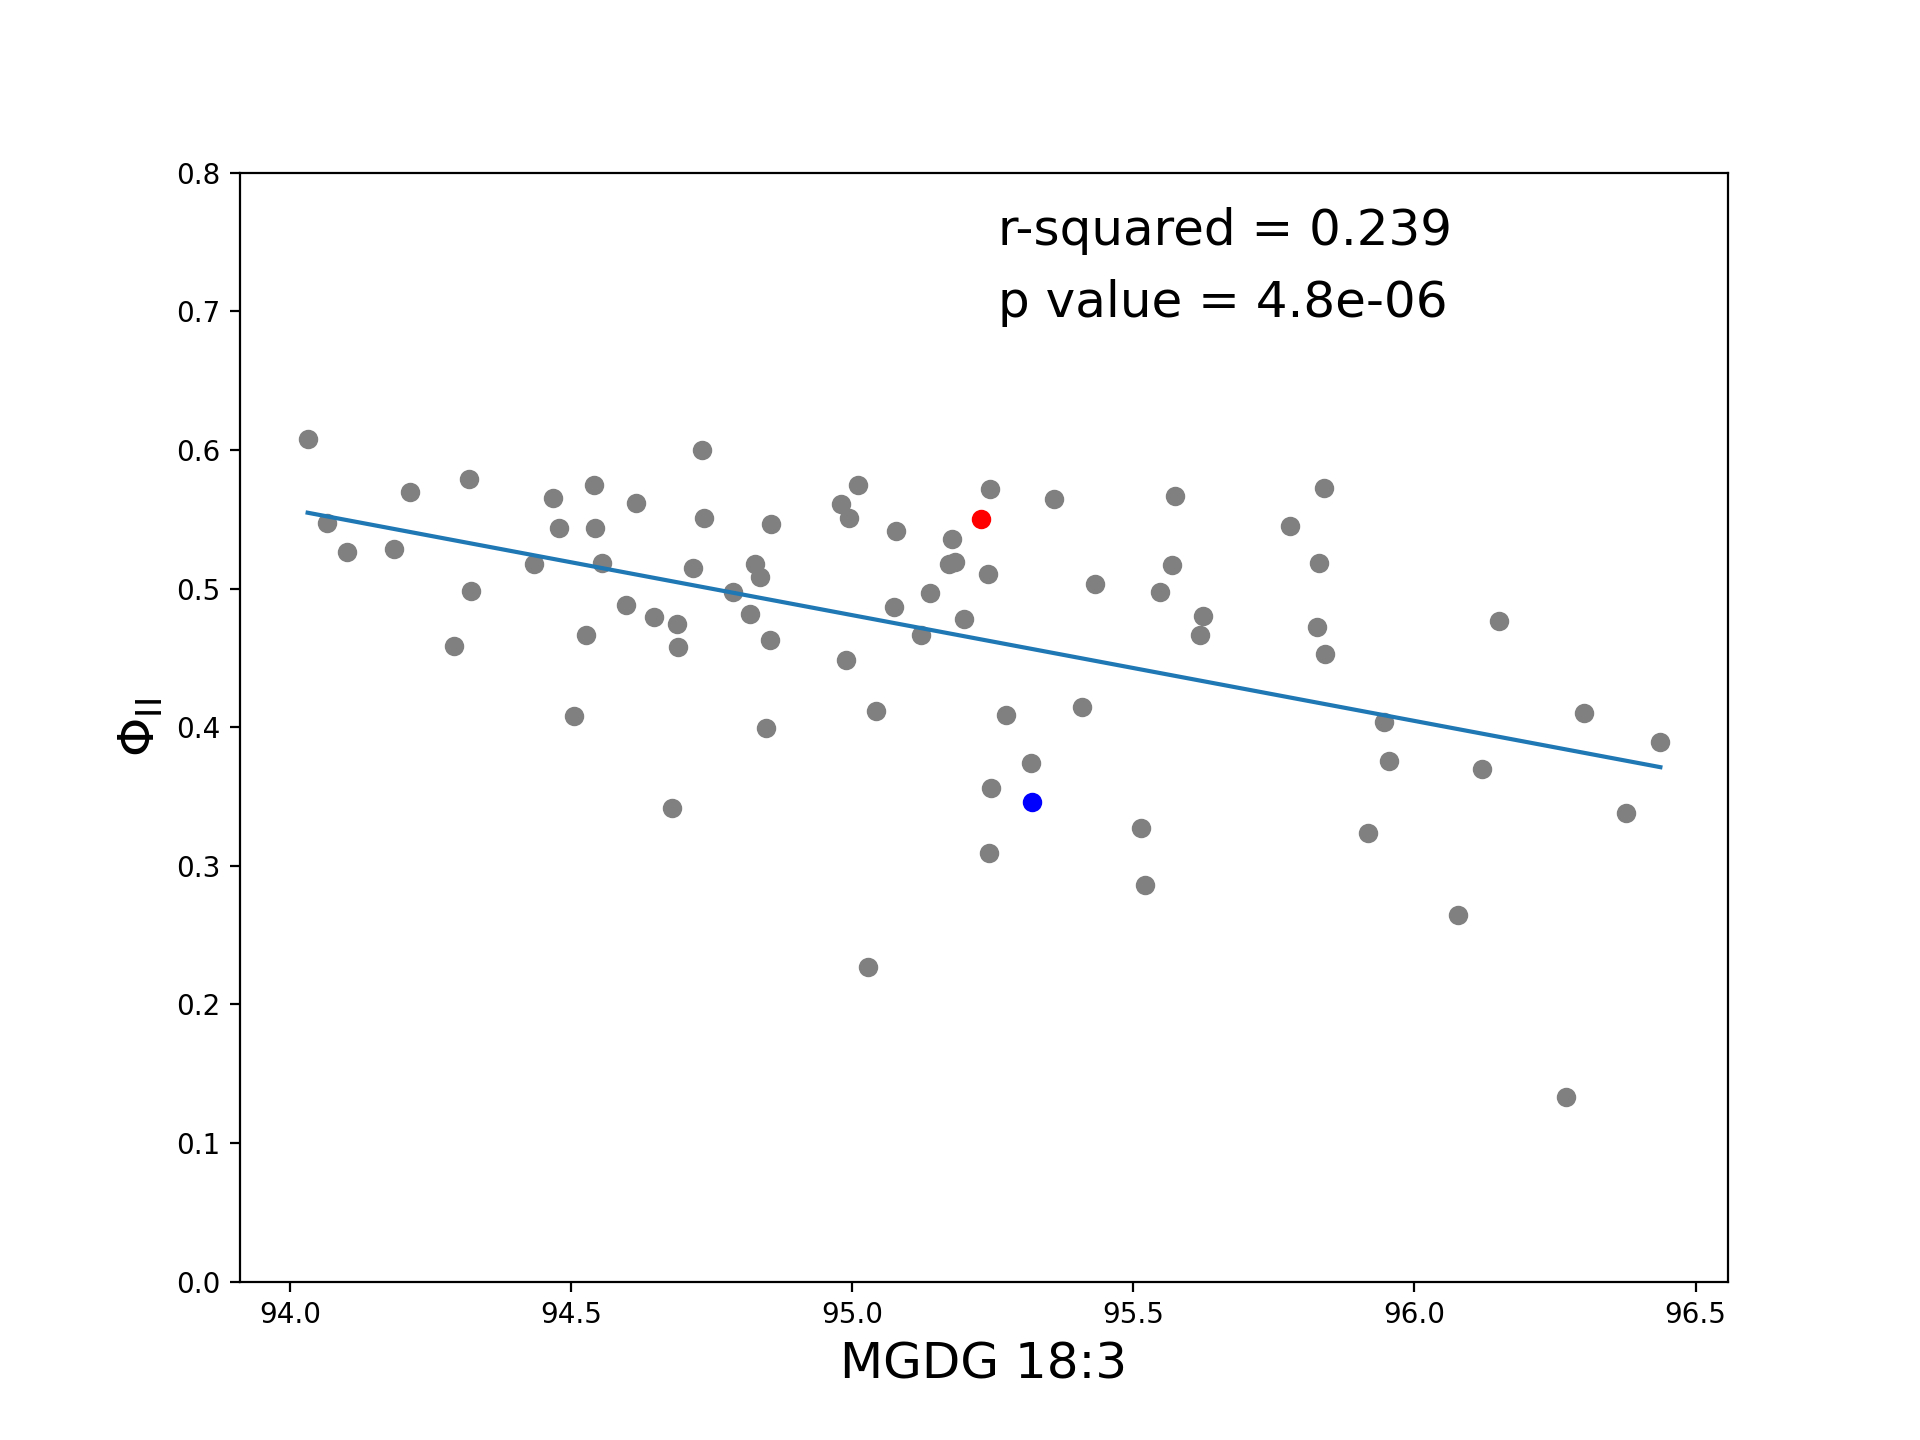

In [15]:
x_column = 'MGDG_18_3'
y_column = 'LT_DEPI_phi2_81'



genotype_colors = {
    "CB27": "red",
    "24-125B-1": "blue"
}

default_color = "grey"

# find which points have data
good_points = np.isfinite(df[x_column]) & np.isfinite(df[y_column])
x = df.loc[good_points,x_column]
y = df.loc[good_points,y_column]

# fit those points
slope, intercept, r_value, p_value, _ = linregress(x,y)



# show the plot
fig = plt.figure()

for row in df.index:
    geno,x,y = df.loc[row,["Genotype",x_column,y_column]]
    
    if geno in genotype_colors.keys():
        color = genotype_colors[geno]
    else:
        color = default_color
        
    plt.scatter( x, y, c=color )

line_x = np.array([df[x_column].min(), df[x_column].max()])
plt.plot( line_x, slope * line_x + intercept )
plt.xlabel("MGDG 18:3",size=18)
plt.ylabel("$\mathregular{Φ_{II}}$",size=18)
plt.text( .52,.83,"r-squared = {0:.3f}".format( r_value ** 2 ), transform=fig.transFigure,size=18 )
plt.text( .52,.78, "p value = {0:.1e}".format( p_value ), transform=fig.transFigure,size=18 )
plt.ylim(0,0.8)
#.13,.83
#.13,.78
plt.savefig('phi2_81_MGDG_18_3',dpi =600)
plt.show()


<IPython.core.display.Javascript object>


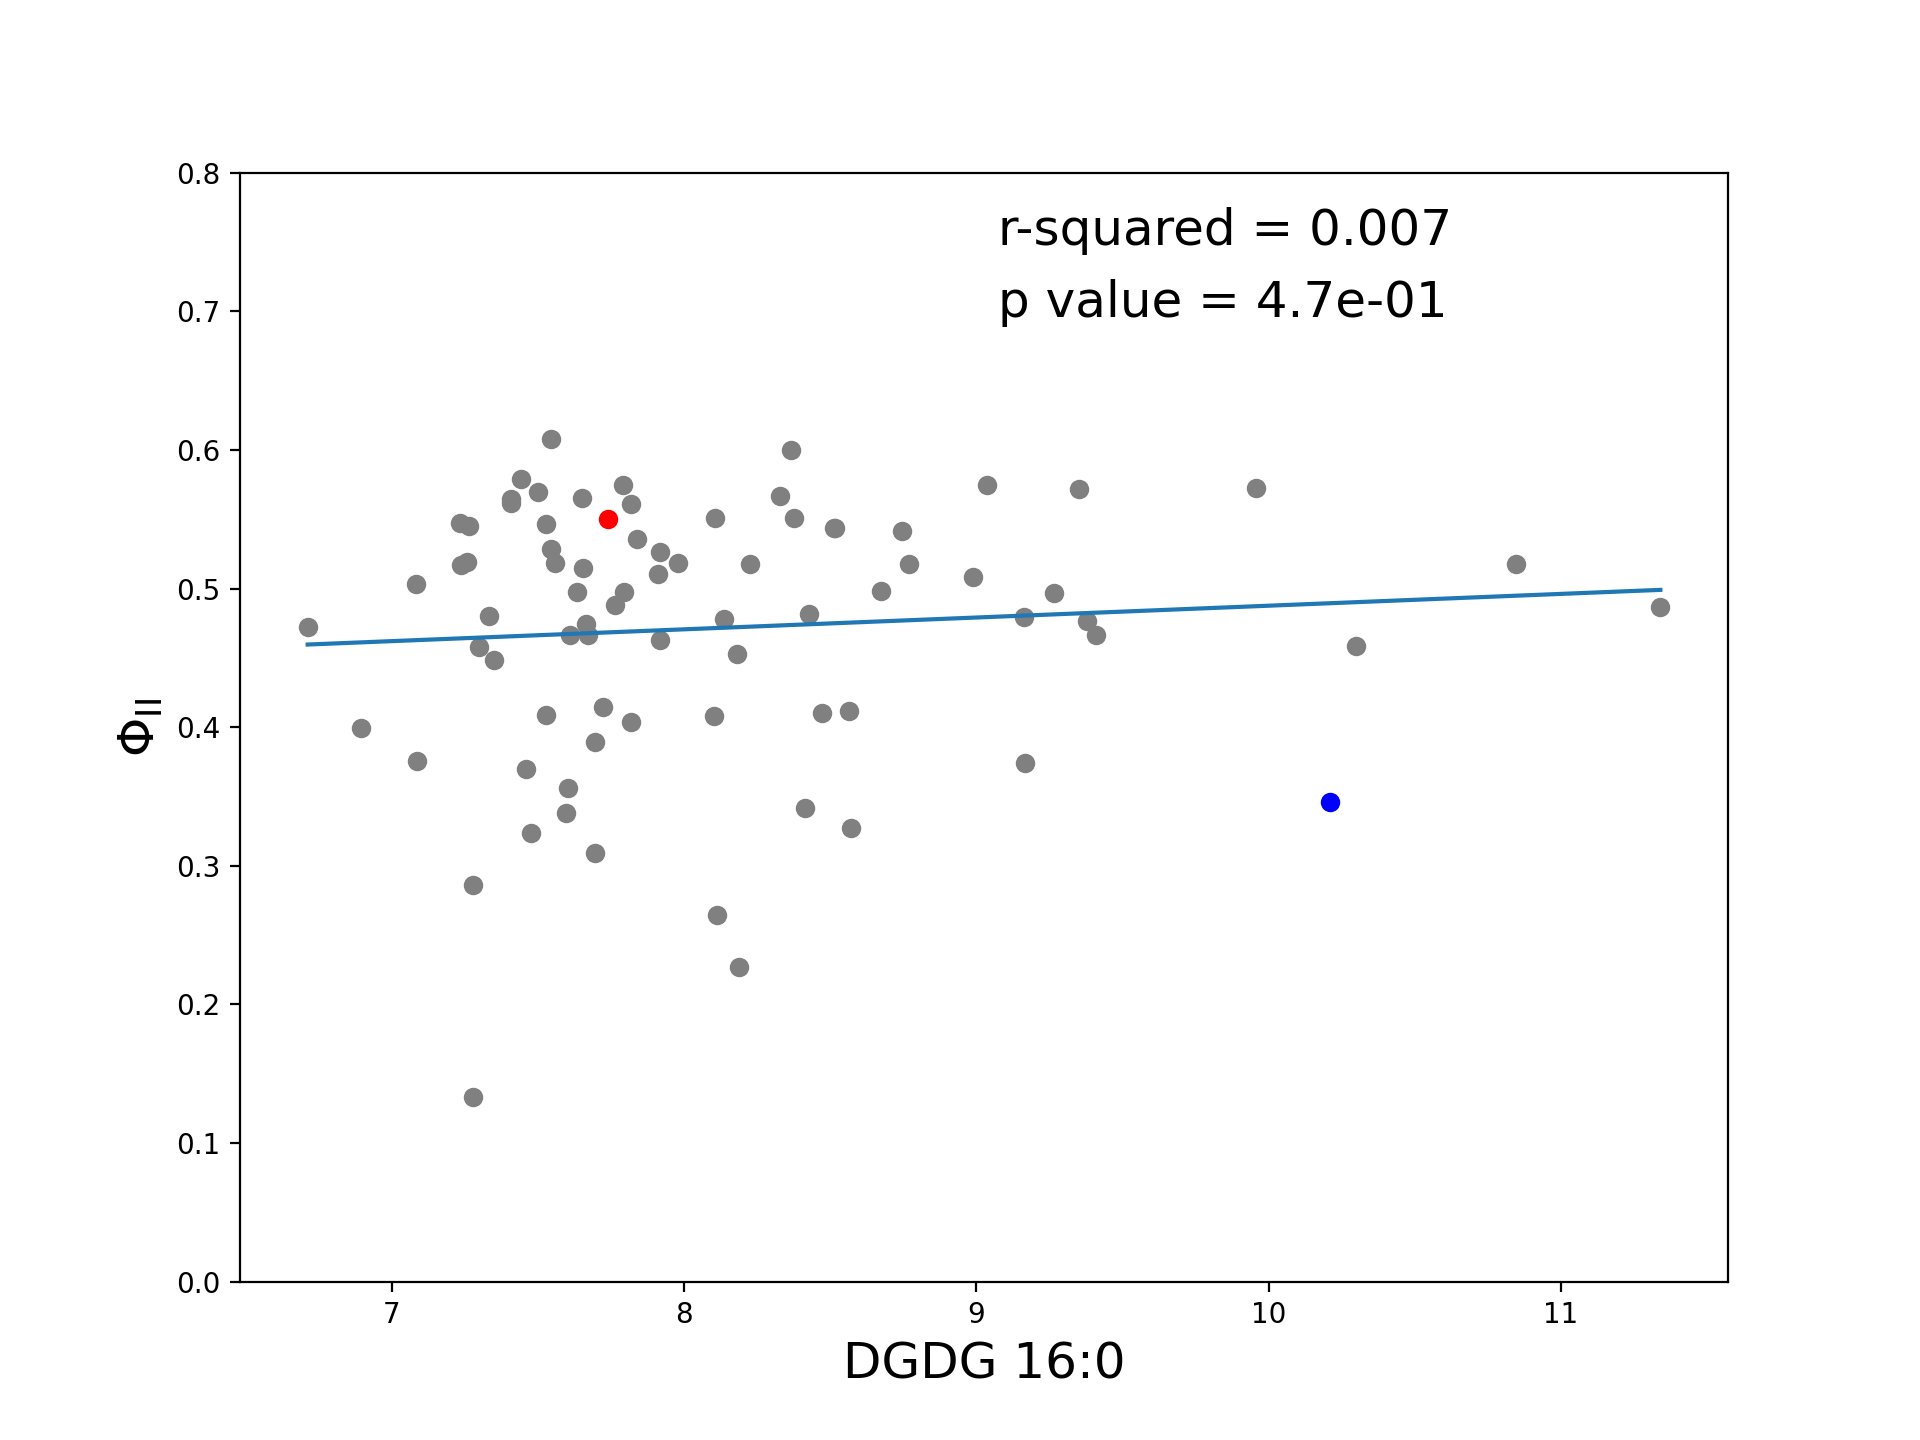

In [19]:
x_column = 'DGDG_16_0'
y_column = 'LT_DEPI_phi2_81'



genotype_colors = {
    "CB27": "red",
    "24-125B-1": "blue"
}

default_color = "grey"

# find which points have data
good_points = np.isfinite(df[x_column]) & np.isfinite(df[y_column])
x = df.loc[good_points,x_column]
y = df.loc[good_points,y_column]

# fit those points
slope, intercept, r_value, p_value, _ = linregress(x,y)



# show the plot
fig = plt.figure()

for row in df.index:
    geno,x,y = df.loc[row,["Genotype",x_column,y_column]]
    
    if geno in genotype_colors.keys():
        color = genotype_colors[geno]
    else:
        color = default_color
        
    plt.scatter( x, y, c=color )

line_x = np.array([df[x_column].min(), df[x_column].max()])
plt.plot( line_x, slope * line_x + intercept )
plt.xlabel("DGDG 16:0",size=18)
plt.ylabel("$\mathregular{Φ_{II}}$",size=18)
plt.text( .52,.83,"r-squared = {0:.3f}".format( r_value ** 2 ), transform=fig.transFigure,size=18 )
plt.text( .52,.78, "p value = {0:.1e}".format( p_value ), transform=fig.transFigure,size=18 )
plt.ylim(0,0.8)
#.13,.83
#.13,.78
plt.savefig('phi2_81_DGDG_16_0',dpi =600)
plt.show()



<IPython.core.display.Javascript object>


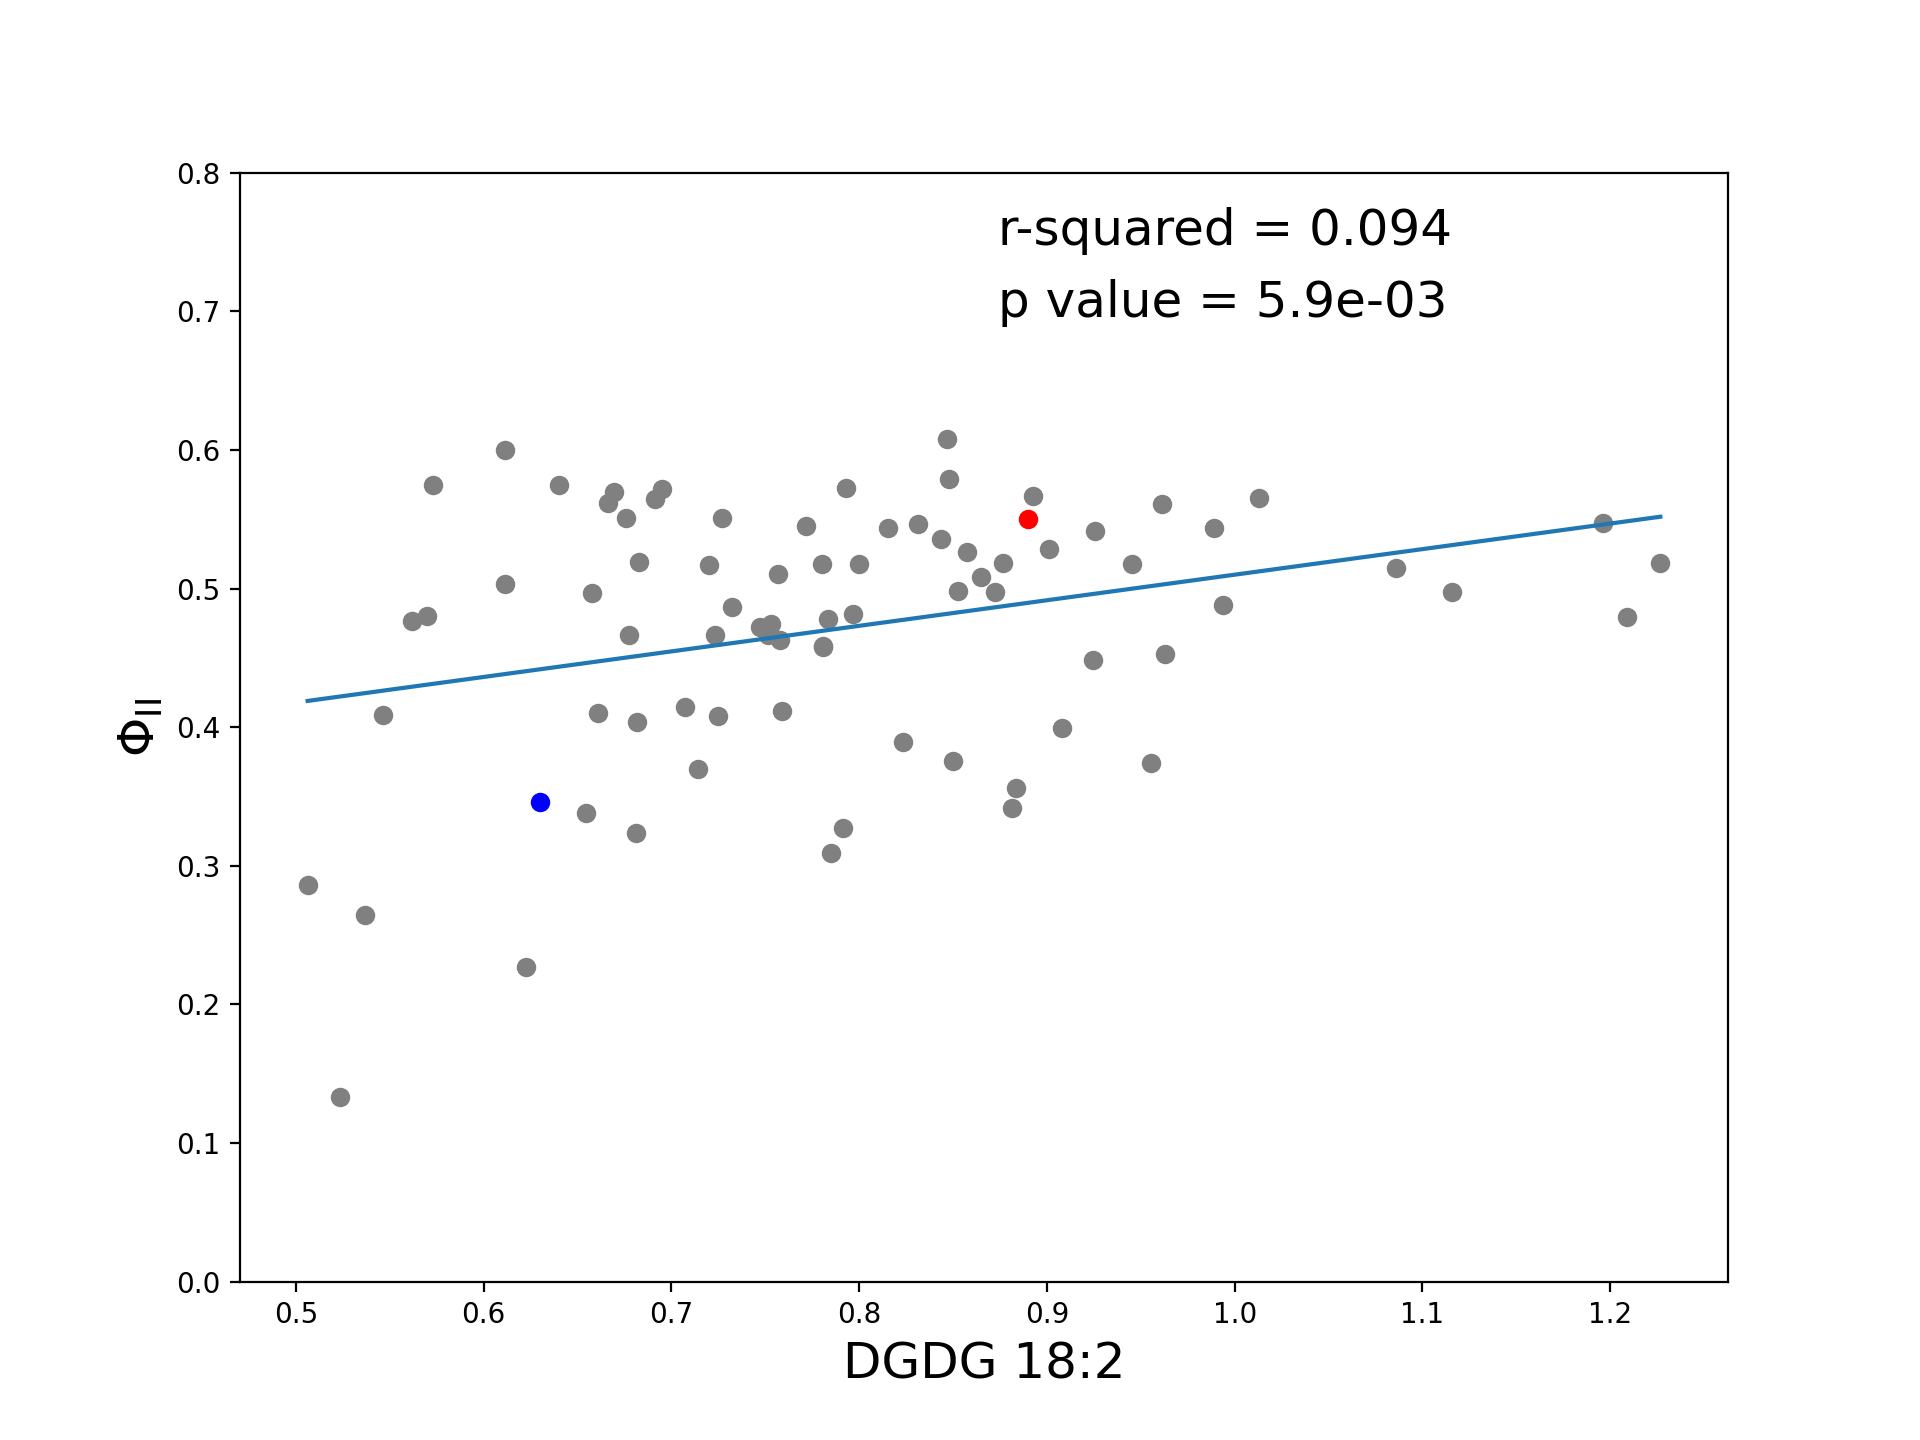

In [20]:
x_column = 'DGDG_18_2'
y_column = 'LT_DEPI_phi2_81'



genotype_colors = {
    "CB27": "red",
    "24-125B-1": "blue"
}

default_color = "grey"

# find which points have data
good_points = np.isfinite(df[x_column]) & np.isfinite(df[y_column])
x = df.loc[good_points,x_column]
y = df.loc[good_points,y_column]

# fit those points
slope, intercept, r_value, p_value, _ = linregress(x,y)



# show the plot
fig = plt.figure()

for row in df.index:
    geno,x,y = df.loc[row,["Genotype",x_column,y_column]]
    
    if geno in genotype_colors.keys():
        color = genotype_colors[geno]
    else:
        color = default_color
        
    plt.scatter( x, y, c=color )

line_x = np.array([df[x_column].min(), df[x_column].max()])
plt.plot( line_x, slope * line_x + intercept )
plt.xlabel("DGDG 18:2",size=18)
plt.ylabel("$\mathregular{Φ_{II}}$",size=18)
plt.text( .52,.83,"r-squared = {0:.3f}".format( r_value ** 2 ), transform=fig.transFigure,size=18 )
plt.text( .52,.78, "p value = {0:.1e}".format( p_value ), transform=fig.transFigure,size=18 )
plt.ylim(0,0.8)
#.13,.83
#.13,.78
plt.savefig('phi2_81_DGDG_18_2',dpi =600)
plt.show()




<IPython.core.display.Javascript object>


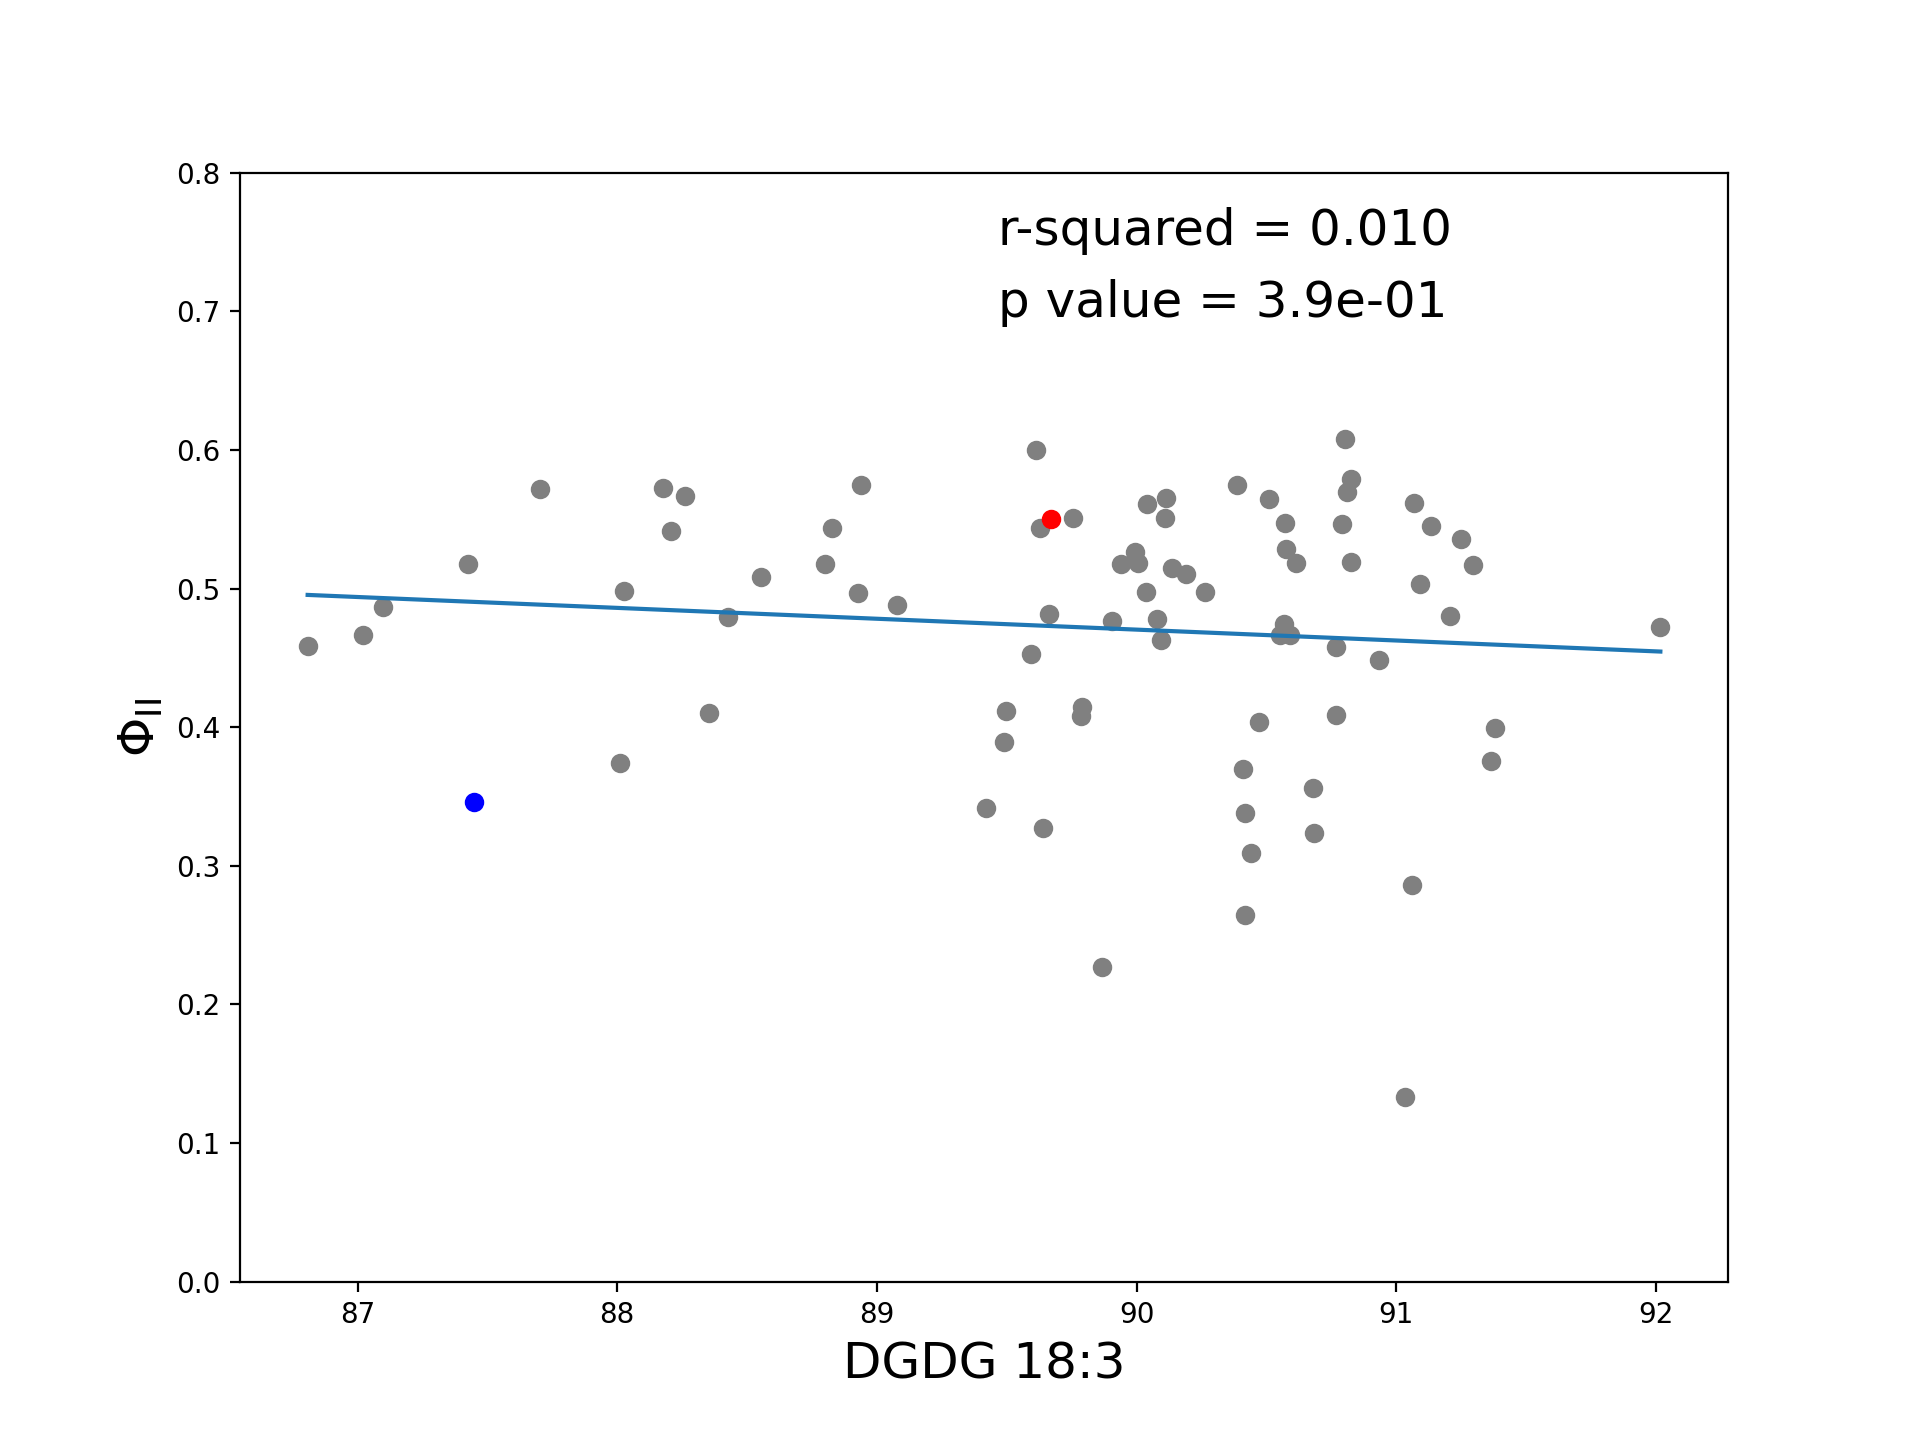

In [21]:
x_column = 'DGDG_18_3'
y_column = 'LT_DEPI_phi2_81'



genotype_colors = {
    "CB27": "red",
    "24-125B-1": "blue"
}

default_color = "grey"

# find which points have data
good_points = np.isfinite(df[x_column]) & np.isfinite(df[y_column])
x = df.loc[good_points,x_column]
y = df.loc[good_points,y_column]

# fit those points
slope, intercept, r_value, p_value, _ = linregress(x,y)



# show the plot
fig = plt.figure()

for row in df.index:
    geno,x,y = df.loc[row,["Genotype",x_column,y_column]]
    
    if geno in genotype_colors.keys():
        color = genotype_colors[geno]
    else:
        color = default_color
        
    plt.scatter( x, y, c=color )

line_x = np.array([df[x_column].min(), df[x_column].max()])
plt.plot( line_x, slope * line_x + intercept )
plt.xlabel("DGDG 18:3",size=18)
plt.ylabel("$\mathregular{Φ_{II}}$",size=18)
plt.text( .52,.83,"r-squared = {0:.3f}".format( r_value ** 2 ), transform=fig.transFigure,size=18 )
plt.text( .52,.78, "p value = {0:.1e}".format( p_value ), transform=fig.transFigure,size=18 )
plt.ylim(0,0.8)
#.13,.83
#.13,.78
plt.savefig('phi2_81_DGDG_18_3',dpi =600)
plt.show()




<IPython.core.display.Javascript object>


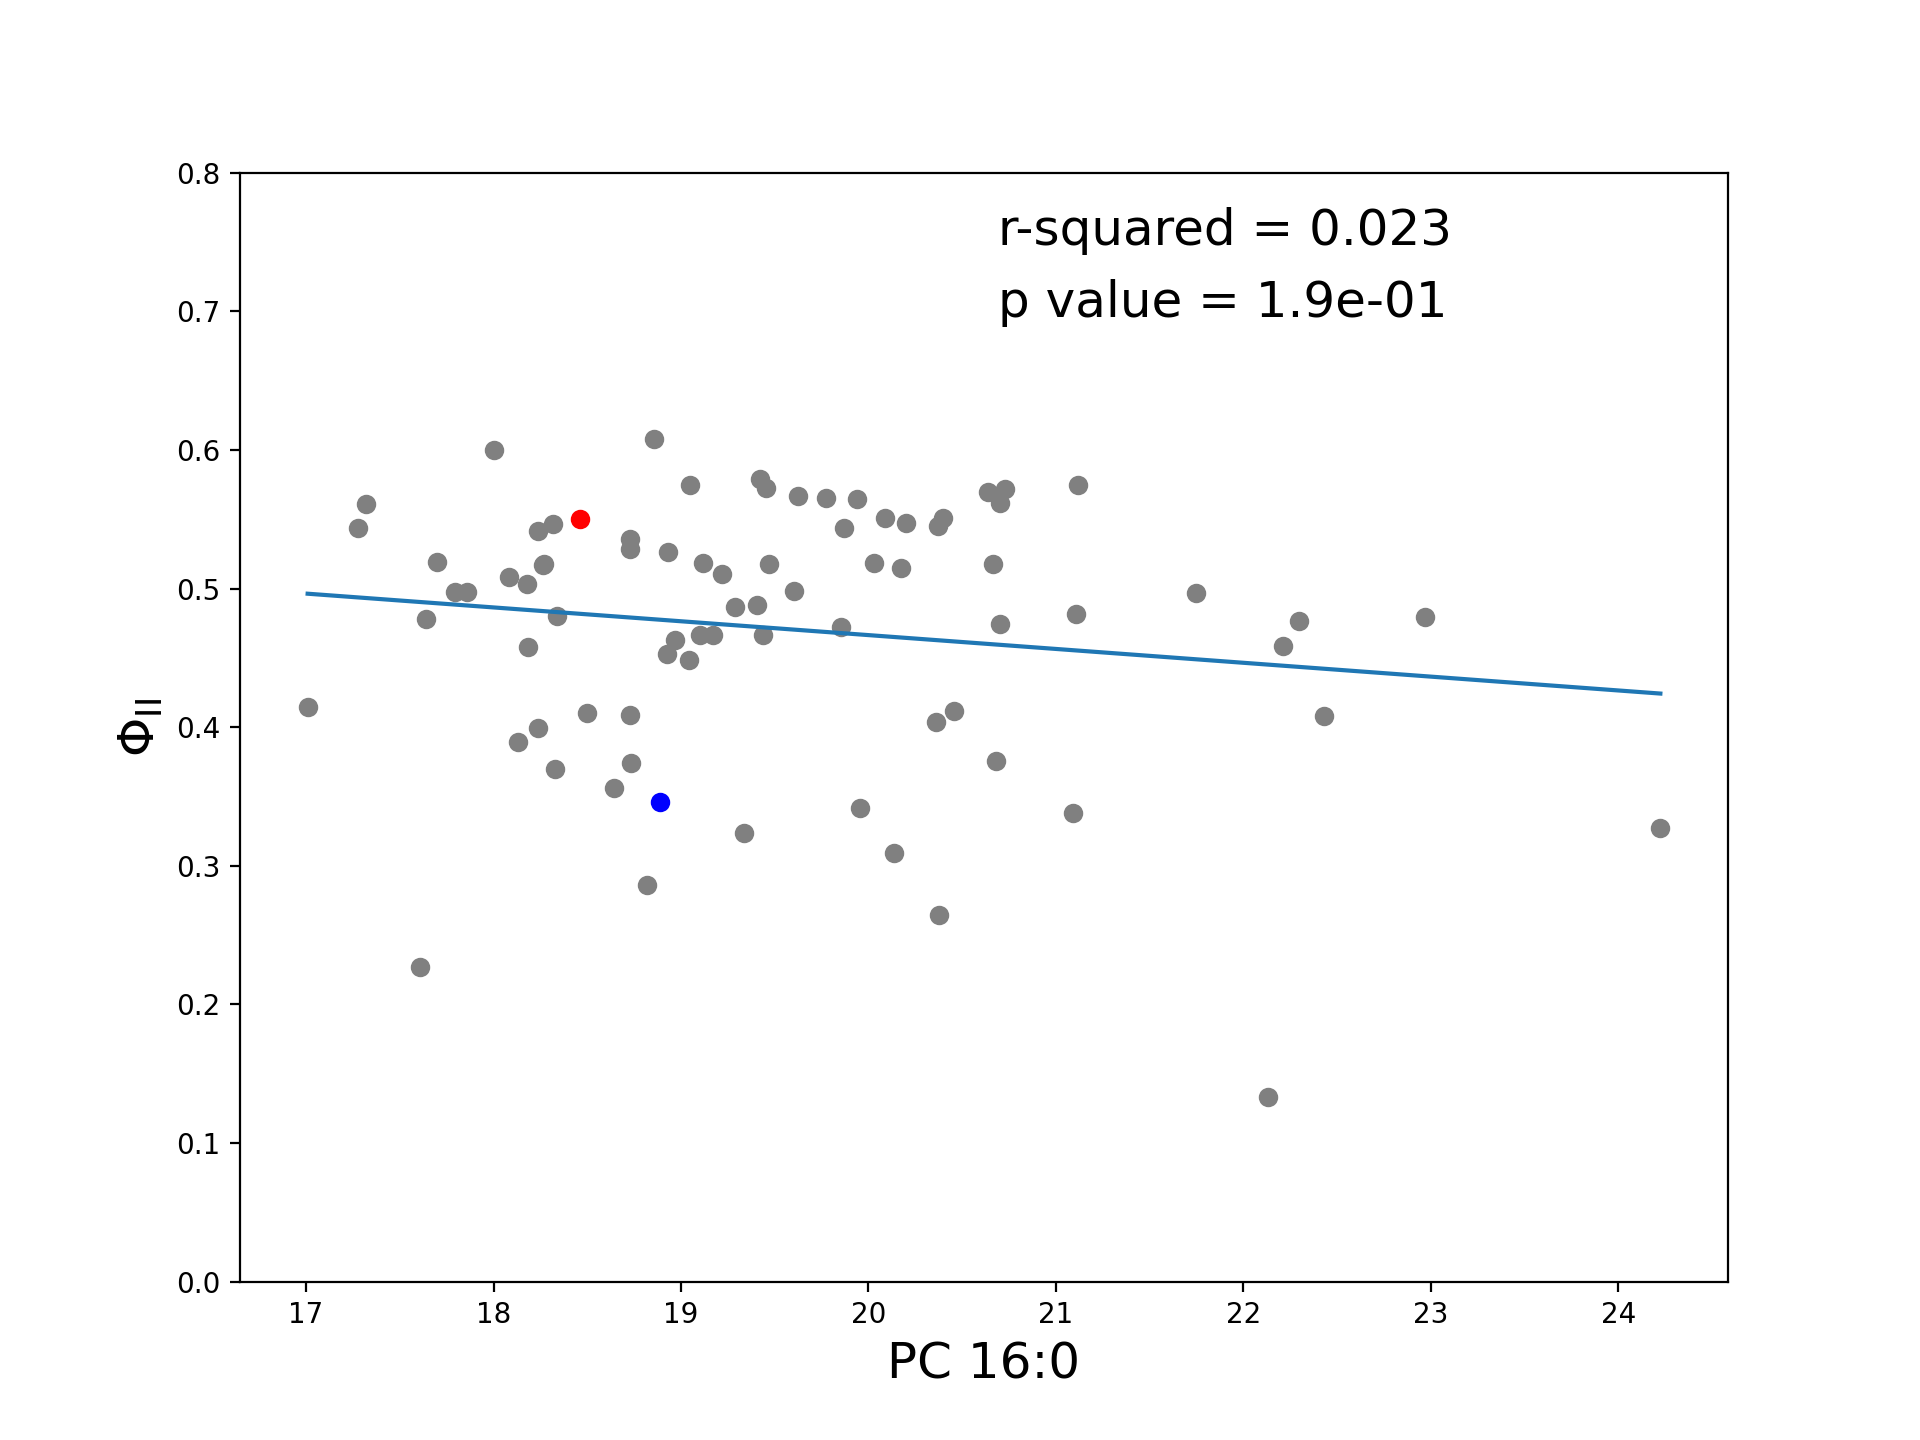

In [22]:
x_column = 'PC_16_0'
y_column = 'LT_DEPI_phi2_81'



genotype_colors = {
    "CB27": "red",
    "24-125B-1": "blue"
}

default_color = "grey"

# find which points have data
good_points = np.isfinite(df[x_column]) & np.isfinite(df[y_column])
x = df.loc[good_points,x_column]
y = df.loc[good_points,y_column]

# fit those points
slope, intercept, r_value, p_value, _ = linregress(x,y)



# show the plot
fig = plt.figure()

for row in df.index:
    geno,x,y = df.loc[row,["Genotype",x_column,y_column]]
    
    if geno in genotype_colors.keys():
        color = genotype_colors[geno]
    else:
        color = default_color
        
    plt.scatter( x, y, c=color )

line_x = np.array([df[x_column].min(), df[x_column].max()])
plt.plot( line_x, slope * line_x + intercept )
plt.xlabel("PC 16:0",size=18)
plt.ylabel("$\mathregular{Φ_{II}}$",size=18)
plt.text( .52,.83,"r-squared = {0:.3f}".format( r_value ** 2 ), transform=fig.transFigure,size=18 )
plt.text( .52,.78, "p value = {0:.1e}".format( p_value ), transform=fig.transFigure,size=18 )
plt.ylim(0,0.8)
#.13,.83
#.13,.78
plt.savefig('phi2_81_PC_16_0',dpi =600)
plt.show()




<IPython.core.display.Javascript object>


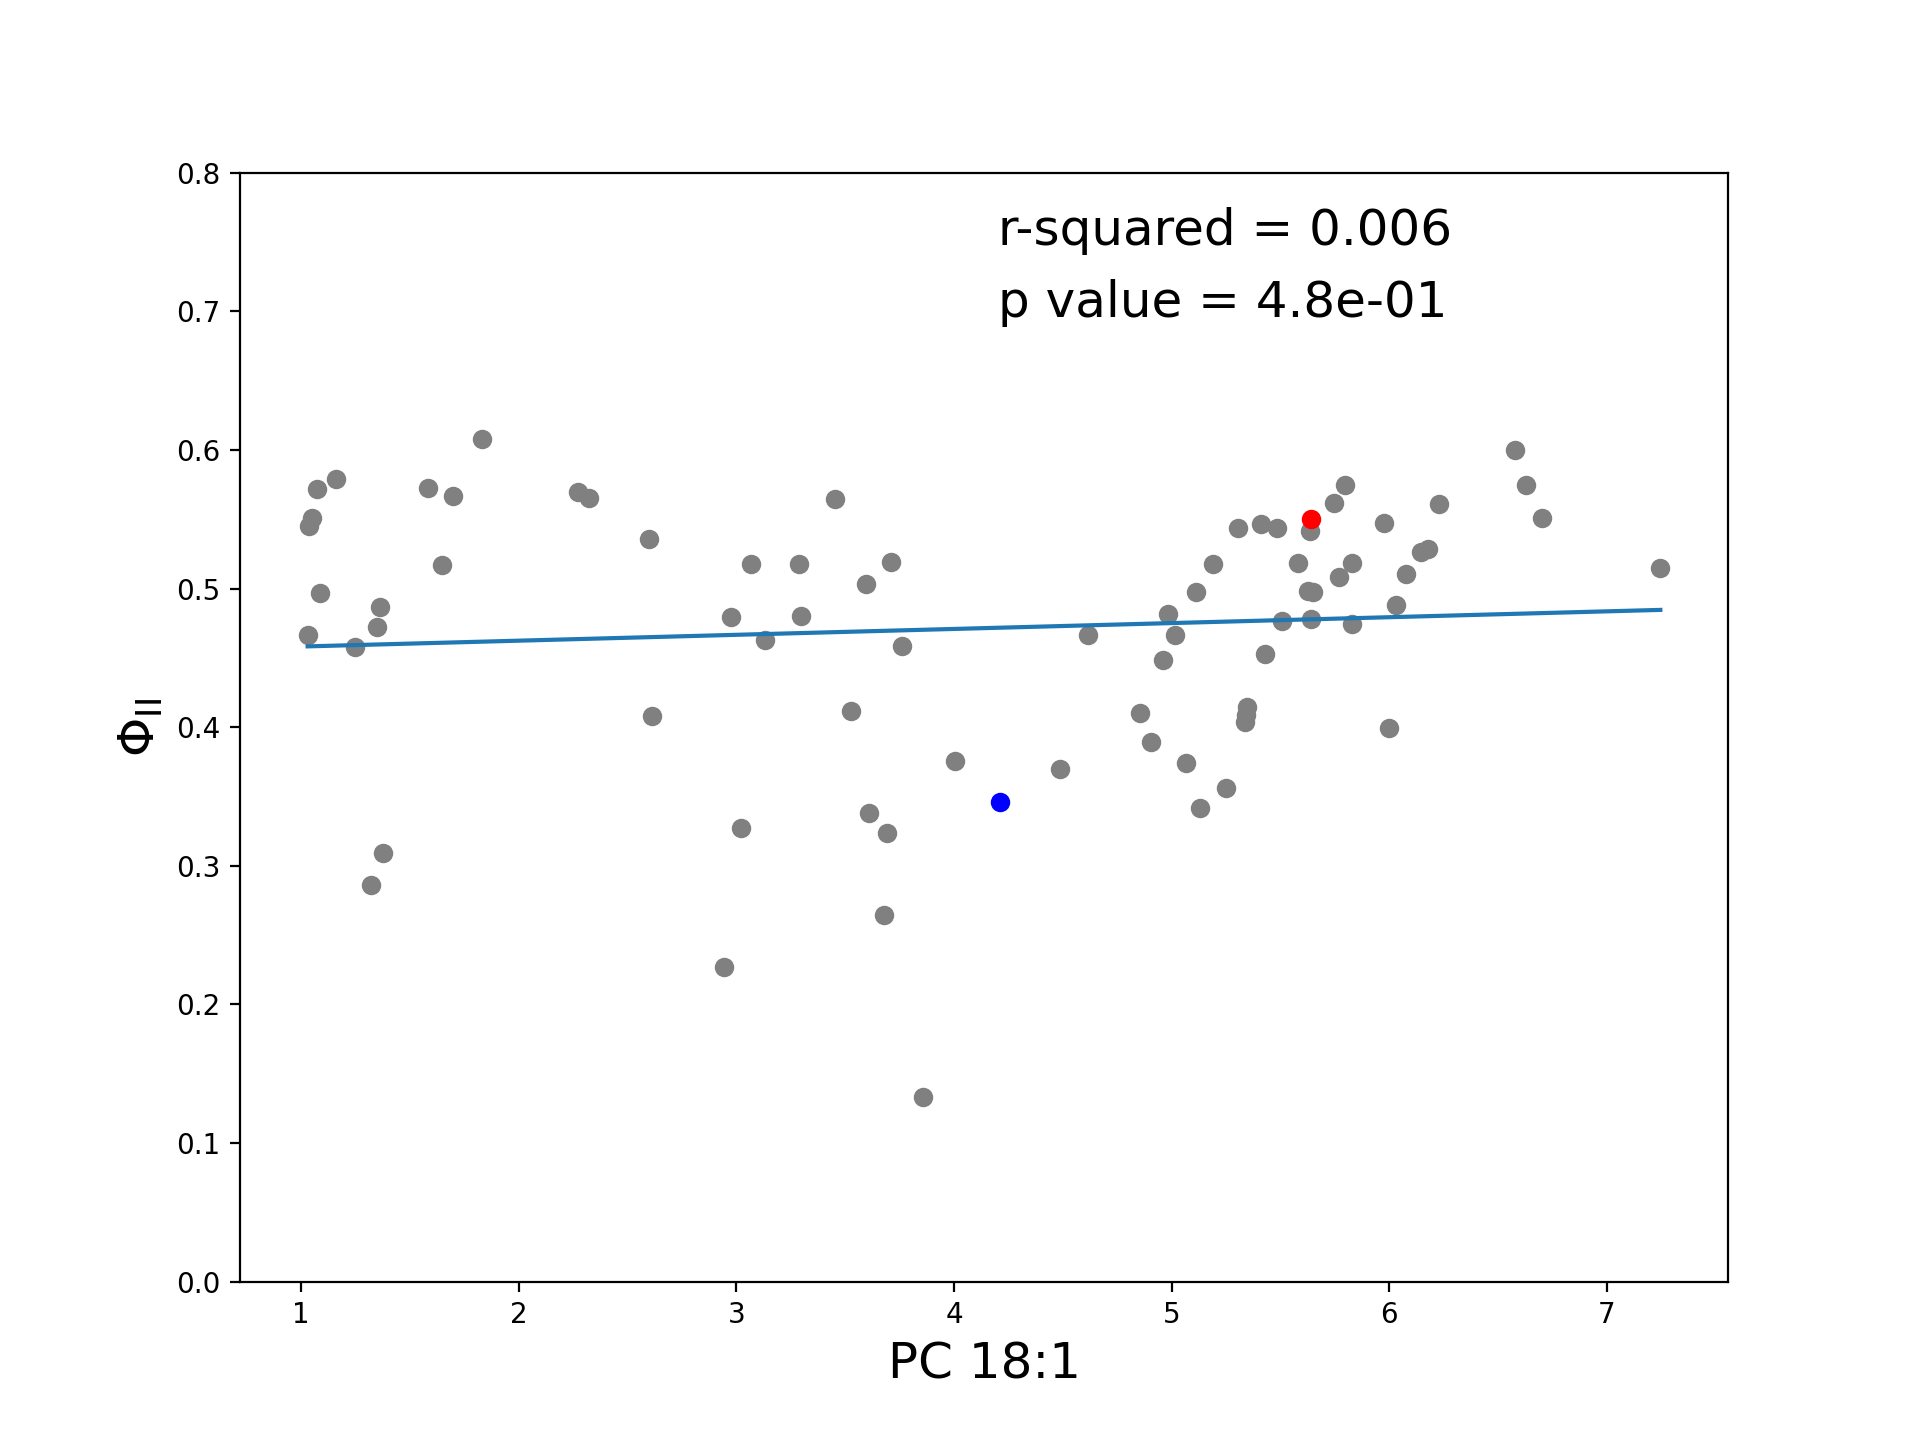

In [23]:
x_column = 'PC_18_1'
y_column = 'LT_DEPI_phi2_81'



genotype_colors = {
    "CB27": "red",
    "24-125B-1": "blue"
}

default_color = "grey"

# find which points have data
good_points = np.isfinite(df[x_column]) & np.isfinite(df[y_column])
x = df.loc[good_points,x_column]
y = df.loc[good_points,y_column]

# fit those points
slope, intercept, r_value, p_value, _ = linregress(x,y)



# show the plot
fig = plt.figure()

for row in df.index:
    geno,x,y = df.loc[row,["Genotype",x_column,y_column]]
    
    if geno in genotype_colors.keys():
        color = genotype_colors[geno]
    else:
        color = default_color
        
    plt.scatter( x, y, c=color )

line_x = np.array([df[x_column].min(), df[x_column].max()])
plt.plot( line_x, slope * line_x + intercept )
plt.xlabel("PC 18:1",size=18)
plt.ylabel("$\mathregular{Φ_{II}}$",size=18)
plt.text( .52,.83,"r-squared = {0:.3f}".format( r_value ** 2 ), transform=fig.transFigure,size=18 )
plt.text( .52,.78, "p value = {0:.1e}".format( p_value ), transform=fig.transFigure,size=18 )
plt.ylim(0,0.8)
#.13,.83
#.13,.78
plt.savefig('phi2_81_PC_18_1',dpi =600)
plt.show()




<IPython.core.display.Javascript object>


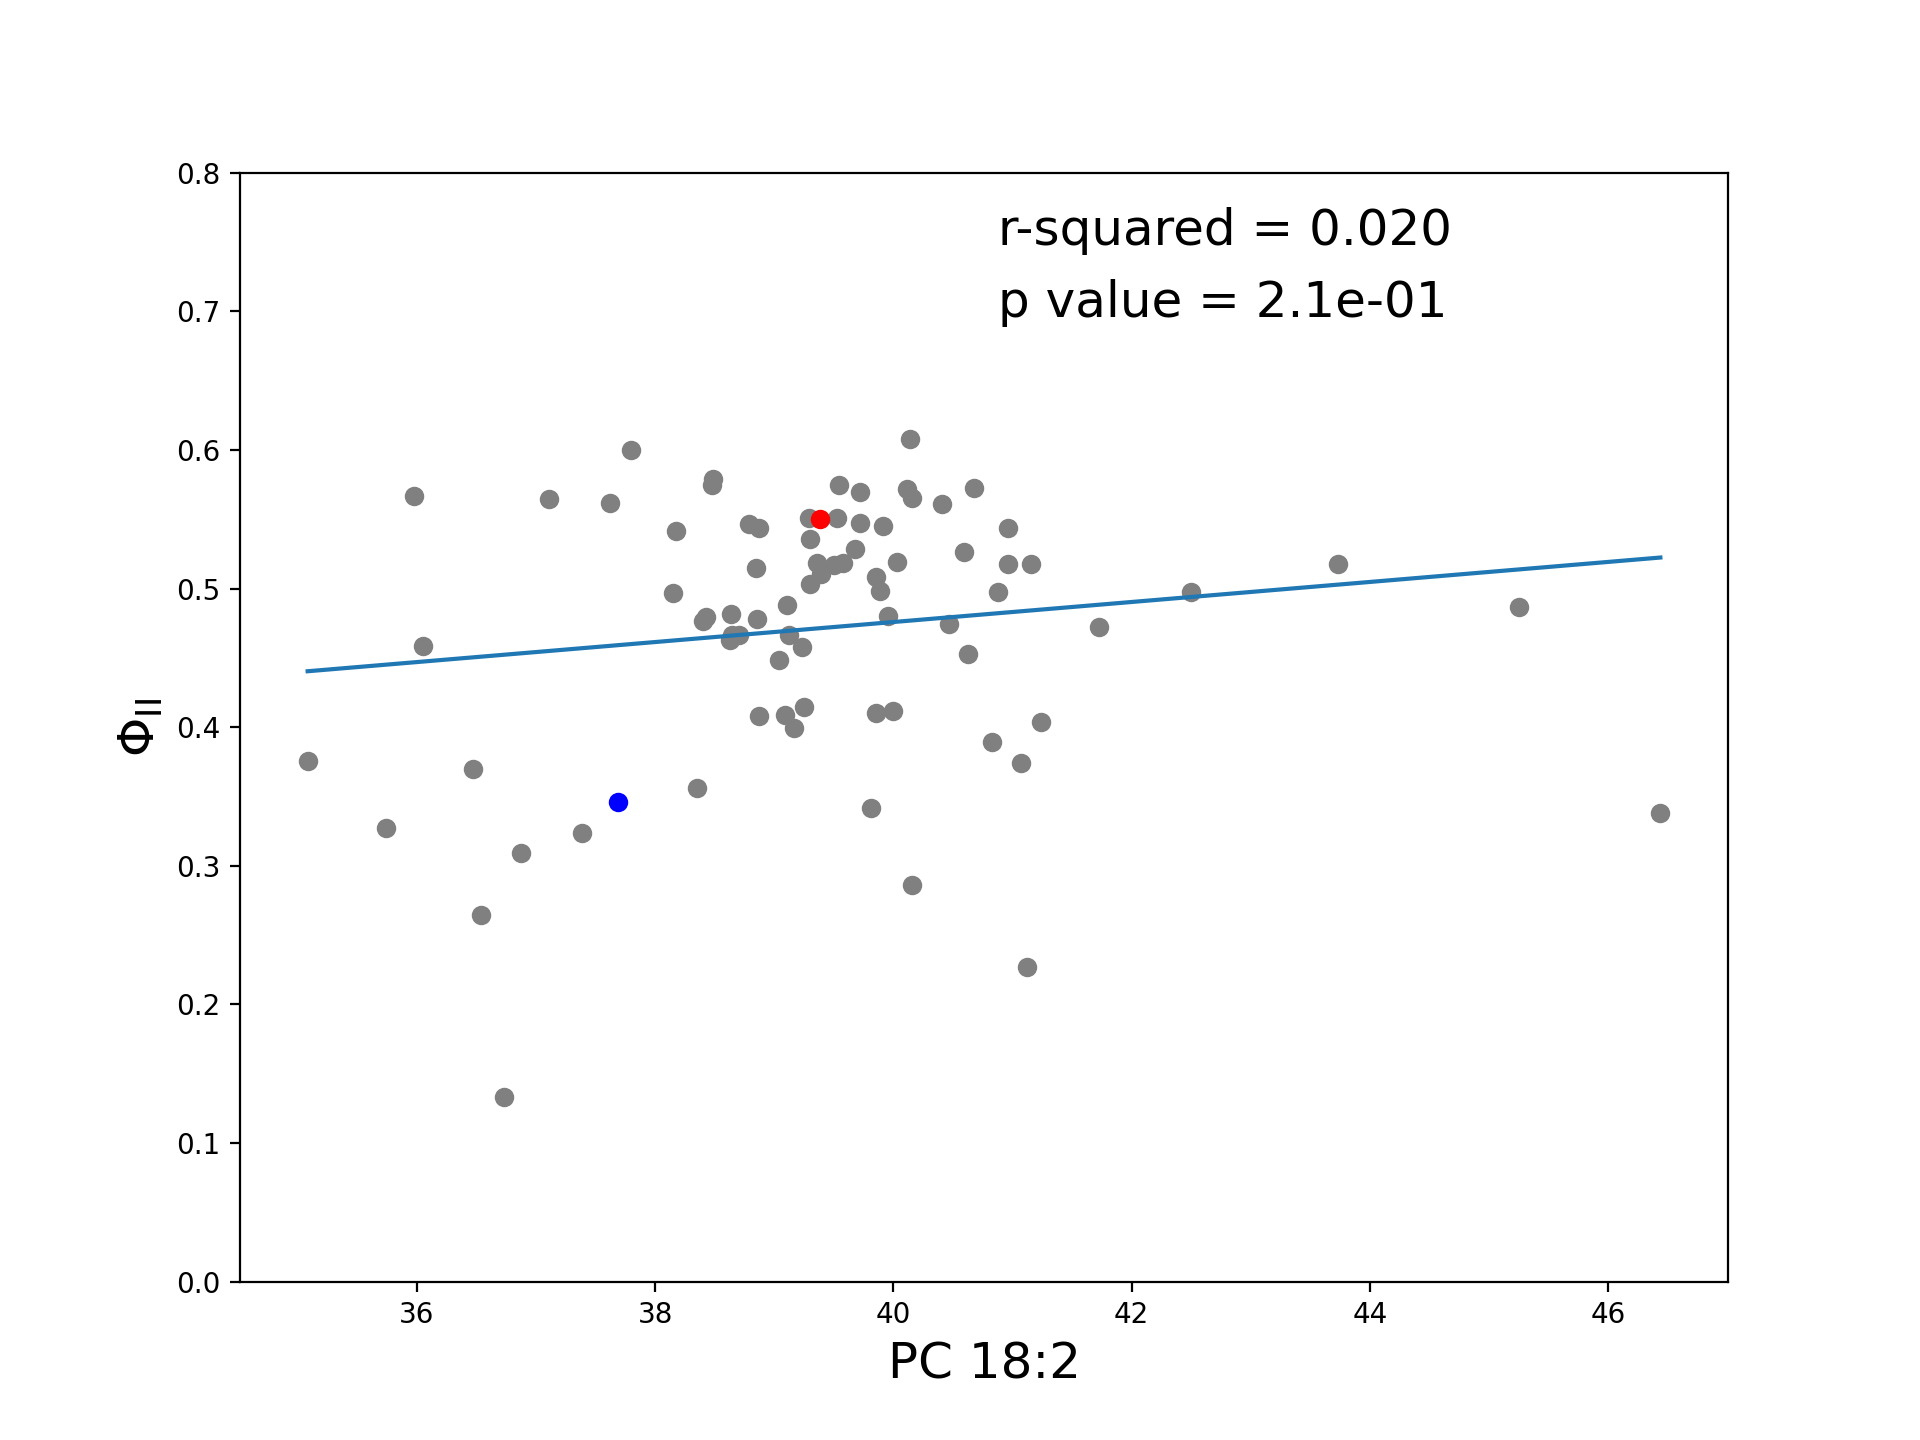

In [24]:
x_column = 'PC_18_2'
y_column = 'LT_DEPI_phi2_81'



genotype_colors = {
    "CB27": "red",
    "24-125B-1": "blue"
}

default_color = "grey"

# find which points have data
good_points = np.isfinite(df[x_column]) & np.isfinite(df[y_column])
x = df.loc[good_points,x_column]
y = df.loc[good_points,y_column]

# fit those points
slope, intercept, r_value, p_value, _ = linregress(x,y)



# show the plot
fig = plt.figure()

for row in df.index:
    geno,x,y = df.loc[row,["Genotype",x_column,y_column]]
    
    if geno in genotype_colors.keys():
        color = genotype_colors[geno]
    else:
        color = default_color
        
    plt.scatter( x, y, c=color )

line_x = np.array([df[x_column].min(), df[x_column].max()])
plt.plot( line_x, slope * line_x + intercept )
plt.xlabel("PC 18:2",size=18)
plt.ylabel("$\mathregular{Φ_{II}}$",size=18)
plt.text( .52,.83,"r-squared = {0:.3f}".format( r_value ** 2 ), transform=fig.transFigure,size=18 )
plt.text( .52,.78, "p value = {0:.1e}".format( p_value ), transform=fig.transFigure,size=18 )
plt.ylim(0,0.8)
#.13,.83
#.13,.78
plt.savefig('phi2_81_PC_18_2',dpi =600)
plt.show()





<IPython.core.display.Javascript object>


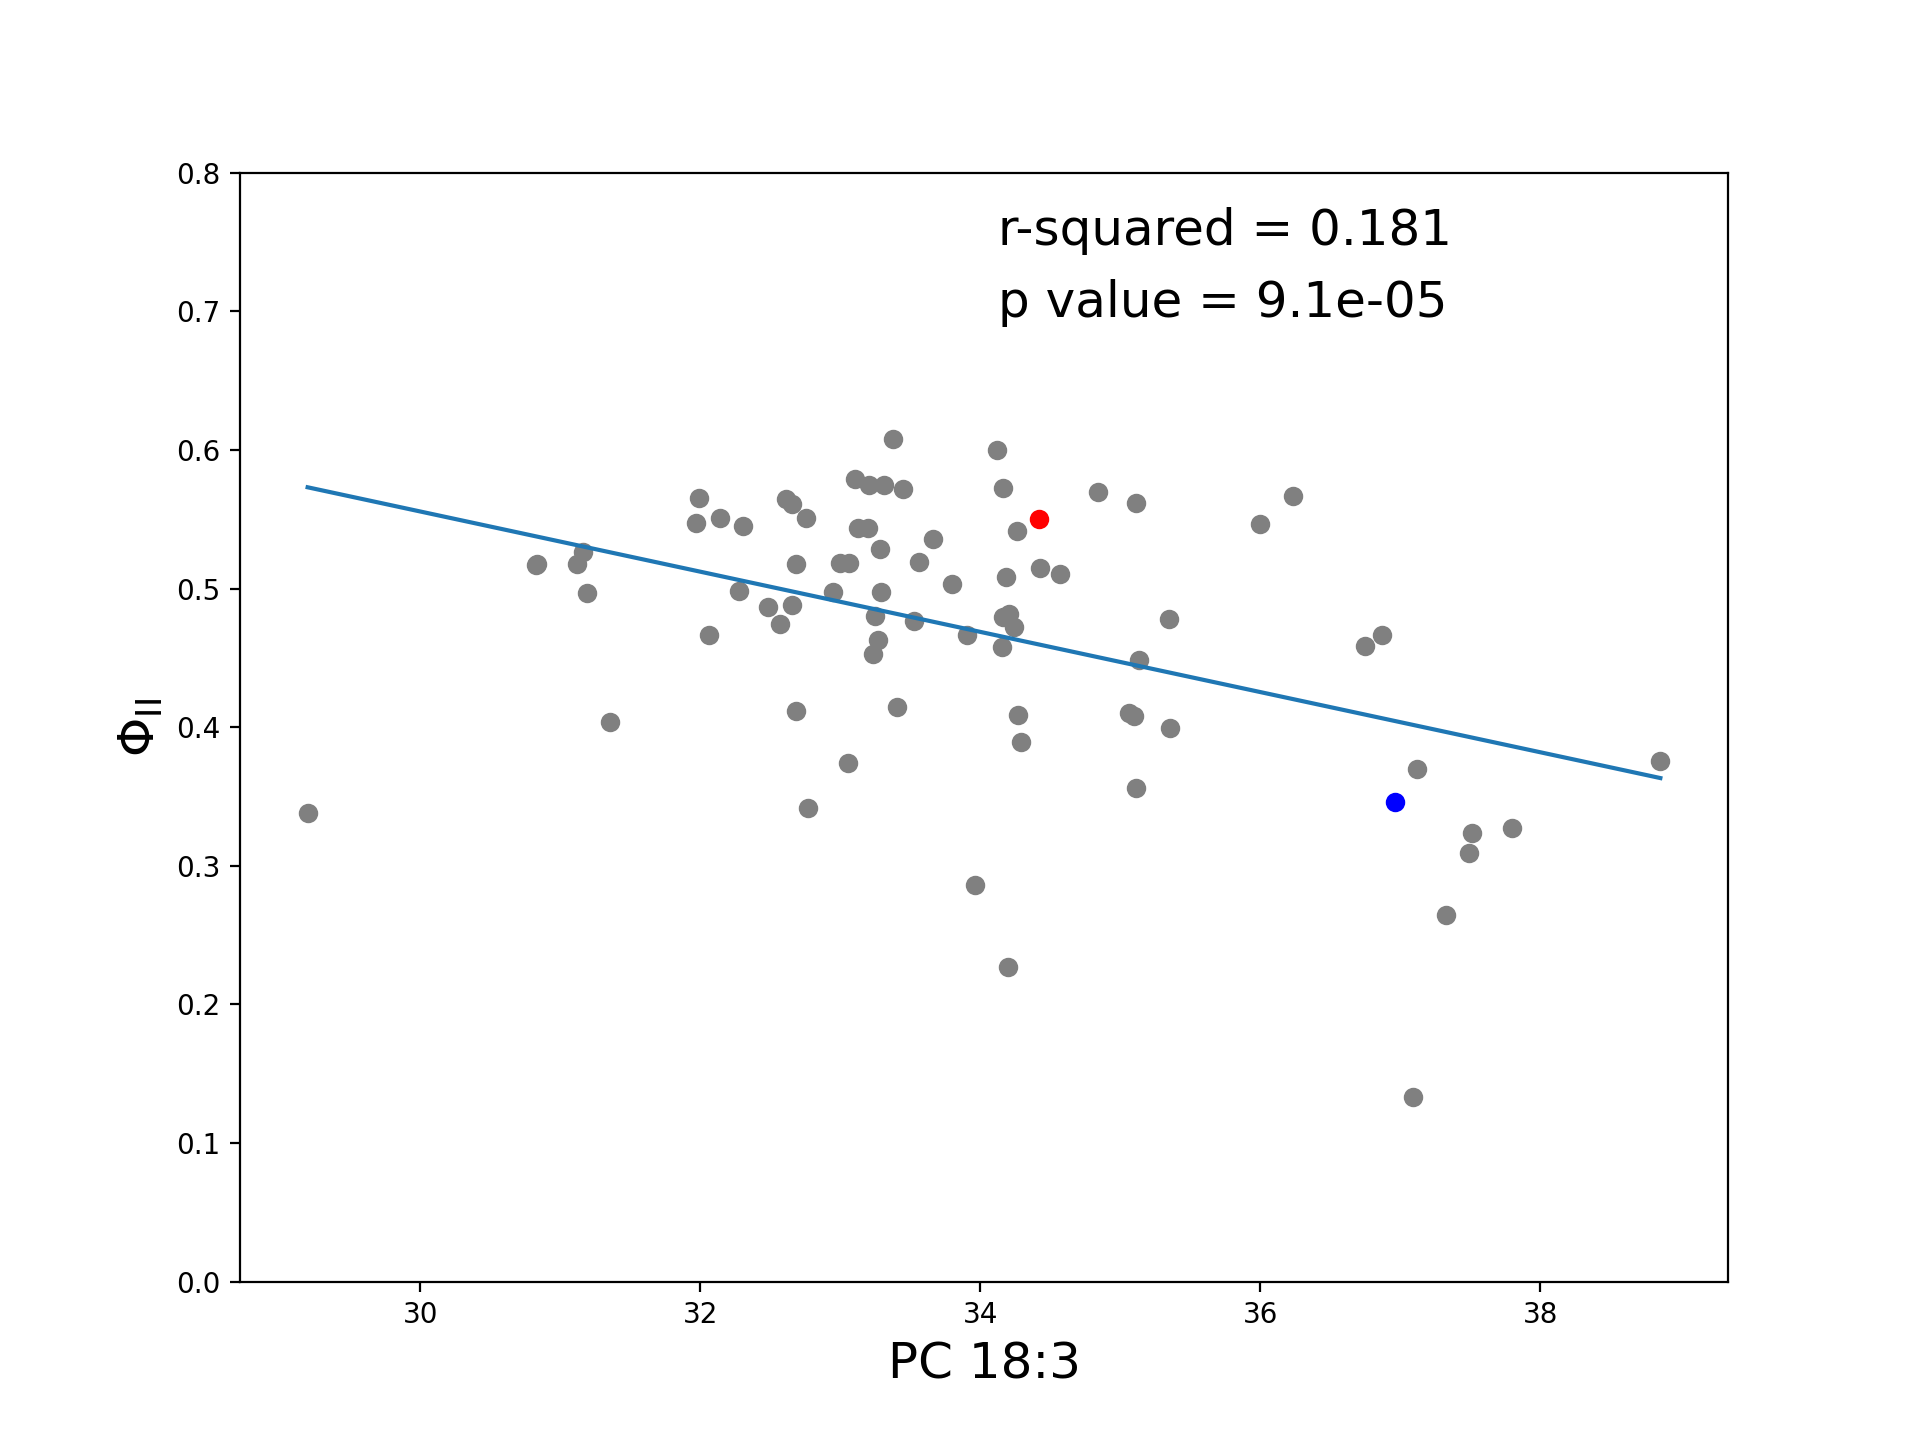

In [25]:
x_column = 'PC_18_3'
y_column = 'LT_DEPI_phi2_81'



genotype_colors = {
    "CB27": "red",
    "24-125B-1": "blue"
}

default_color = "grey"

# find which points have data
good_points = np.isfinite(df[x_column]) & np.isfinite(df[y_column])
x = df.loc[good_points,x_column]
y = df.loc[good_points,y_column]

# fit those points
slope, intercept, r_value, p_value, _ = linregress(x,y)



# show the plot
fig = plt.figure()

for row in df.index:
    geno,x,y = df.loc[row,["Genotype",x_column,y_column]]
    
    if geno in genotype_colors.keys():
        color = genotype_colors[geno]
    else:
        color = default_color
        
    plt.scatter( x, y, c=color )

line_x = np.array([df[x_column].min(), df[x_column].max()])
plt.plot( line_x, slope * line_x + intercept )
plt.xlabel("PC 18:3",size=18)
plt.ylabel("$\mathregular{Φ_{II}}$",size=18)
plt.text( .52,.83,"r-squared = {0:.3f}".format( r_value ** 2 ), transform=fig.transFigure,size=18 )
plt.text( .52,.78, "p value = {0:.1e}".format( p_value ), transform=fig.transFigure,size=18 )
plt.ylim(0,0.8)
#.13,.83
#.13,.78
plt.savefig('phi2_81_PC_18_3',dpi =600)
plt.show()






<IPython.core.display.Javascript object>


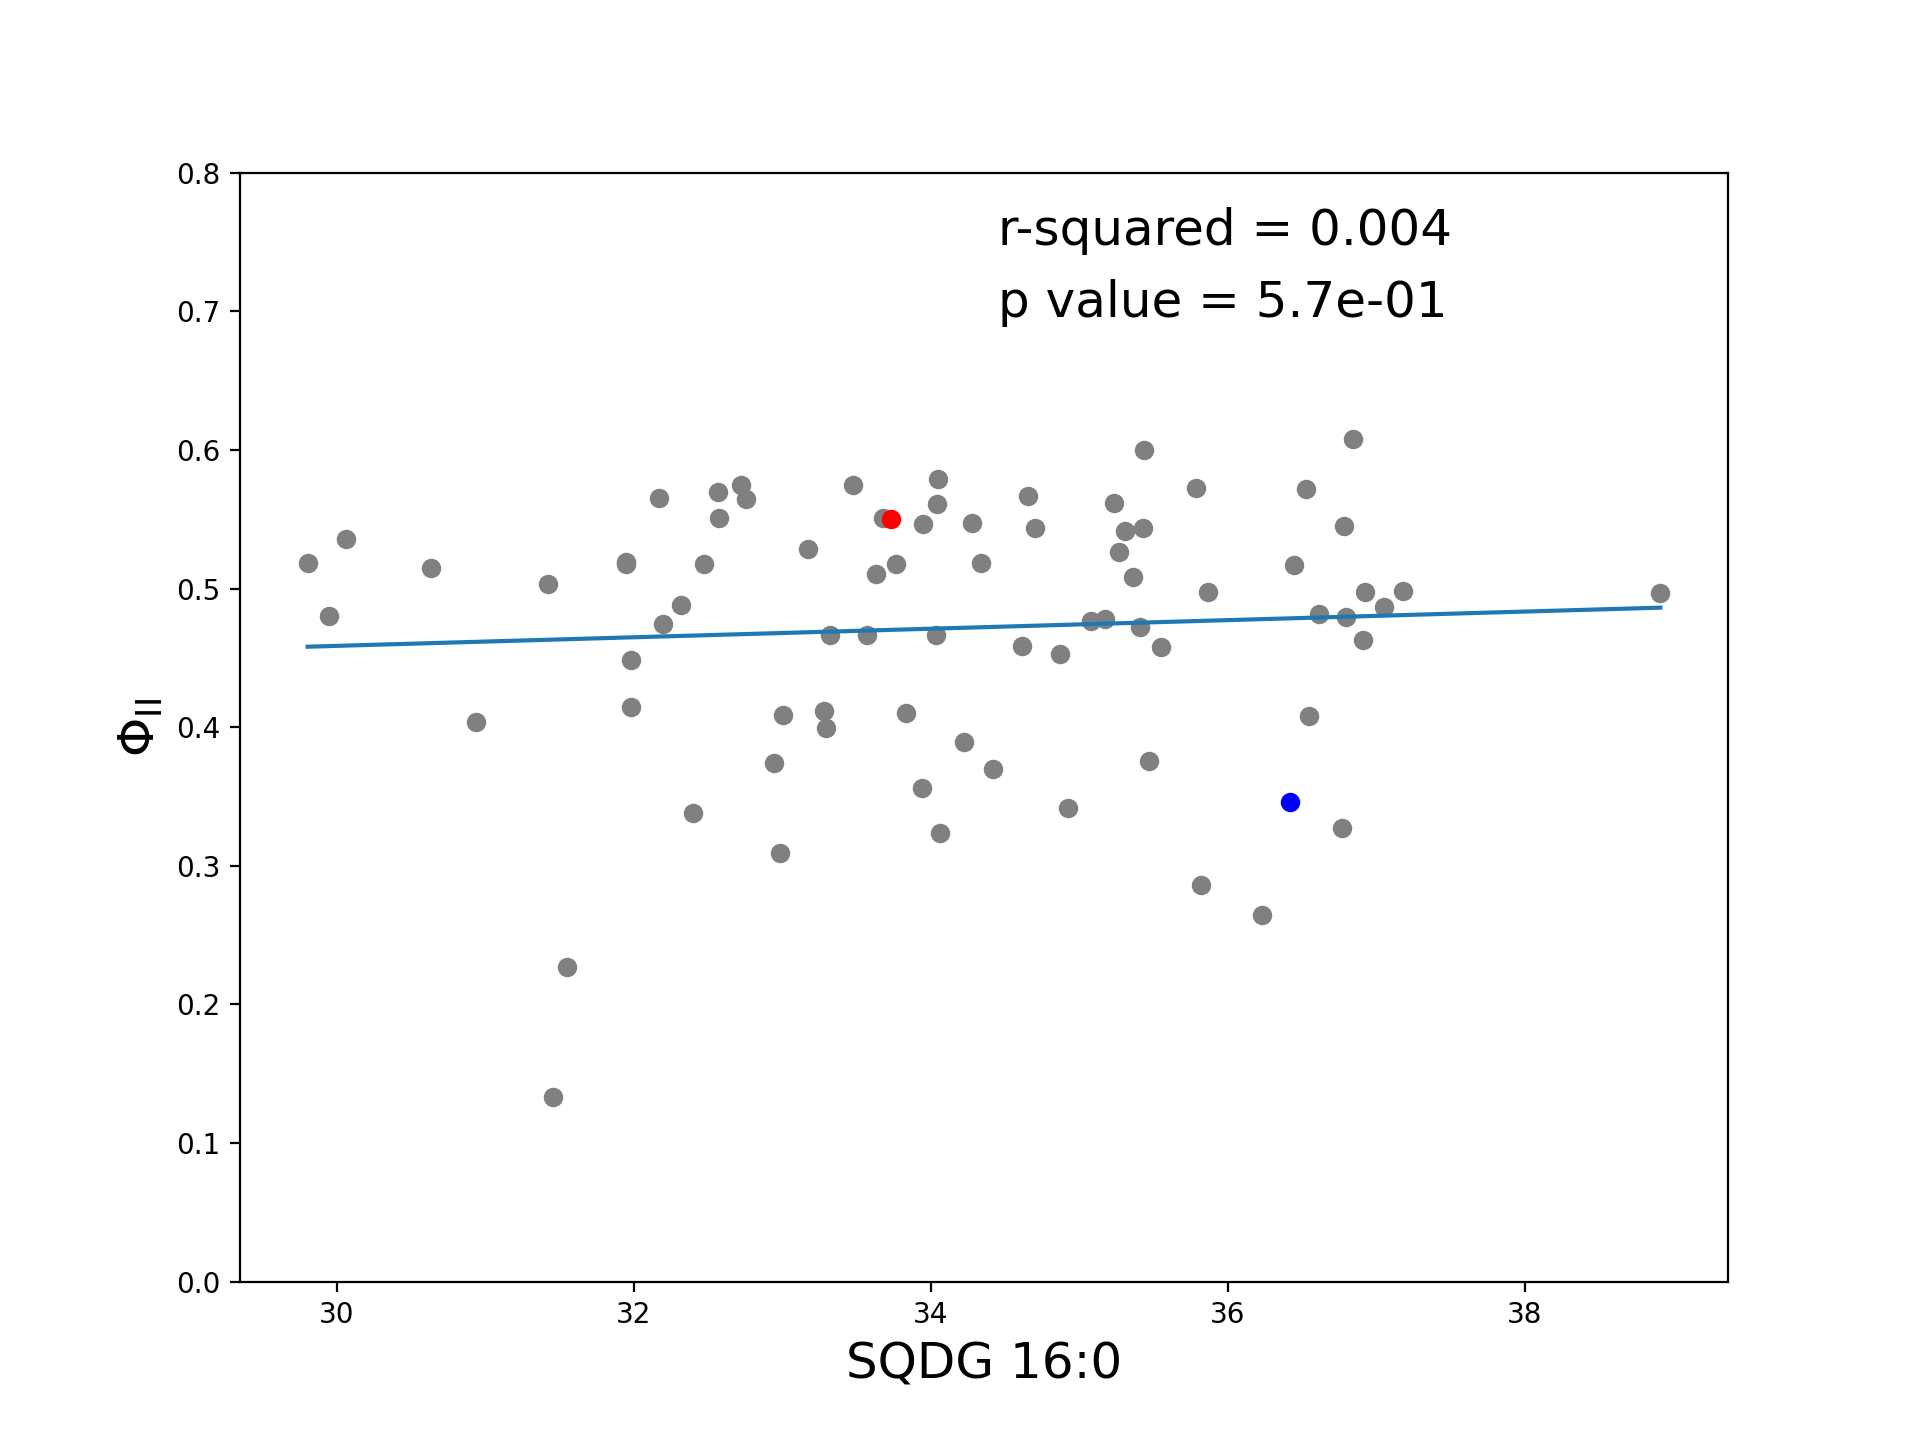

In [26]:
x_column = 'SQDG_16_0'
y_column = 'LT_DEPI_phi2_81'



genotype_colors = {
    "CB27": "red",
    "24-125B-1": "blue"
}

default_color = "grey"

# find which points have data
good_points = np.isfinite(df[x_column]) & np.isfinite(df[y_column])
x = df.loc[good_points,x_column]
y = df.loc[good_points,y_column]

# fit those points
slope, intercept, r_value, p_value, _ = linregress(x,y)



# show the plot
fig = plt.figure()

for row in df.index:
    geno,x,y = df.loc[row,["Genotype",x_column,y_column]]
    
    if geno in genotype_colors.keys():
        color = genotype_colors[geno]
    else:
        color = default_color
        
    plt.scatter( x, y, c=color )

line_x = np.array([df[x_column].min(), df[x_column].max()])
plt.plot( line_x, slope * line_x + intercept )
plt.xlabel("SQDG 16:0",size=18)
plt.ylabel("$\mathregular{Φ_{II}}$",size=18)
plt.text( .52,.83,"r-squared = {0:.3f}".format( r_value ** 2 ), transform=fig.transFigure,size=18 )
plt.text( .52,.78, "p value = {0:.1e}".format( p_value ), transform=fig.transFigure,size=18 )
plt.ylim(0,0.8)
#.13,.83
#.13,.78
plt.savefig('phi2_81_SQDG_16_0',dpi =600)
plt.show()



<IPython.core.display.Javascript object>


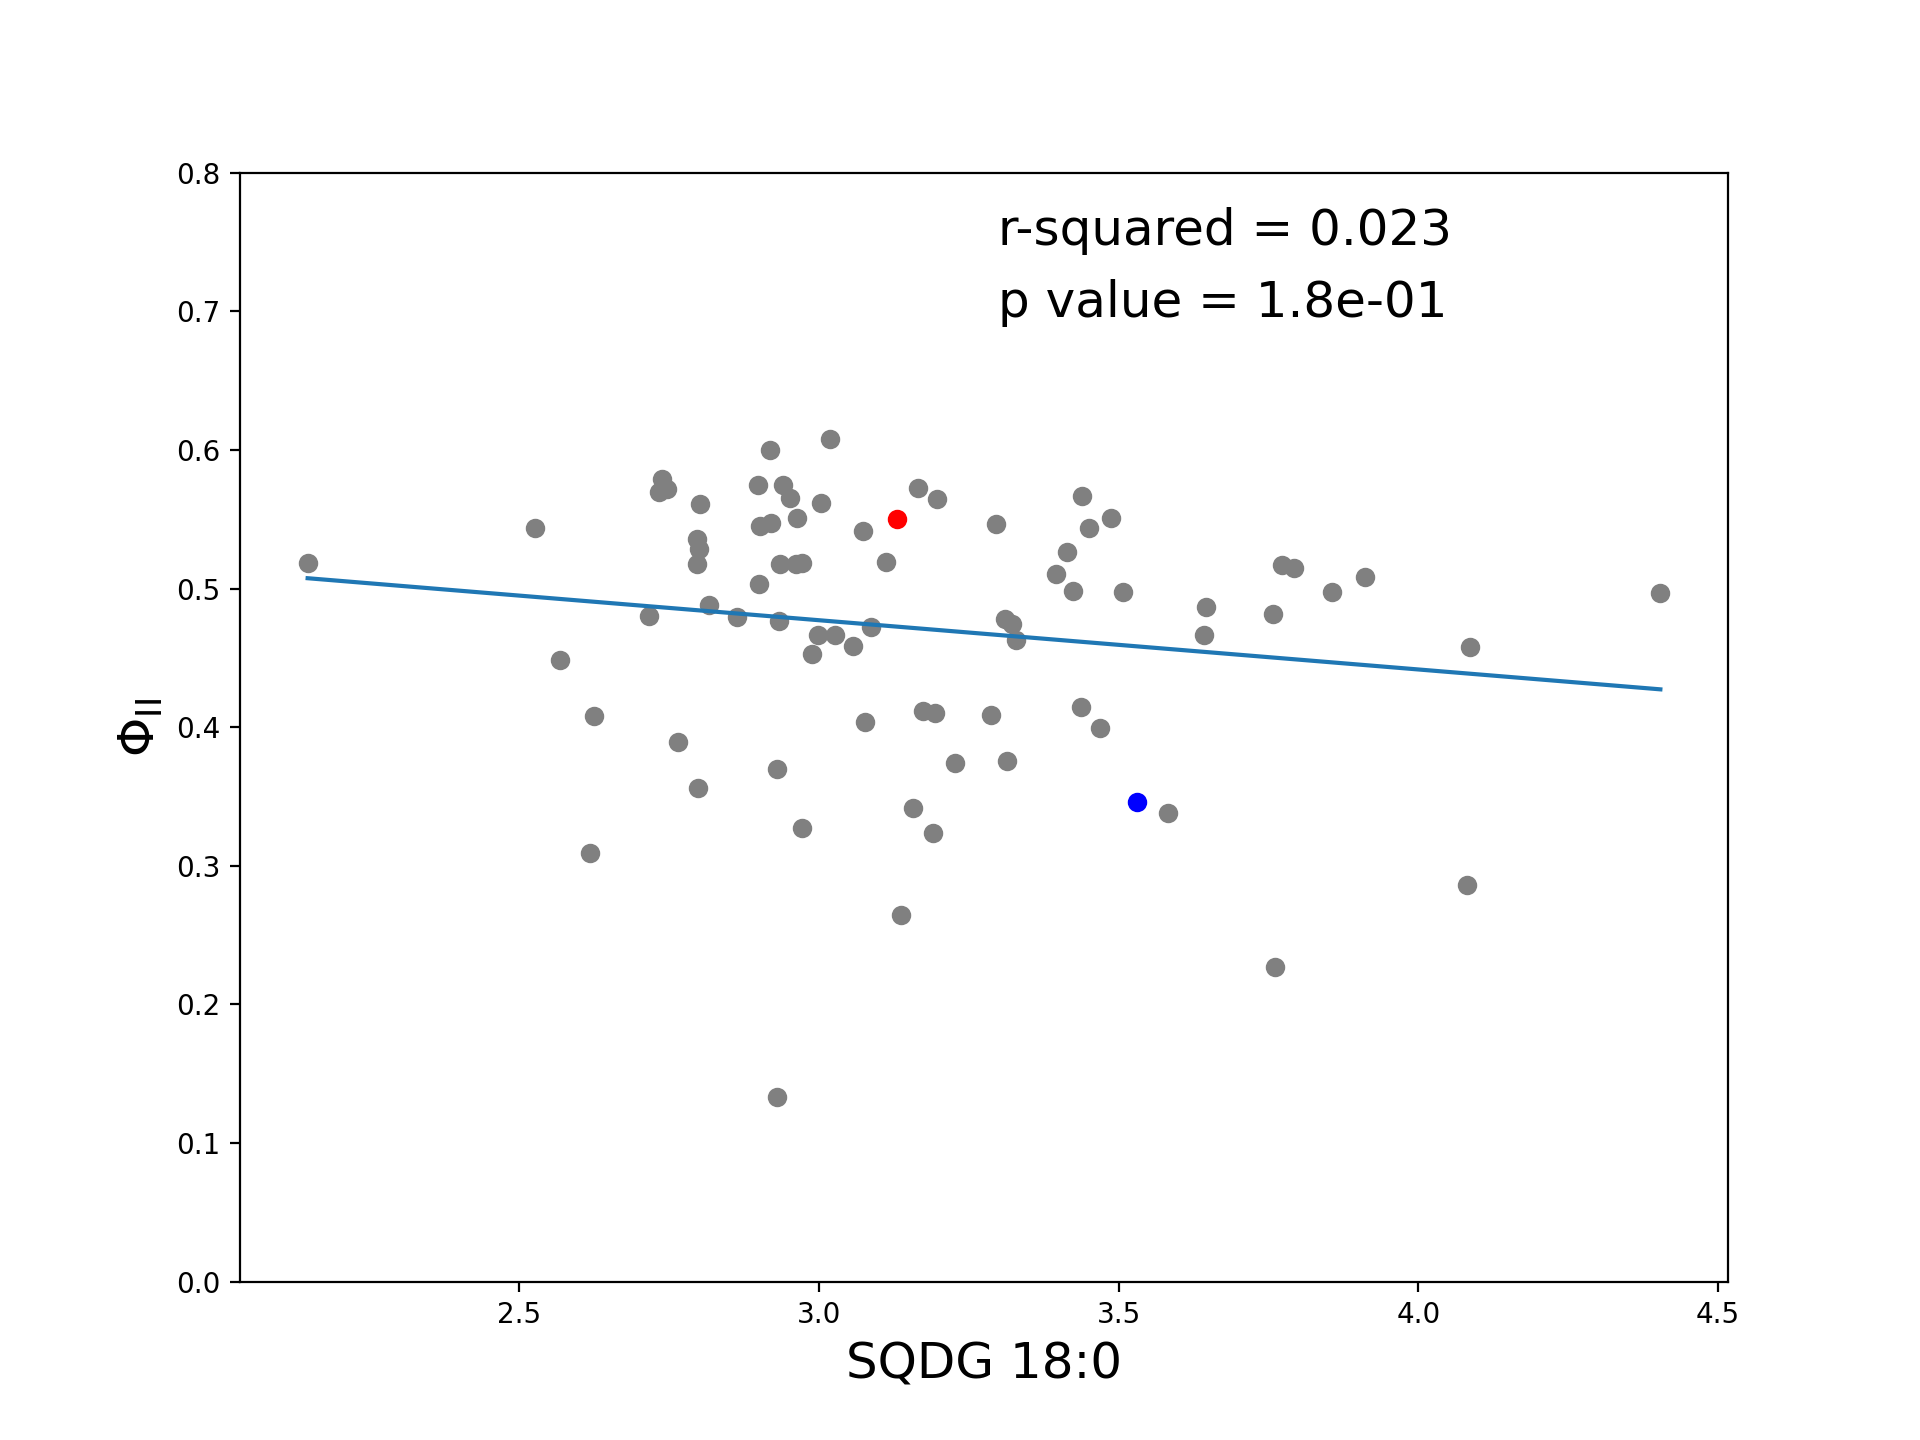

In [27]:
x_column = 'SQDG_18_0'
y_column = 'LT_DEPI_phi2_81'



genotype_colors = {
    "CB27": "red",
    "24-125B-1": "blue"
}

default_color = "grey"

# find which points have data
good_points = np.isfinite(df[x_column]) & np.isfinite(df[y_column])
x = df.loc[good_points,x_column]
y = df.loc[good_points,y_column]

# fit those points
slope, intercept, r_value, p_value, _ = linregress(x,y)



# show the plot
fig = plt.figure()

for row in df.index:
    geno,x,y = df.loc[row,["Genotype",x_column,y_column]]
    
    if geno in genotype_colors.keys():
        color = genotype_colors[geno]
    else:
        color = default_color
        
    plt.scatter( x, y, c=color )

line_x = np.array([df[x_column].min(), df[x_column].max()])
plt.plot( line_x, slope * line_x + intercept )
plt.xlabel("SQDG 18:0",size=18)
plt.ylabel("$\mathregular{Φ_{II}}$",size=18)
plt.text( .52,.83,"r-squared = {0:.3f}".format( r_value ** 2 ), transform=fig.transFigure,size=18 )
plt.text( .52,.78, "p value = {0:.1e}".format( p_value ), transform=fig.transFigure,size=18 )
plt.ylim(0,0.8)
#.13,.83
#.13,.78
plt.savefig('phi2_81_SQDG_18_0',dpi =600)
plt.show()



<IPython.core.display.Javascript object>


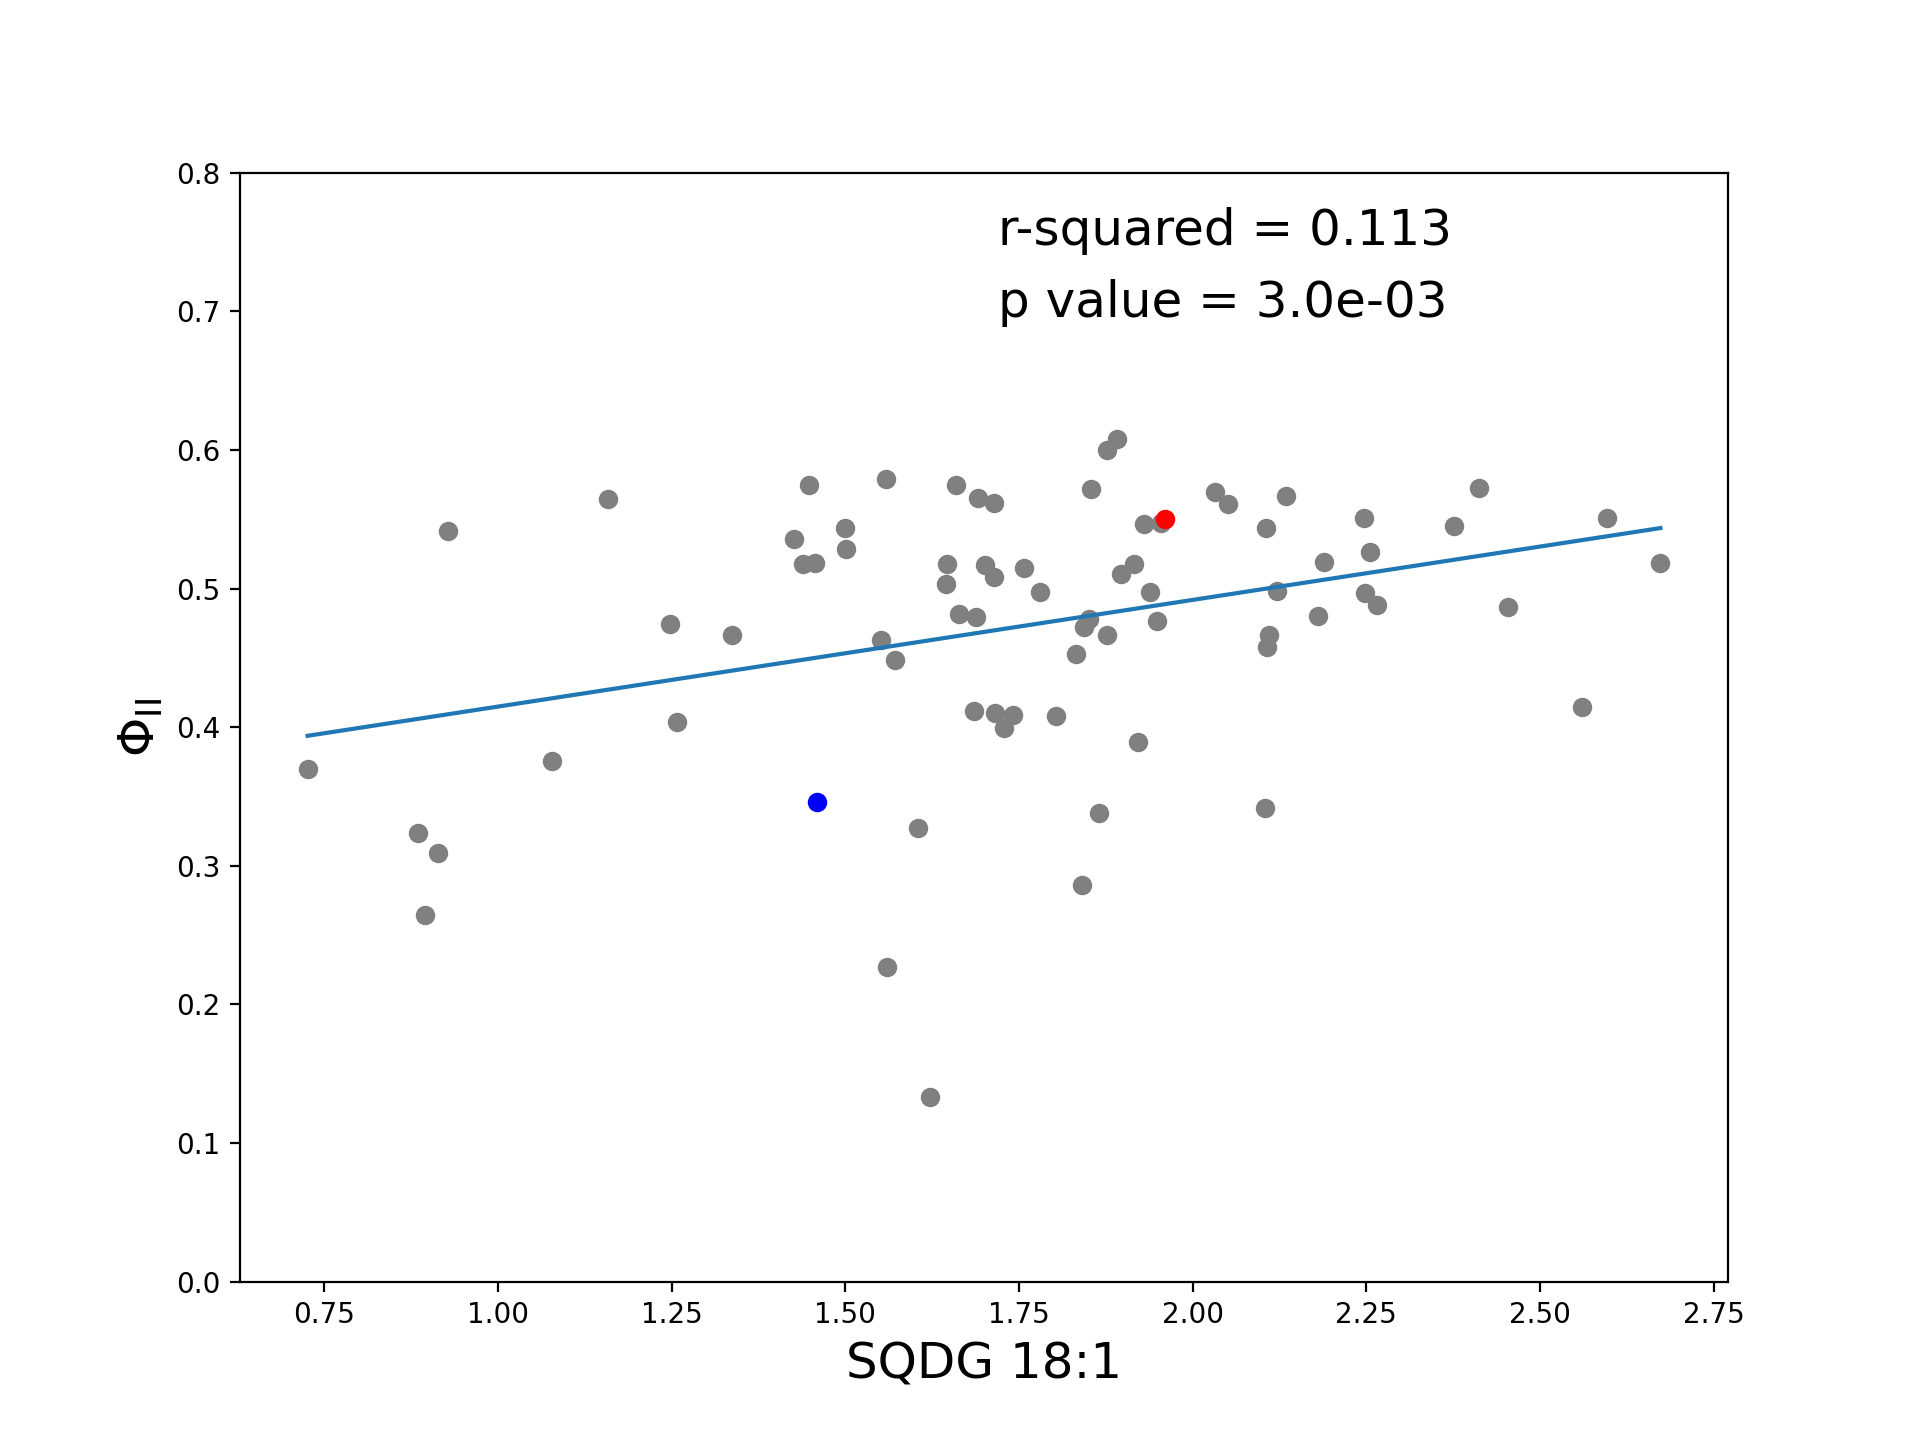

In [28]:
x_column = 'SQDG_18_1'
y_column = 'LT_DEPI_phi2_81'



genotype_colors = {
    "CB27": "red",
    "24-125B-1": "blue"
}

default_color = "grey"

# find which points have data
good_points = np.isfinite(df[x_column]) & np.isfinite(df[y_column])
x = df.loc[good_points,x_column]
y = df.loc[good_points,y_column]

# fit those points
slope, intercept, r_value, p_value, _ = linregress(x,y)



# show the plot
fig = plt.figure()

for row in df.index:
    geno,x,y = df.loc[row,["Genotype",x_column,y_column]]
    
    if geno in genotype_colors.keys():
        color = genotype_colors[geno]
    else:
        color = default_color
        
    plt.scatter( x, y, c=color )

line_x = np.array([df[x_column].min(), df[x_column].max()])
plt.plot( line_x, slope * line_x + intercept )
plt.xlabel("SQDG 18:1",size=18)
plt.ylabel("$\mathregular{Φ_{II}}$",size=18)
plt.text( .52,.83,"r-squared = {0:.3f}".format( r_value ** 2 ), transform=fig.transFigure,size=18 )
plt.text( .52,.78, "p value = {0:.1e}".format( p_value ), transform=fig.transFigure,size=18 )
plt.ylim(0,0.8)
#.13,.83
#.13,.78
plt.savefig('phi2_81_SQDG_18_1',dpi =600)
plt.show()




<ipython-input-29-aca7adbc4c32>:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<IPython.core.display.Javascript object>


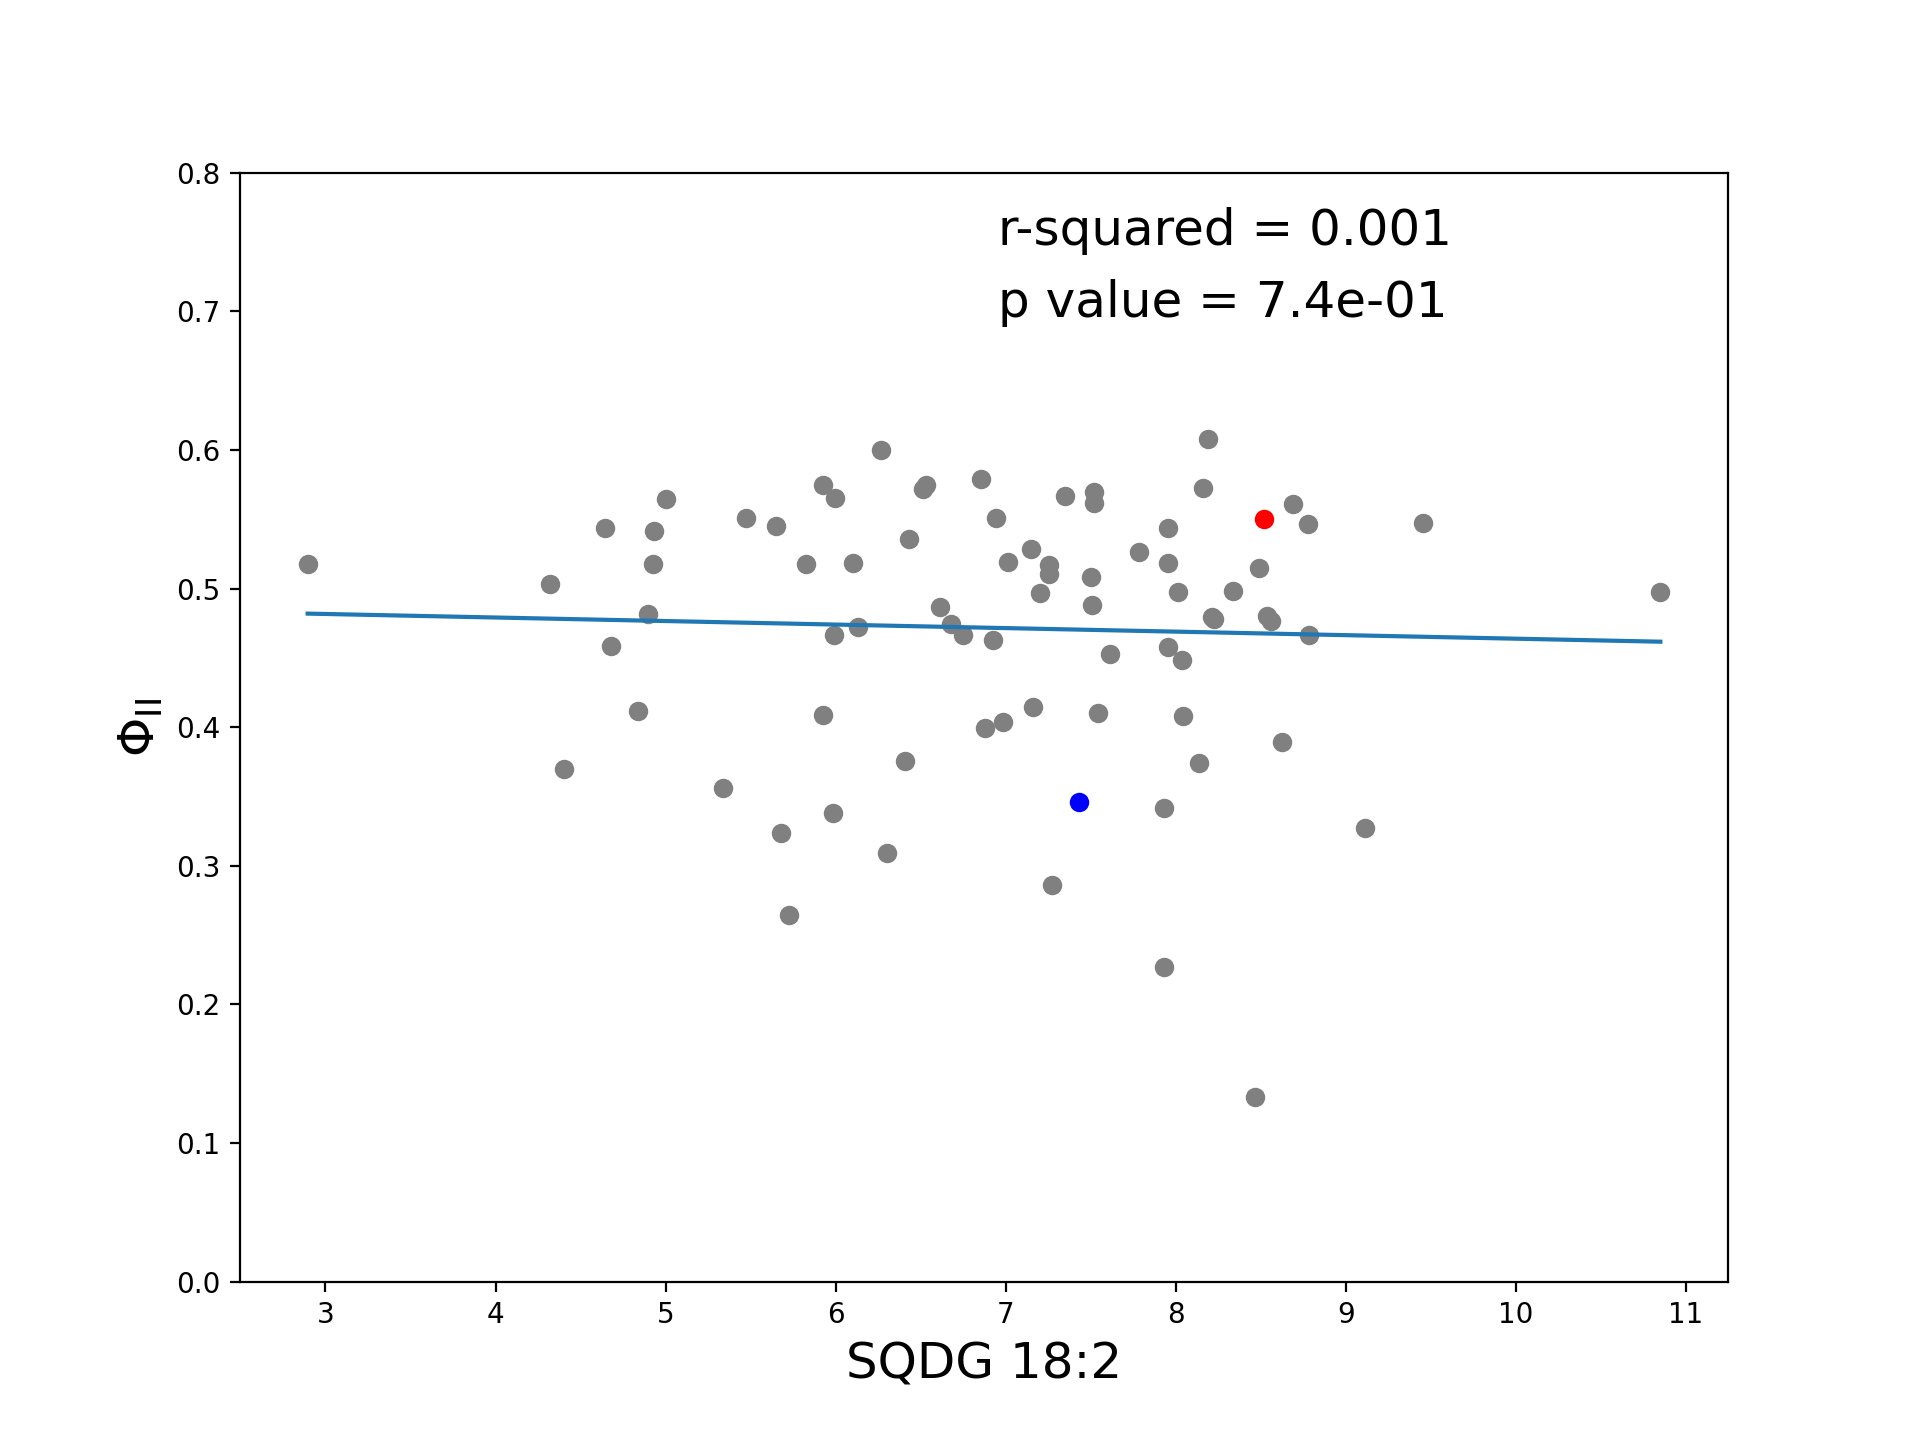

In [29]:
x_column = 'SQDG_18_2'
y_column = 'LT_DEPI_phi2_81'



genotype_colors = {
    "CB27": "red",
    "24-125B-1": "blue"
}

default_color = "grey"

# find which points have data
good_points = np.isfinite(df[x_column]) & np.isfinite(df[y_column])
x = df.loc[good_points,x_column]
y = df.loc[good_points,y_column]

# fit those points
slope, intercept, r_value, p_value, _ = linregress(x,y)



# show the plot
fig = plt.figure()

for row in df.index:
    geno,x,y = df.loc[row,["Genotype",x_column,y_column]]
    
    if geno in genotype_colors.keys():
        color = genotype_colors[geno]
    else:
        color = default_color
        
    plt.scatter( x, y, c=color )

line_x = np.array([df[x_column].min(), df[x_column].max()])
plt.plot( line_x, slope * line_x + intercept )
plt.xlabel("SQDG 18:2",size=18)
plt.ylabel("$\mathregular{Φ_{II}}$",size=18)
plt.text( .52,.83,"r-squared = {0:.3f}".format( r_value ** 2 ), transform=fig.transFigure,size=18 )
plt.text( .52,.78, "p value = {0:.1e}".format( p_value ), transform=fig.transFigure,size=18 )
plt.ylim(0,0.8)
#.13,.83
#.13,.78
plt.savefig('phi2_81_SQDG_18_2',dpi =600)
plt.show()





<IPython.core.display.Javascript object>


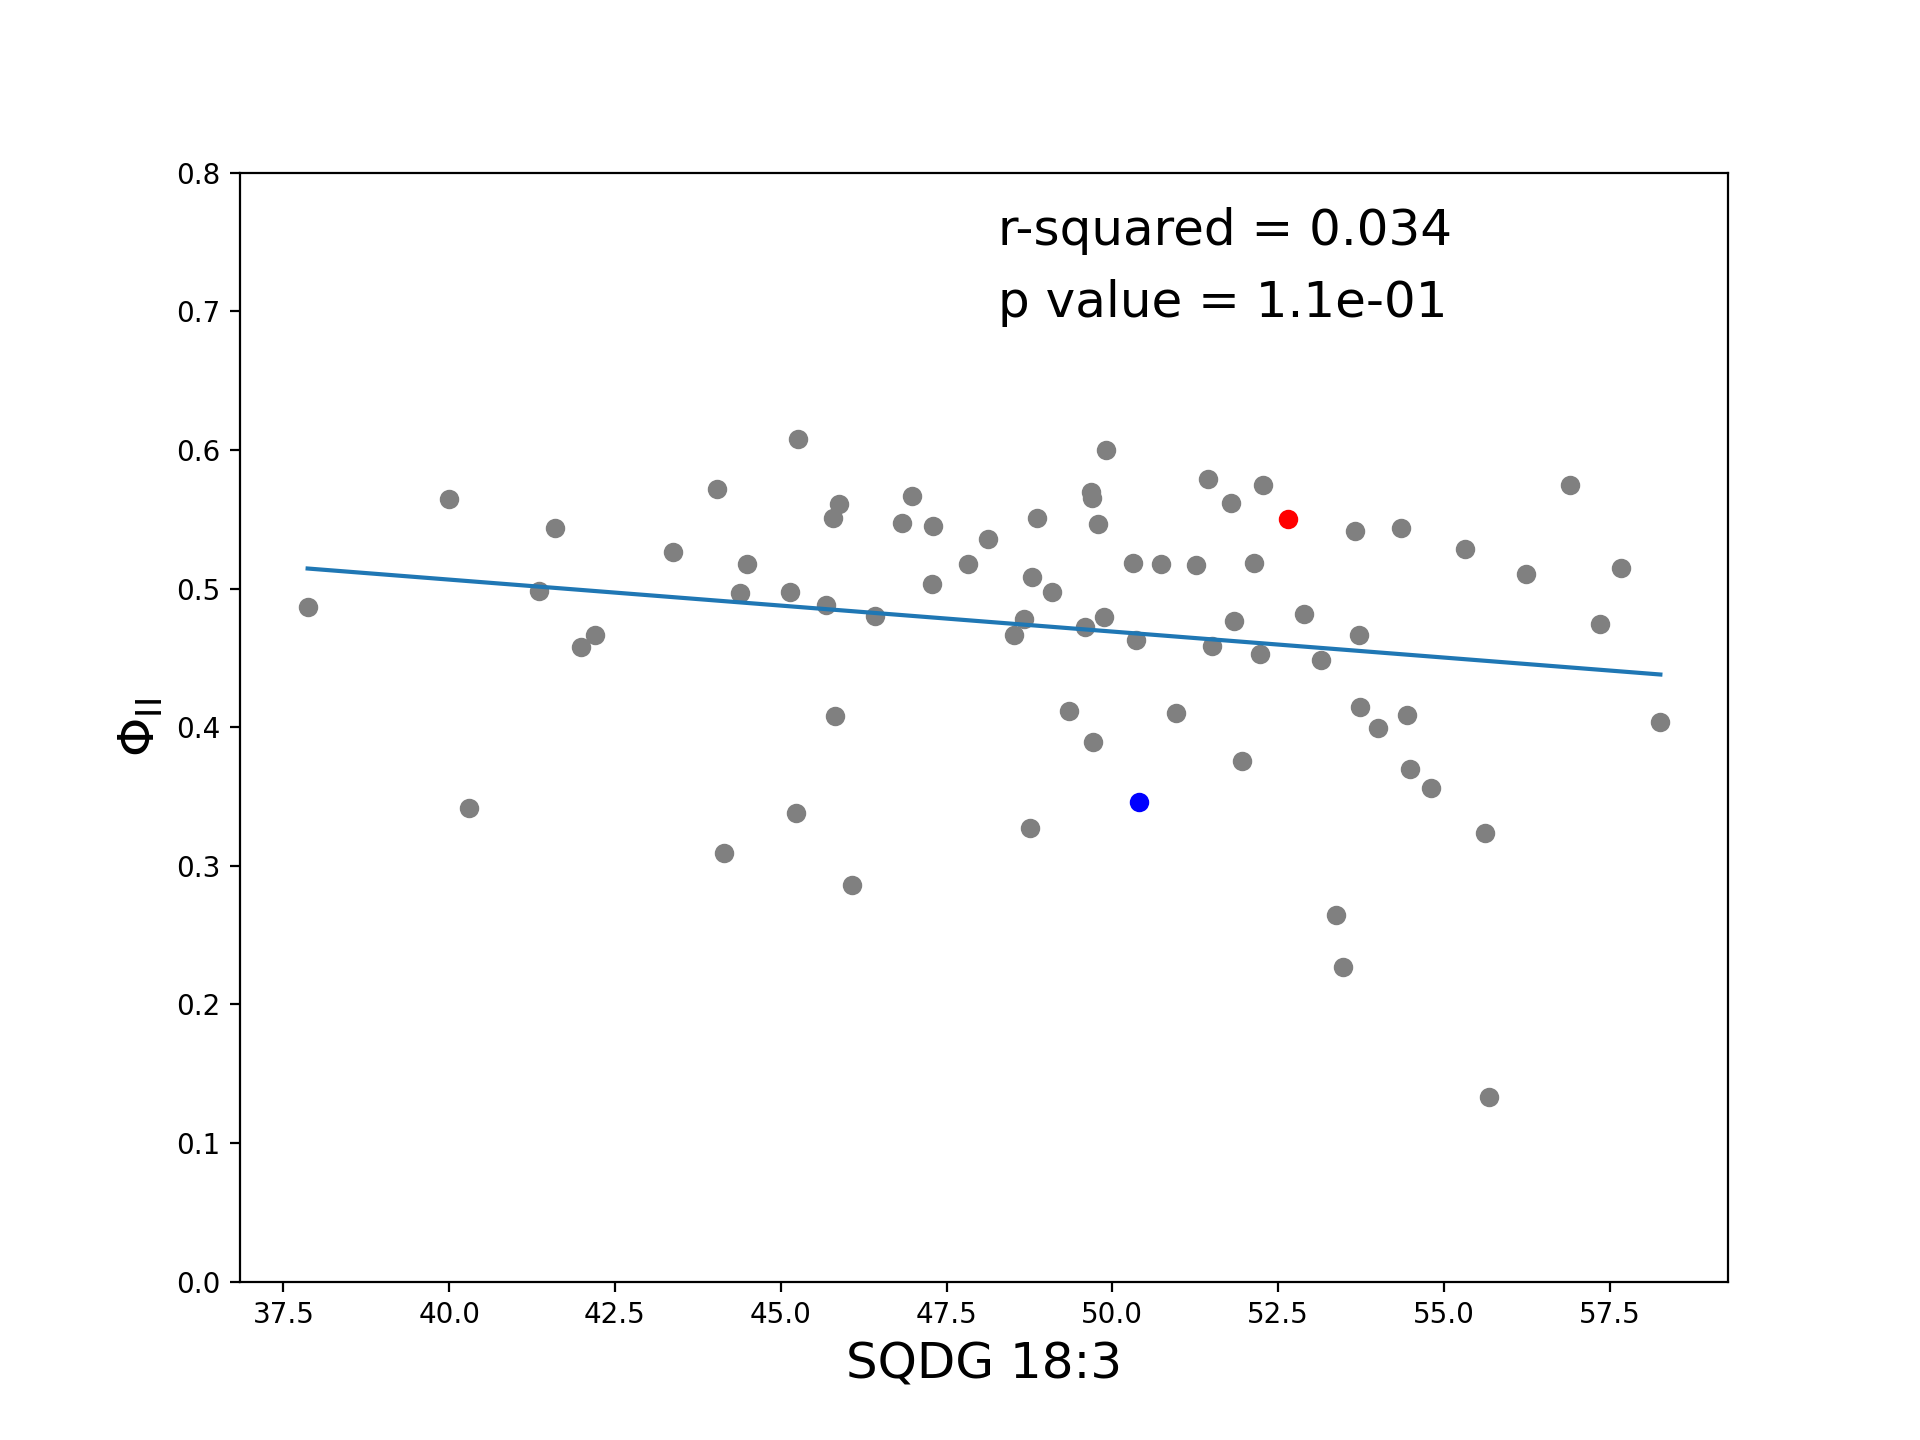

In [30]:
x_column = 'SQDG_18_3'
y_column = 'LT_DEPI_phi2_81'



genotype_colors = {
    "CB27": "red",
    "24-125B-1": "blue"
}

default_color = "grey"

# find which points have data
good_points = np.isfinite(df[x_column]) & np.isfinite(df[y_column])
x = df.loc[good_points,x_column]
y = df.loc[good_points,y_column]

# fit those points
slope, intercept, r_value, p_value, _ = linregress(x,y)



# show the plot
fig = plt.figure()

for row in df.index:
    geno,x,y = df.loc[row,["Genotype",x_column,y_column]]
    
    if geno in genotype_colors.keys():
        color = genotype_colors[geno]
    else:
        color = default_color
        
    plt.scatter( x, y, c=color )

line_x = np.array([df[x_column].min(), df[x_column].max()])
plt.plot( line_x, slope * line_x + intercept )
plt.xlabel("SQDG 18:3",size=18)
plt.ylabel("$\mathregular{Φ_{II}}$",size=18)
plt.text( .52,.83,"r-squared = {0:.3f}".format( r_value ** 2 ), transform=fig.transFigure,size=18 )
plt.text( .52,.78, "p value = {0:.1e}".format( p_value ), transform=fig.transFigure,size=18 )
plt.ylim(0,0.8)
#.13,.83
#.13,.78
plt.savefig('phi2_81_SQDG_18_3',dpi =600)
plt.show()





<IPython.core.display.Javascript object>


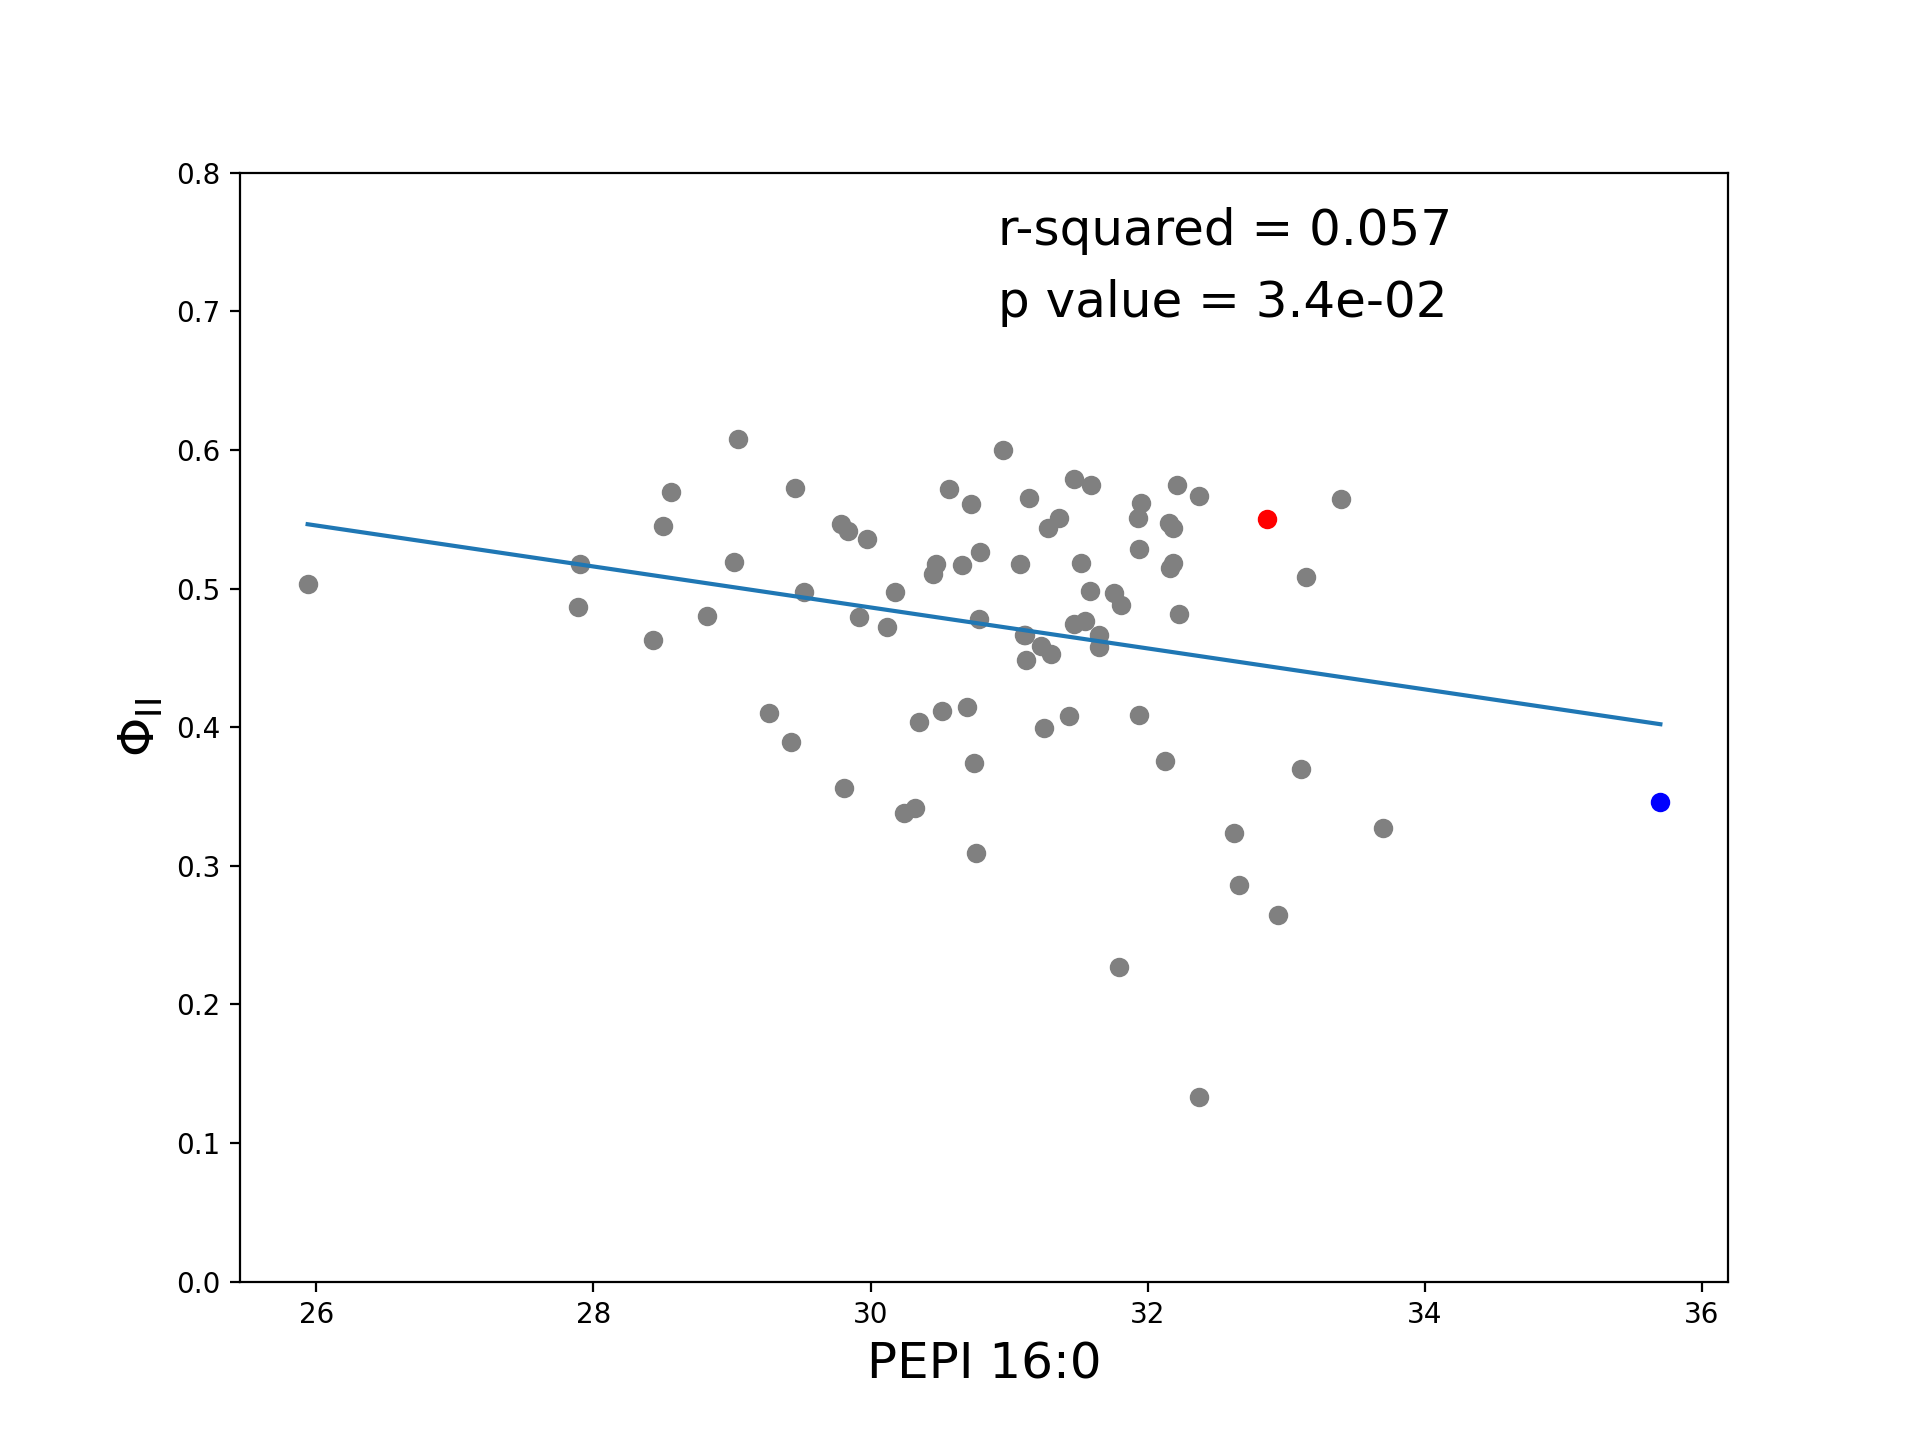

In [31]:
x_column = 'PEPI_16_0'
y_column = 'LT_DEPI_phi2_81'



genotype_colors = {
    "CB27": "red",
    "24-125B-1": "blue"
}

default_color = "grey"

# find which points have data
good_points = np.isfinite(df[x_column]) & np.isfinite(df[y_column])
x = df.loc[good_points,x_column]
y = df.loc[good_points,y_column]

# fit those points
slope, intercept, r_value, p_value, _ = linregress(x,y)



# show the plot
fig = plt.figure()

for row in df.index:
    geno,x,y = df.loc[row,["Genotype",x_column,y_column]]
    
    if geno in genotype_colors.keys():
        color = genotype_colors[geno]
    else:
        color = default_color
        
    plt.scatter( x, y, c=color )

line_x = np.array([df[x_column].min(), df[x_column].max()])
plt.plot( line_x, slope * line_x + intercept )
plt.xlabel("PEPI 16:0",size=18)
plt.ylabel("$\mathregular{Φ_{II}}$",size=18)
plt.text( .52,.83,"r-squared = {0:.3f}".format( r_value ** 2 ), transform=fig.transFigure,size=18 )
plt.text( .52,.78, "p value = {0:.1e}".format( p_value ), transform=fig.transFigure,size=18 )
plt.ylim(0,0.8)
#.13,.83
#.13,.78
plt.savefig('phi2_81_PEPI_16_0',dpi =600)
plt.show()





<IPython.core.display.Javascript object>


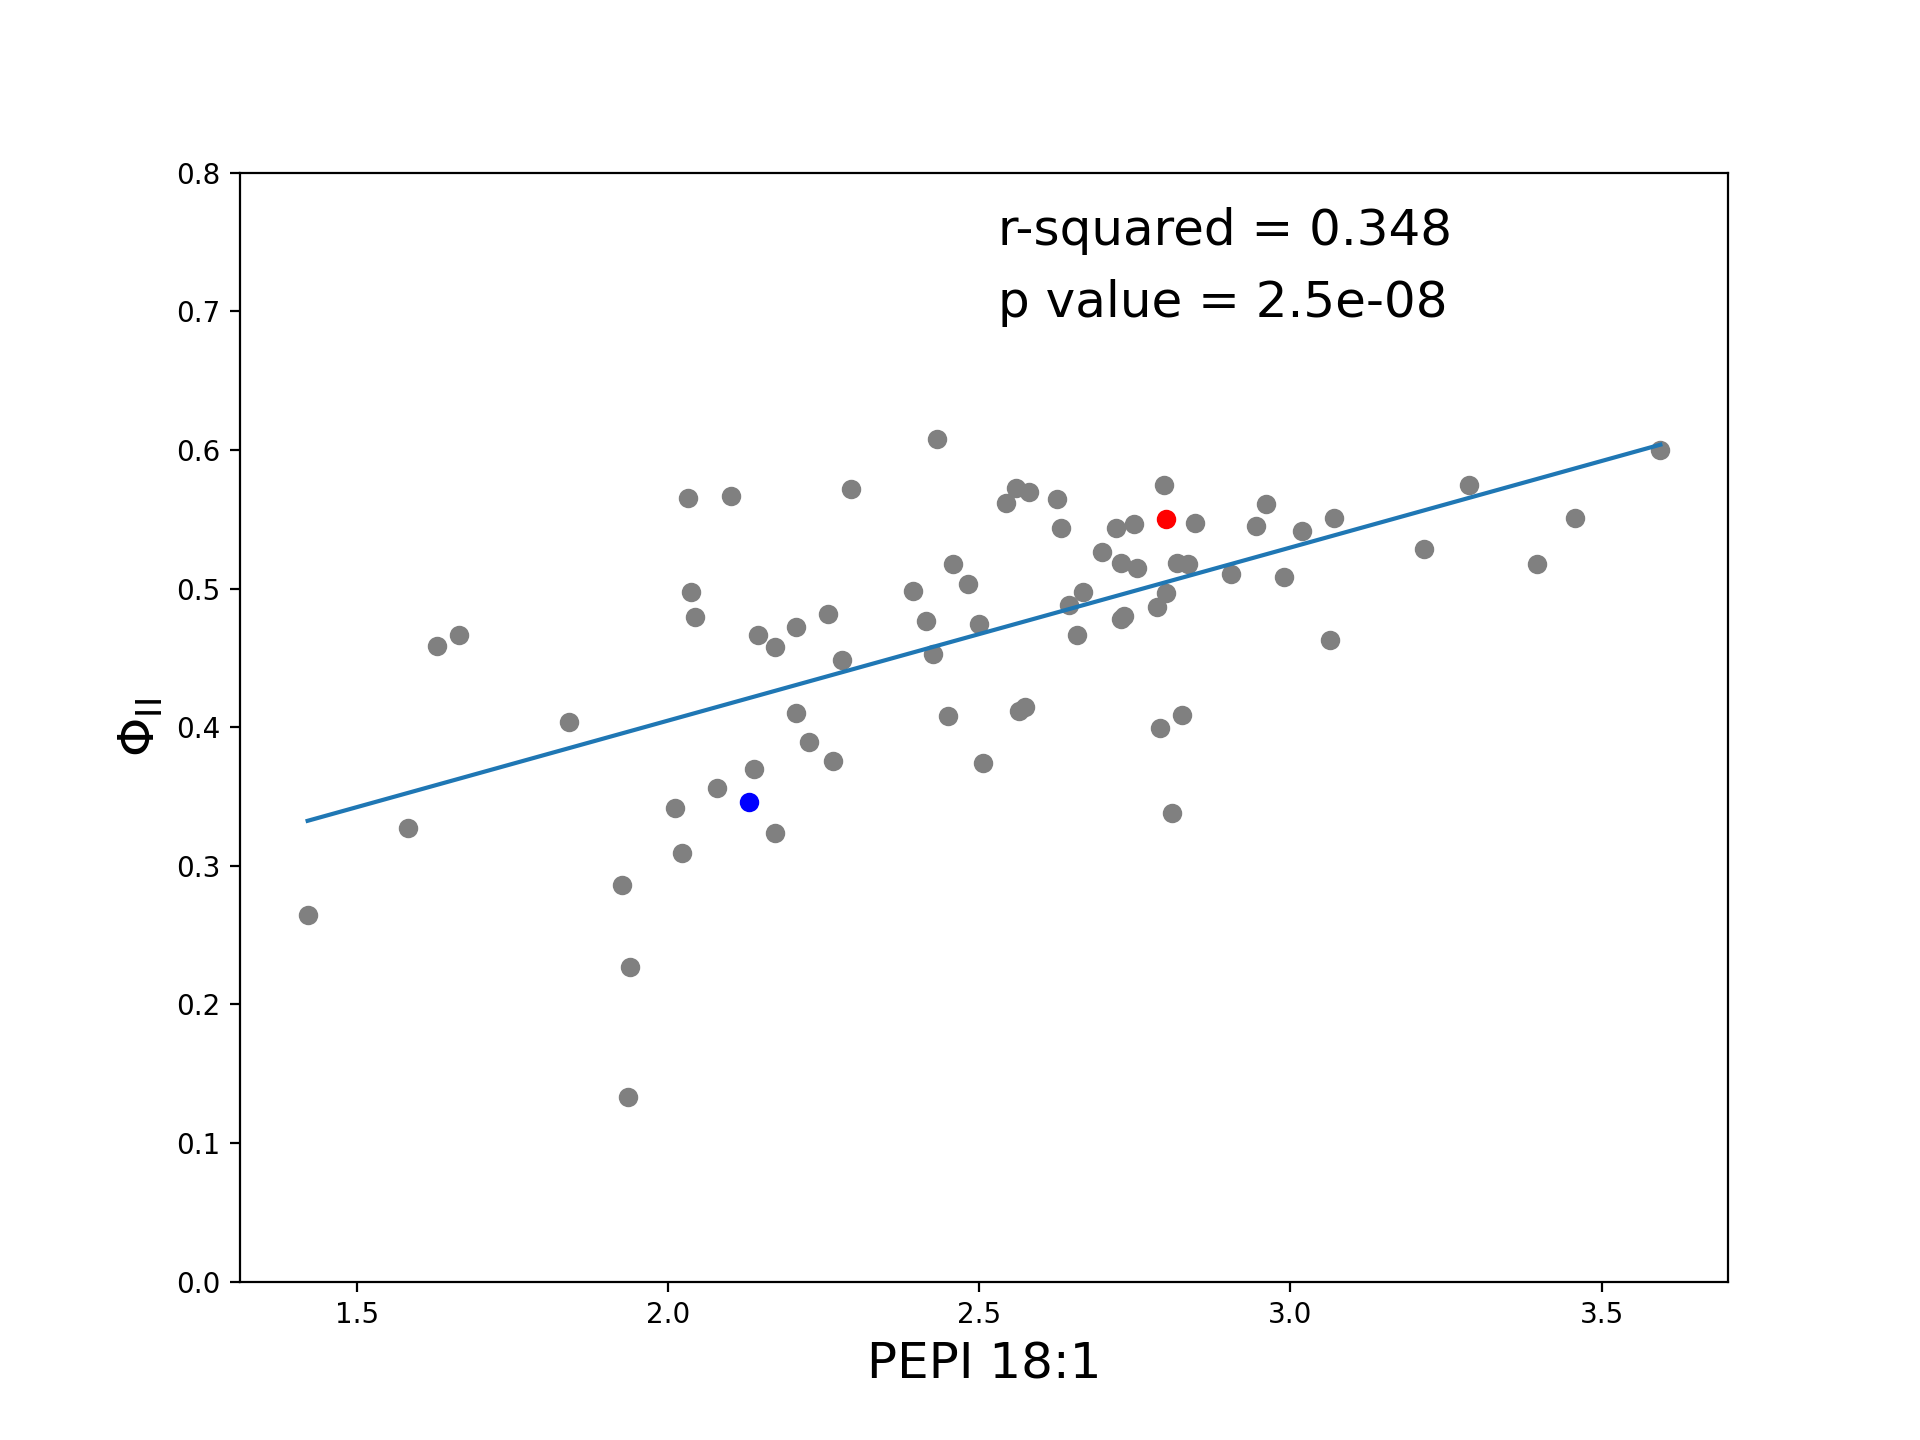

In [32]:
x_column = 'PEPI_18_1'
y_column = 'LT_DEPI_phi2_81'



genotype_colors = {
    "CB27": "red",
    "24-125B-1": "blue"
}

default_color = "grey"

# find which points have data
good_points = np.isfinite(df[x_column]) & np.isfinite(df[y_column])
x = df.loc[good_points,x_column]
y = df.loc[good_points,y_column]

# fit those points
slope, intercept, r_value, p_value, _ = linregress(x,y)



# show the plot
fig = plt.figure()

for row in df.index:
    geno,x,y = df.loc[row,["Genotype",x_column,y_column]]
    
    if geno in genotype_colors.keys():
        color = genotype_colors[geno]
    else:
        color = default_color
        
    plt.scatter( x, y, c=color )

line_x = np.array([df[x_column].min(), df[x_column].max()])
plt.plot( line_x, slope * line_x + intercept )
plt.xlabel("PEPI 18:1",size=18)
plt.ylabel("$\mathregular{Φ_{II}}$",size=18)
plt.text( .52,.83,"r-squared = {0:.3f}".format( r_value ** 2 ), transform=fig.transFigure,size=18 )
plt.text( .52,.78, "p value = {0:.1e}".format( p_value ), transform=fig.transFigure,size=18 )
plt.ylim(0,0.8)
#.13,.83
#.13,.78
plt.savefig('phi2_81_PEPI_18_1',dpi =600)
plt.show()



<IPython.core.display.Javascript object>


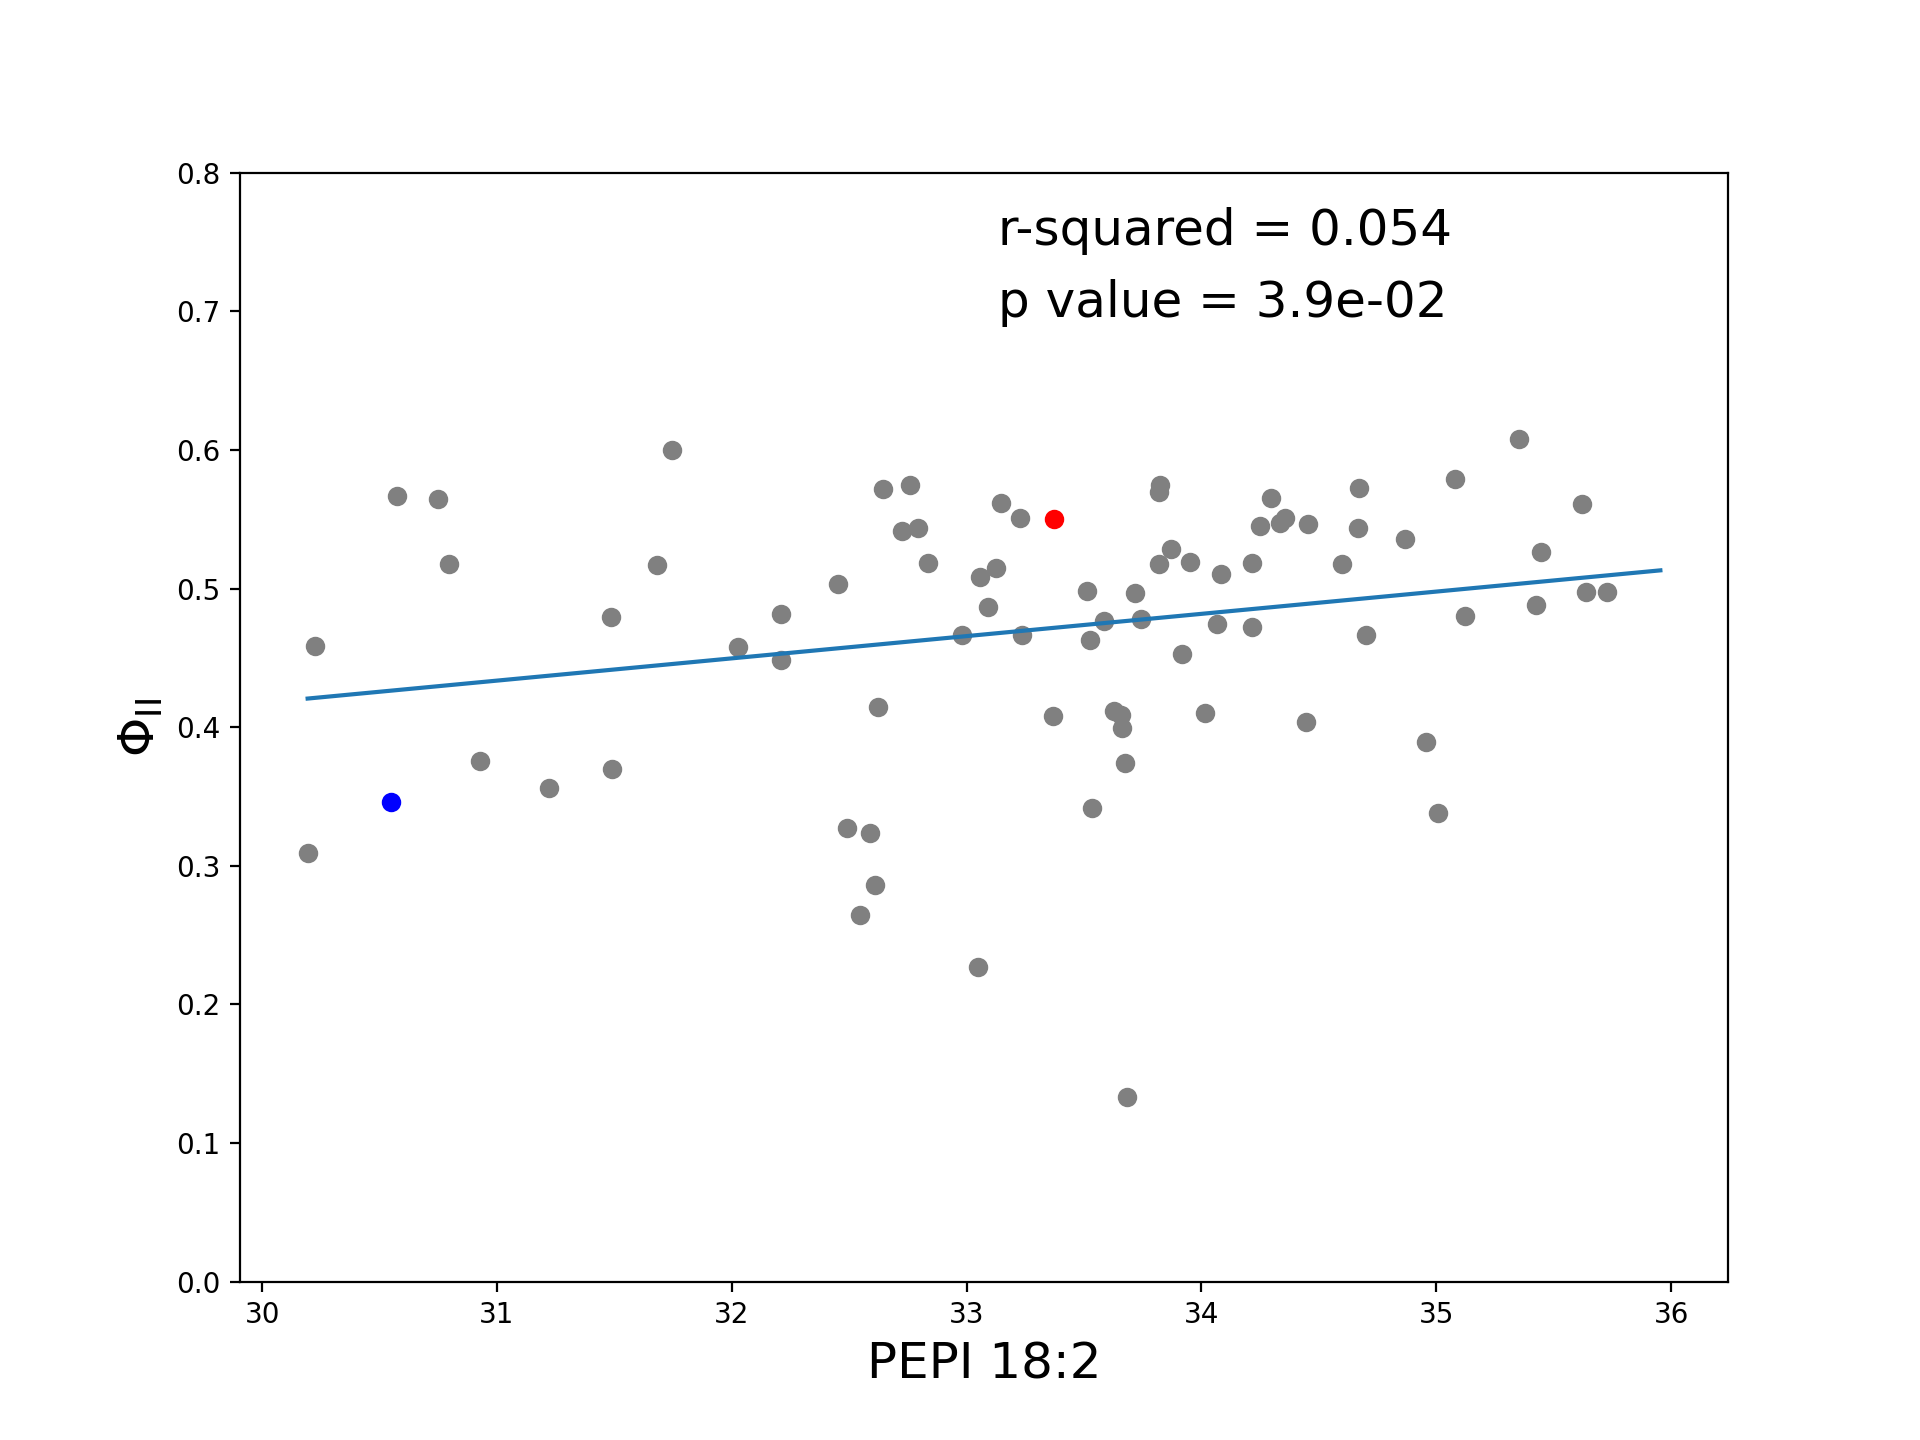

In [33]:
x_column = 'PEPI_18_2'
y_column = 'LT_DEPI_phi2_81'



genotype_colors = {
    "CB27": "red",
    "24-125B-1": "blue"
}

default_color = "grey"

# find which points have data
good_points = np.isfinite(df[x_column]) & np.isfinite(df[y_column])
x = df.loc[good_points,x_column]
y = df.loc[good_points,y_column]

# fit those points
slope, intercept, r_value, p_value, _ = linregress(x,y)



# show the plot
fig = plt.figure()

for row in df.index:
    geno,x,y = df.loc[row,["Genotype",x_column,y_column]]
    
    if geno in genotype_colors.keys():
        color = genotype_colors[geno]
    else:
        color = default_color
        
    plt.scatter( x, y, c=color )

line_x = np.array([df[x_column].min(), df[x_column].max()])
plt.plot( line_x, slope * line_x + intercept )
plt.xlabel("PEPI 18:2",size=18)
plt.ylabel("$\mathregular{Φ_{II}}$",size=18)
plt.text( .52,.83,"r-squared = {0:.3f}".format( r_value ** 2 ), transform=fig.transFigure,size=18 )
plt.text( .52,.78, "p value = {0:.1e}".format( p_value ), transform=fig.transFigure,size=18 )
plt.ylim(0,0.8)
#.13,.83
#.13,.78
plt.savefig('phi2_81_PEPI_18_2',dpi =600)
plt.show()



<IPython.core.display.Javascript object>


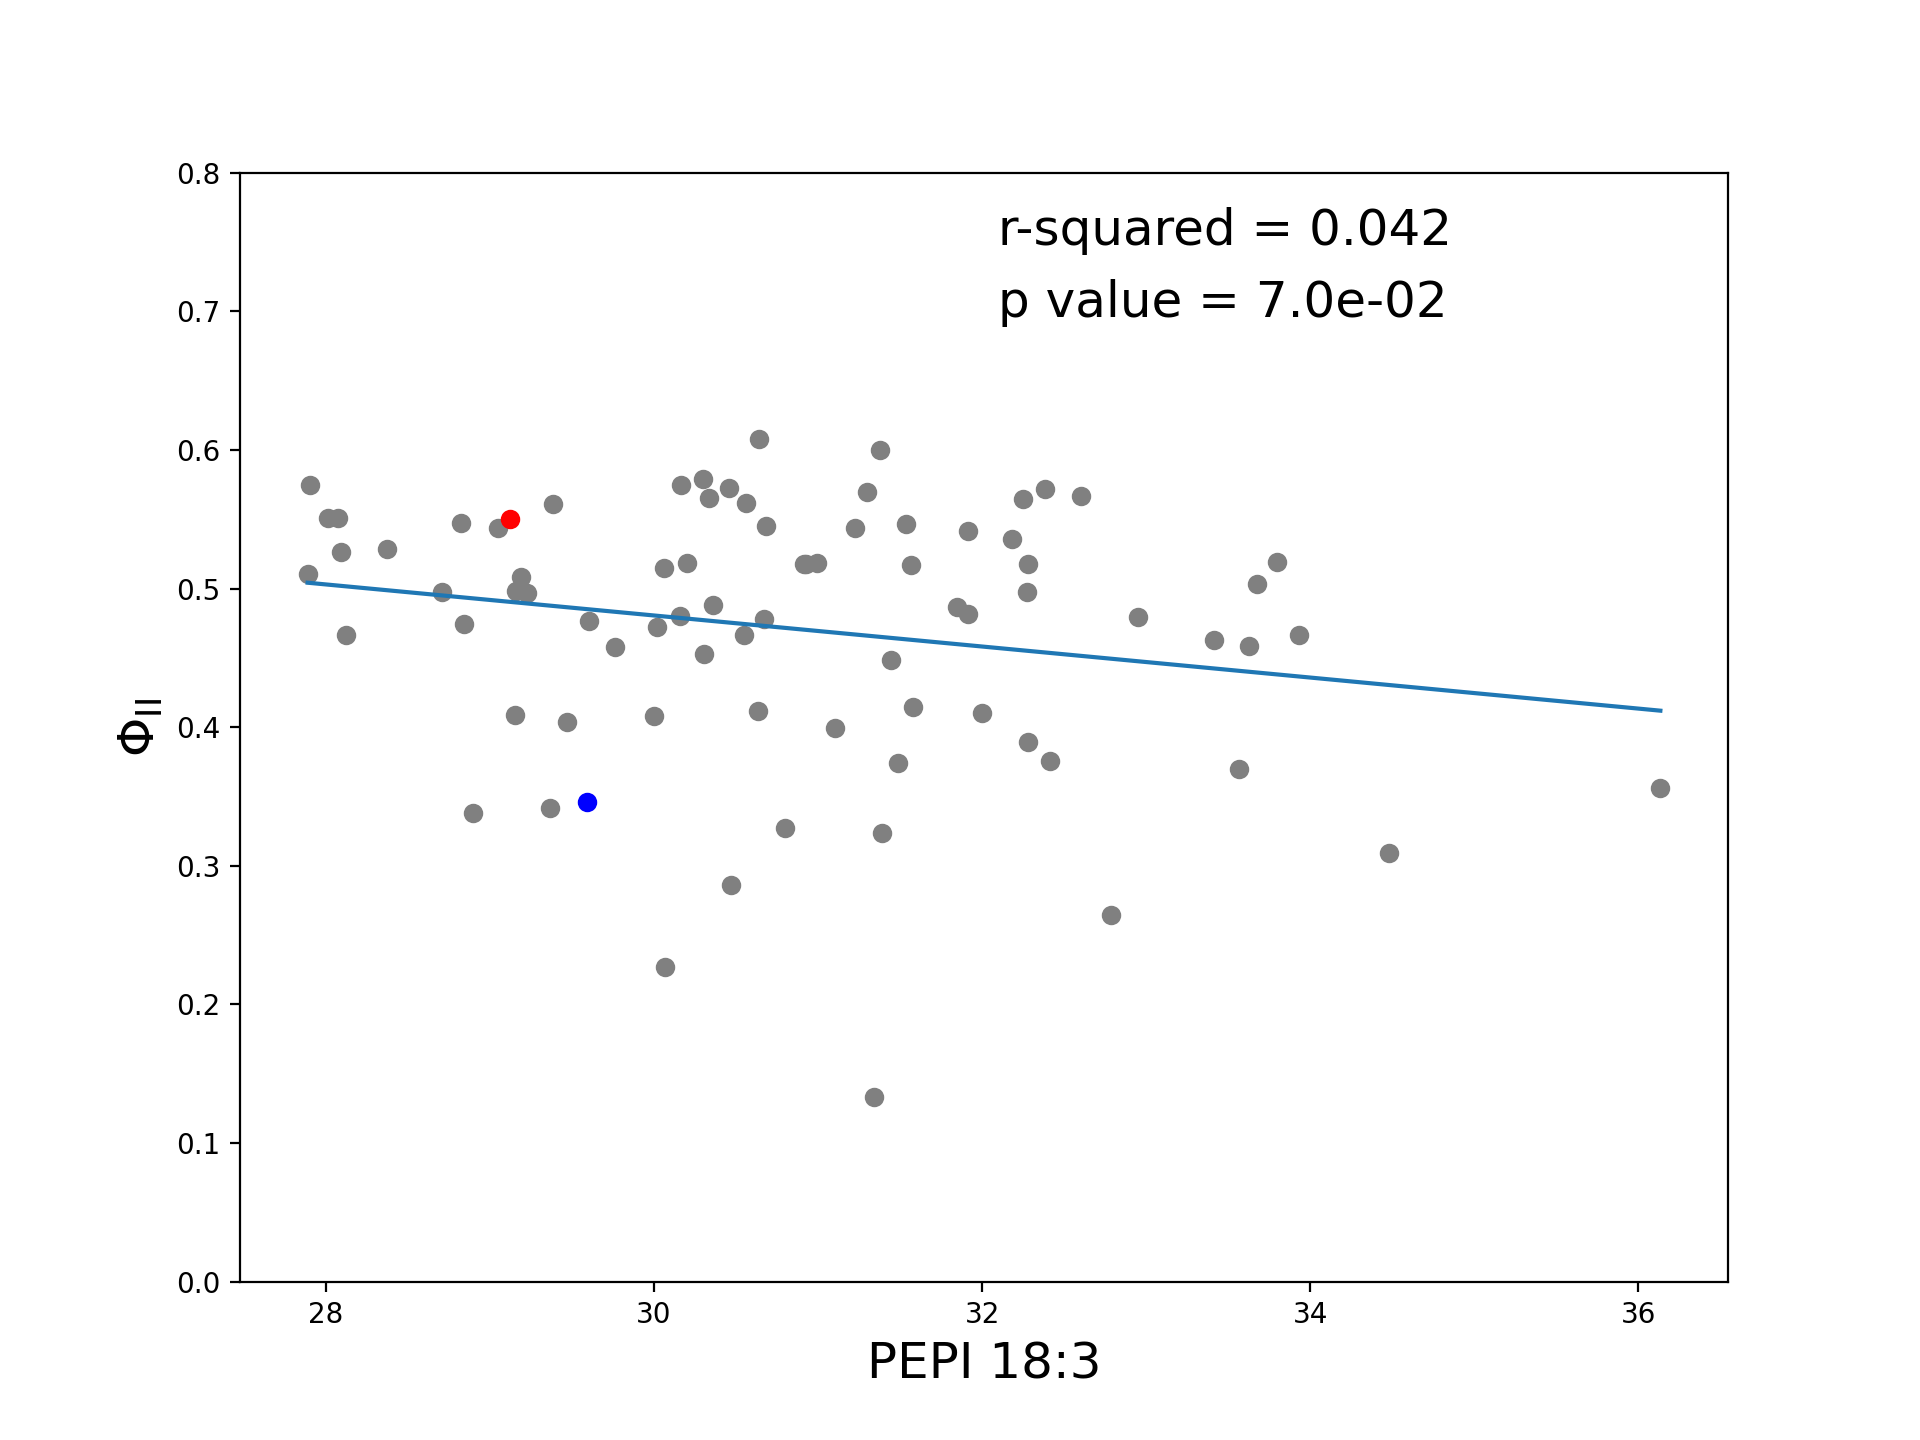

In [35]:
x_column = 'PEPI_18_3'
y_column = 'LT_DEPI_phi2_81'



genotype_colors = {
    "CB27": "red",
    "24-125B-1": "blue"
}

default_color = "grey"

# find which points have data
good_points = np.isfinite(df[x_column]) & np.isfinite(df[y_column])
x = df.loc[good_points,x_column]
y = df.loc[good_points,y_column]

# fit those points
slope, intercept, r_value, p_value, _ = linregress(x,y)



# show the plot
fig = plt.figure()

for row in df.index:
    geno,x,y = df.loc[row,["Genotype",x_column,y_column]]
    
    if geno in genotype_colors.keys():
        color = genotype_colors[geno]
    else:
        color = default_color
        
    plt.scatter( x, y, c=color )

line_x = np.array([df[x_column].min(), df[x_column].max()])
plt.plot( line_x, slope * line_x + intercept )
plt.xlabel("PEPI 18:3",size=18)
plt.ylabel("$\mathregular{Φ_{II}}$",size=18)
plt.text( .52,.83,"r-squared = {0:.3f}".format( r_value ** 2 ), transform=fig.transFigure,size=18 )
plt.text( .52,.78, "p value = {0:.1e}".format( p_value ), transform=fig.transFigure,size=18 )
plt.ylim(0,0.8)
#.13,.83
#.13,.78
plt.savefig('phi2_81_PEPI_18_3',dpi =600)
plt.show()

